In [4]:
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
from datetime import datetime 
import datetime
import collections
from collections import Counter
from collections import OrderedDict
import glob
import time
import os
from joblib import Parallel, delayed
from multiprocessing import Pool
import seaborn as sns
%matplotlib inline

In [7]:
import sklearn.datasets

# 数値計算に使うライブラリ
import scipy as sp
from scipy import stats as st

# グラフを描画するライブラリ
sns.set()

# 統計モデルを推定するライブラリ
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels.stats.anova as anova # 分散分析するライブラリ
from statsmodels.stats.multicomp import pairwise_tukeyhsd # Tukeyの多重比較するライブラリ

In [16]:
import scipy.stats as stats
from datetime import datetime as dt
from sklearn.ensemble import  RandomForestRegressor as RFR
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV
import optuna.integration.lightgbm as lgb_o
import lightgbm as lgb
# import xgboost as xgb

import optuna.integration.lightgbm as lgb

# 評価指標
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

## 全CSVファイルを結合

In [4]:
llist = []
allfiles = glob.glob('Data/*.csv')
    
for file in allfiles:
    llist.append(pd.read_csv(file,header=None))
df = pd.concat(llist, sort=False)
df = df.drop(index=0)

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [17]:
llist100 = []
allfiles100 = glob.glob('Data_100/*.csv')
    
for file in allfiles100:
    llist100.append(pd.read_csv(file,header=None))
df100 = pd.concat(llist100, sort=False)
df100 = df100.drop(index=0)
df100

/Users/daiki.m/miniforge3/envs/py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1,2,3,4,5,6
1,2021/01/01,15,38:愛媛県,休日,都営地下鉄新宿線,17:九段下駅,27
2,2021/01/01,15,38:愛媛県,休日,都営地下鉄新宿線,15:小川町駅,27
3,2021/01/01,14,38:愛媛県,休日,都営地下鉄新宿線,4:一之江駅,16
4,2021/01/01,22,35:山口県,休日,都営地下鉄新宿線,17:九段下駅,5
5,2021/01/01,12,34:広島県,休日,都営地下鉄新宿線,17:九段下駅,36
...,...,...,...,...,...,...,...
715800,2020/12/31,14,01:北海道,平日,都営地下鉄三田線,27:目黒駅,19
715801,2020/12/31,0,01:北海道,平日,都営地下鉄三田線,25:白金高輪駅,11
715802,2020/12/31,17,01:北海道,平日,都営地下鉄三田線,13:巣鴨駅,7
715803,2020/12/31,19,01:北海道,平日,都営地下鉄三田線,12:西巣鴨駅,2


In [6]:
llist300 = []
allfiles300 = glob.glob('Data_300/*.csv')
    
for file in allfiles300:
    llist300.append(pd.read_csv(file,header=None))
df300 = pd.concat(llist300, sort=False)
df300 = df300.drop(index=0)

In [7]:
llist500 = []
allfiles500 = glob.glob('Data_500/*.csv')
    
for file in allfiles500:
    llist500.append(pd.read_csv(file,header=None))
df500 = pd.concat(llist500, sort=False)
df500 = df500.drop(index=0)

## 日付・時間を整理

In [8]:
df = df.rename(columns={0:'Date', 1:'Time', 2:'From', 3:'Weekday/Holidays', 4:'Train Line', 5:'Station', 6:'Population'})
df = df.sort_values(['Date', 'Time'])

df100 = df100.rename(columns={0:'Date', 1:'Time', 2:'From', 3:'Weekday/Holidays', 4:'Train Line', 5:'Station', 6:'Population'})
df100 = df100.sort_values(['Date', 'Time'])

df300 = df300.rename(columns={0:'Date', 1:'Time', 2:'From', 3:'Weekday/Holidays', 4:'Train Line', 5:'Station', 6:'Population'})
df300 = df300.sort_values(['Date', 'Time'])

df500 = df500.rename(columns={0:'Date', 1:'Time', 2:'From', 3:'Weekday/Holidays', 4:'Train Line', 5:'Station', 6:'Population'})
df500 = df500.sort_values(['Date', 'Time'])

## 朝の時間帯（6時〜9時）だけを抽出（2020/2〜2021/6）

In [9]:
ndf = df.copy()
ndf['Date'] = pd.to_datetime(ndf['Date'])
ndf['Time'] = ndf['Time'].astype(int)
ndf['Population'] = ndf['Population'].astype(int)
ndf = ndf[(ndf['Time'] >= 6) & (ndf['Time'] <= 9)]
ndf = ndf[ndf['Date'] >= datetime.datetime(year=2020, month=2, day=1)]
display(ndf)

ndf100 = df100.copy()
ndf100['Date'] = pd.to_datetime(ndf100['Date'])
ndf100['Time'] = ndf100['Time'].astype(int)
ndf100['Population'] = ndf100['Population'].astype(int)
ndf100 = ndf100[(ndf100['Time'] >= 6) & (ndf100['Time'] <= 9)]
ndf100 = ndf100[ndf100['Date'] >= datetime.datetime(year=2020, month=2, day=1)]

ndf300 = df300.copy()
ndf300['Date'] = pd.to_datetime(ndf300['Date'])
ndf300['Time'] = ndf300['Time'].astype(int)
ndf300['Population'] = ndf300['Population'].astype(int)
ndf300 = ndf300[(ndf300['Time'] >= 6) & (ndf300['Time'] <= 9)]
ndf300 = ndf300[ndf300['Date'] >= datetime.datetime(year=2020, month=2, day=1)]

ndf500 = df500.copy()
ndf500['Date'] = pd.to_datetime(ndf500['Date'])
ndf500['Time'] = ndf500['Time'].astype(int)
ndf500['Population'] = ndf500['Population'].astype(int)
ndf500 = ndf500[(ndf500['Time'] >= 6) & (ndf500['Time'] <= 9)]
ndf500 = ndf500[ndf500['Date'] >= datetime.datetime(year=2020, month=2, day=1)]

,Date,Time,From,Weekday/Holidays,Train Line,Station,Population
182710,2020-02-01,6,47:沖縄県,休日,都営地下鉄大江戸線,37:東新宿駅,181
182754,2020-02-01,6,47:沖縄県,休日,都営地下鉄大江戸線,32:春日駅,266
182784,2020-02-01,6,47:沖縄県,休日,都営地下鉄大江戸線,27:両国駅,230
182795,2020-02-01,6,47:沖縄県,休日,都営地下鉄大江戸線,24:門前仲町駅,205
182824,2020-02-01,6,47:沖縄県,休日,都営地下鉄大江戸線,20:汐留駅,311
...,...,...,...,...,...,...,...
318914,2021-06-25,9,08:茨城県,平日,都営地下鉄三田線,23:芝公園駅,9
318928,2021-06-25,9,08:茨城県,平日,都営地下鉄三田線,22:御成門駅,259
318940,2021-06-25,9,08:茨城県,平日,都営地下鉄三田線,20:日比谷駅,136
318955,2021-06-25,9,08:茨城県,平日,都営地下鉄三田線,17:水道橋駅,286


## 駅利用者数順に並べ替え

In [10]:
nndf = ndf.drop(['From', 'Time','Weekday/Holidays', 'Train Line'], axis=1)
df1 = nndf.groupby('Date').sum()['Population']
df2 = ndf.groupby(['Date', 'Station']).sum()
df_newconcat = pd.merge(df2, df1, on='Date', how='left')
df2_index = list(df2.index)
df2_li=[]
for i in range(len(df2_index)):
    df2_li.append(df2_index[i][1])
df_newconcat['Station'] = df2_li
df_newconcat['rate'] = df_newconcat['Population_x']*100/df_newconcat['Population_y']
df_newconcat = df_newconcat.drop(['Time','Population_x', 'Population_y'], axis=1)

rate_df = df_newconcat.groupby('Station').sum()
rate_df = rate_df.sort_values('rate', ascending=False)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
rate_df

,rate
Station,
21:新宿駅,1273.211204
12:新宿駅,1166.257437
38:新宿西口駅,1149.984977
11:都庁前駅,944.948795
39:都庁前駅,944.948795
11:新橋駅,858.400952
8:日本橋駅,856.976256
19:大手町駅,813.874134
21:内幸町駅,809.337399


## 実行しなくてOK

In [11]:
# nndf = ndf.drop(['From', 'Time','Weekday/Holidays', 'Train Line'], axis=1)
# df1 = nndf.groupby('Date').sum()['Population']
# df2 = ndf.groupby(['Date', 'Station']).sum()
# df_newconcat = pd.merge(df2, df1, on='Date', how='left')

# nndf100 = ndf100.drop(['From', 'Time','Weekday/Holidays', 'Train Line'], axis=1)
# df1100 = nndf100.groupby('Date').sum()['Population']
# df2100 = ndf100.groupby(['Date', 'Station']).sum()
# df_newconcat100 = pd.merge(df2100, df1100, on='Date', how='left')

# nndf300 = ndf300.drop(['From', 'Time','Weekday/Holidays', 'Train Line'], axis=1)
# df1300 = nndf300.groupby('Date').sum()['Population']
# df2300 = ndf300.groupby(['Date', 'Station']).sum()
# df_newconcat300 = pd.merge(df2300, df1300, on='Date', how='left')

# nndf500 = ndf500.drop(['From', 'Time','Weekday/Holidays', 'Train Line'], axis=1)
# df1500 = nndf500.groupby('Date').sum()['Population']
# df2500 = ndf500.groupby(['Date', 'Station']).sum()
# df_newconcat500 = pd.merge(df2500, df1500, on='Date', how='left')

## 不要な列を消去し、日付・人口のDF作成

In [12]:
## 不要な列削除
ini_df = ndf.drop(['From', 'Time','Weekday/Holidays', 'Train Line', 'Station'], axis=1)
ini_df = ini_df.groupby('Date').sum()
ini_df = ini_df.sort_values('Date', ascending=False)
display(ini_df)

ini_df100 = ndf100.drop(['From', 'Time','Weekday/Holidays', 'Train Line', 'Station'], axis=1)
ini_df100 = ini_df100.groupby('Date').sum()
ini_df100 = ini_df100.sort_values('Date', ascending=False)

ini_df300 = ndf300.drop(['From', 'Time','Weekday/Holidays', 'Train Line', 'Station'], axis=1)
ini_df300 = ini_df300.groupby('Date').sum()
ini_df300 = ini_df300.sort_values('Date', ascending=False)

ini_df500 = ndf500.drop(['From', 'Time','Weekday/Holidays', 'Train Line', 'Station'], axis=1)
ini_df500 = ini_df500.groupby('Date').sum()
ini_df500 = ini_df500.sort_values('Date', ascending=False)

,Population
Date,
2021-06-25,20422985
2021-06-24,20729214
2021-06-23,20568891
2021-06-22,20762609
2021-06-21,20785624
2021-06-20,11098901
2021-06-19,12183779
2021-06-18,19935909
2021-06-17,20172626


## 教師データに合わせて成形

In [13]:
ini_df = ini_df.reset_index()
#np.set_printoptions(threshold=np.inf)
#pd.set_option('display.max_rows', 500)
s = 5
t = 6
for i in range(len(ini_df)):
    if i == s:
        ini_df = ini_df.drop(s)
        ini_df = ini_df.drop(t)
        s = s+7
        t = t+7
        
print(ini_df)

          Date  Population
0   2021-06-25    20422985
1   2021-06-24    20729214
2   2021-06-23    20568891
3   2021-06-22    20762609
4   2021-06-21    20785624
7   2021-06-18    19935909
8   2021-06-17    20172626
9   2021-06-16    19931129
10  2021-06-15    20476201
11  2021-06-14    20420796
14  2021-06-11    19641826
15  2021-06-10    20293362
16  2021-06-09    19961330
17  2021-06-08    20259211
18  2021-06-07    20305144
21  2021-06-04    19827090
22  2021-06-03    20087871
23  2021-06-02    20086455
24  2021-06-01    20323652
25  2021-05-31    20387551
28  2021-05-28    19516679
29  2021-05-27    19837900
30  2021-05-26    19605650
31  2021-05-25    20243293
32  2021-05-24    20462777
35  2021-05-21    19879774
36  2021-05-20    19990105
37  2021-05-19    19897967
38  2021-05-18    19940938
39  2021-05-17    20440188
42  2021-05-14    19958022
43  2021-05-13    20010649
44  2021-05-12    20409868
45  2021-05-11    20346647
46  2021-05-10    20793772
49  2021-05-07    18997253
5

In [14]:
ini_df100 = ini_df100.reset_index()
#np.set_printoptions(threshold=np.inf)
#pd.set_option('display.max_rows', 500)
s = 5
t = 6
for i in range(len(ini_df100)):
    if i == s:
        ini_df100 = ini_df100.drop(s)
        ini_df100 = ini_df100.drop(t)
        s = s+7
        t = t+7
        
print(ini_df100)

          Date  Population
0   2021-06-25     1029635
1   2021-06-24     1030460
2   2021-06-23     1058302
3   2021-06-22     1053330
4   2021-06-21     1065663
7   2021-06-18     1017925
8   2021-06-17     1025675
9   2021-06-16      996029
10  2021-06-15     1007822
11  2021-06-14     1021363
14  2021-06-11      994284
15  2021-06-10     1016220
16  2021-06-09      993624
17  2021-06-08     1008632
18  2021-06-07     1010622
21  2021-06-04      979697
22  2021-06-03      974491
23  2021-06-02     1001883
24  2021-06-01      999278
25  2021-05-31      991570
28  2021-05-28      949215
29  2021-05-27     1009880
30  2021-05-26      949679
31  2021-05-25      992439
32  2021-05-24     1011778
35  2021-05-21      991751
36  2021-05-20      997492
37  2021-05-19      957061
38  2021-05-18      982191
39  2021-05-17     1005990
42  2021-05-14      966691
43  2021-05-13      979387
44  2021-05-12     1020982
45  2021-05-11     1022227
46  2021-05-10     1018611
49  2021-05-07      966189
5

In [15]:
ini_df300 = ini_df300.reset_index()
#np.set_printoptions(threshold=np.inf)
#pd.set_option('display.max_rows', 500)
s = 5
t = 6
for i in range(len(ini_df300)):
    if i == s:
        ini_df300 = ini_df300.drop(s)
        ini_df300 = ini_df300.drop(t)
        s = s+7
        t = t+7
        
print(ini_df300)

          Date  Population
0   2021-06-25     5738993
1   2021-06-24     5857707
2   2021-06-23     5799057
3   2021-06-22     5791291
4   2021-06-21     5826974
7   2021-06-18     5517916
8   2021-06-17     5696532
9   2021-06-16     5586374
10  2021-06-15     5773798
11  2021-06-14     5731216
14  2021-06-11     5504448
15  2021-06-10     5735926
16  2021-06-09     5616120
17  2021-06-08     5672696
18  2021-06-07     5721424
21  2021-06-04     5583303
22  2021-06-03     5661865
23  2021-06-02     5621637
24  2021-06-01     5704092
25  2021-05-31     5759067
28  2021-05-28     5479292
29  2021-05-27     5594069
30  2021-05-26     5519970
31  2021-05-25     5725346
32  2021-05-24     5709738
35  2021-05-21     5578932
36  2021-05-20     5602719
37  2021-05-19     5553179
38  2021-05-18     5586360
39  2021-05-17     5741779
42  2021-05-14     5599942
43  2021-05-13     5598283
44  2021-05-12     5747103
45  2021-05-11     5738777
46  2021-05-10     5846648
49  2021-05-07     5322472
5

In [16]:
ini_df500 = ini_df500.reset_index()
#np.set_printoptions(threshold=np.inf)
#pd.set_option('display.max_rows', 500)
s = 5
t = 6
for i in range(len(ini_df500)):
    if i == s:
        ini_df500 = ini_df500.drop(s)
        ini_df500 = ini_df500.drop(t)
        s = s+7
        t = t+7
        
print(ini_df500)

          Date  Population
0   2021-06-25    13654357
1   2021-06-24    13841047
2   2021-06-23    13711532
3   2021-06-22    13917988
4   2021-06-21    13892987
7   2021-06-18    13400068
8   2021-06-17    13450419
9   2021-06-16    13348726
10  2021-06-15    13694581
11  2021-06-14    13668217
14  2021-06-11    13143094
15  2021-06-10    13541216
16  2021-06-09    13351586
17  2021-06-08    13577883
18  2021-06-07    13573098
21  2021-06-04    13264090
22  2021-06-03    13451515
23  2021-06-02    13462935
24  2021-06-01    13620282
25  2021-05-31    13636914
28  2021-05-28    13088172
29  2021-05-27    13233951
30  2021-05-26    13136001
31  2021-05-25    13525508
32  2021-05-24    13741261
35  2021-05-21    13309091
36  2021-05-20    13389894
37  2021-05-19    13387727
38  2021-05-18    13372387
39  2021-05-17    13692419
42  2021-05-14    13391389
43  2021-05-13    13432979
44  2021-05-12    13641783
45  2021-05-11    13585643
46  2021-05-10    13928513
49  2021-05-07    12708592
5

## 5日おきにデータをとる

In [17]:
# ini_df['Date'] = pd.to_datetime(ini_df['Date'])
# df.groupby('Population').count()
ini_df = ini_df.reset_index()
pre_num=0
app_list=[]
j=4
for i in range(len(ini_df['Population'])):
    if i <= j:
        pre_num = pre_num + ini_df['Population'][i]
    else:
        j = j + 5
        app_list.append(pre_num)
        pre_num = ini_df['Population'][i]
print(app_list)

[103269323, 100936661, 100460873, 100712619, 99666299, 100148972, 101518958, 68250476, 88346375, 104606322, 105220648, 105229810, 105943569, 102359869, 99563436, 99614504, 99169475, 90147280, 97044186, 88622929, 95768290, 94760738, 94644698, 87519625, 97182402, 59442869, 105080964, 106241340, 106750118, 107271868, 97630331, 107363679, 108810609, 99017274, 108118458, 107048947, 106834501, 107467319, 107280471, 84407146, 104291949, 104459748, 103851708, 101811891, 100331708, 74835617, 100248487, 102431241, 83687988, 103254386, 104888848, 105574963, 101866733, 100018158, 97776699, 97718777, 85516865, 80681984, 79542978, 60959696, 69129475, 76687760, 79983328, 94726897, 109208550, 118677506, 109156395, 119724079, 121137837, 113870799, 130814878, 117497017]


In [18]:
# ini_df['Date'] = pd.to_datetime(ini_df['Date'])
# df.groupby('Population').count()
ini_df100 = ini_df100.reset_index()
pre_num=0
app_list100=[]
j=4
for i in range(len(ini_df100['Population'])):
    if i <= j:
        pre_num = pre_num + ini_df100['Population'][i]
    else:
        j = j + 5
        app_list100.append(pre_num)
        pre_num = ini_df100['Population'][i]
print(app_list100)

[5237390, 5068814, 5023382, 4946919, 4912991, 4934485, 5007898, 3187674, 4309843, 5215450, 5144696, 5270484, 5320544, 5097072, 4907023, 4881185, 4799255, 4361633, 4698994, 4161174, 4624300, 4496930, 4520671, 4145682, 4640885, 2656975, 5377219, 5416869, 5407854, 5421524, 4870668, 5355219, 5555805, 4963213, 5519245, 5384053, 5350953, 5409968, 5337907, 4085035, 5208061, 5135478, 4984824, 4822979, 4736621, 3472008, 4823781, 4959146, 3955562, 5001464, 5137398, 5148260, 4932339, 4790450, 4692462, 4628413, 3900448, 3647197, 3542618, 2513418, 2955746, 3393465, 3584131, 4353778, 5223888, 5854829, 5274716, 5783773, 5918654, 5511511, 6535557, 5755514]


In [19]:
# ini_df['Date'] = pd.to_datetime(ini_df['Date'])
# df.groupby('Population').count()
ini_df300 = ini_df300.reset_index()
pre_num=0
app_list300=[]
j=4
for i in range(len(ini_df300['Population'])):
    if i <= j:
        pre_num = pre_num + ini_df300['Population'][i]
    else:
        j = j + 5
        app_list300.append(pre_num)
        pre_num = ini_df300['Population'][i]
print(app_list300)

[29014022, 28305836, 28250614, 28329964, 28028415, 28062969, 28530753, 18977927, 24705847, 29315576, 29466897, 29569261, 29842855, 28669279, 27899892, 27952334, 27738658, 25218003, 27208431, 24708440, 26875443, 26557406, 26594913, 24573357, 27304820, 16543420, 29775871, 30064425, 30143917, 30328130, 27630762, 30381039, 30882867, 28008588, 30526879, 30300807, 30327106, 30389941, 30381650, 23794187, 29556126, 29591492, 29342730, 28708659, 28340348, 21117240, 28297261, 28960367, 23507566, 29178636, 29653832, 29689952, 28745347, 28180566, 27597871, 27490074, 23944013, 22543543, 22144805, 16699033, 19114279, 21284302, 22213921, 26567888, 30912499, 33914411, 31019034, 34088793, 34614511, 32592909, 37688235, 33712591]


In [20]:
# ini_df['Date'] = pd.to_datetime(ini_df['Date'])
# df.groupby('Population').count()
ini_df500 = ini_df500.reset_index()
pre_num=0
app_list500=[]
j=4
for i in range(len(ini_df500['Population'])):
    if i <= j:
        pre_num = pre_num + ini_df500['Population'][i]
    else:
        j = j + 5
        app_list500.append(pre_num)
        pre_num = ini_df500['Population'][i]
print(app_list500)

[69017911, 67562011, 67186877, 67435736, 66724893, 67151518, 67980307, 46084875, 59330685, 70075296, 70609055, 70390065, 70780170, 68593518, 66756521, 66780985, 66631562, 60567644, 65136761, 59753315, 64268547, 63706402, 63529114, 58800586, 65236697, 40242474, 69927874, 70760046, 71198347, 71522214, 65128901, 71627421, 72371937, 66045473, 72072334, 71364087, 71156442, 71667410, 71560914, 56527924, 69527762, 69732778, 69524154, 68280253, 67254739, 50246369, 67127445, 68511728, 56224860, 69074286, 70097618, 70736751, 68189047, 67047142, 65486366, 65600290, 57672404, 54491244, 53855555, 41747245, 47059450, 52009993, 54185276, 63805231, 73072163, 78908266, 72862645, 79851513, 80604672, 75766379, 86591086, 78028912]


## 教師データの各行に対する合計値を算出

In [21]:
# teach_df = pd.read_csv('/Users/One Direction Shin/OneDrive - 中央大学/インターン/Data/都営地下鉄利用者数推移v2.csv',header=None)
teach_df = pd.read_csv('teach.csv', header=None)
teach_df = teach_df.drop(index=0)
teach_df = teach_df.drop(index=1)
teach_df = teach_df.rename(columns={0:'Year', 1:'Date', 2:'Number of Person(1)', 3:'Number of Person(2)', 4:'Number of Person(3)'})
teach_df['Number of Person(1)'] = teach_df['Number of Person(1)'].astype(int)
teach_df['Number of Person(2)'] = teach_df['Number of Person(2)'].astype(int)
teach_df['Number of Person(3)'] = teach_df['Number of Person(3)'].astype(int)
teach_df = pd.concat([teach_df,pd.DataFrame(teach_df.sum(axis=1),columns=['Total'])],axis=1)
teach_df

/var/folders/g3/mlwq72x91z37blvqkhp09ksw0000gr/T/ipykernel_51486/1265792055.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  teach_df = pd.concat([teach_df,pd.DataFrame(teach_df.sum(axis=1),columns=['Total'])],axis=1)


,Year,Date,Number of Person(1),Number of Person(2),Number of Person(3),Total
2,2021,6月21日~6月25日,219053,369857,406336,995246
3,2021,6月14日~6月18日,214606,359320,394999,968925
4,2021,6月7日~6月11日,213213,355557,383042,951812
5,2021,5月31日~6月4日,213971,358621,384777,957369
6,2021,5月24日~5月28日,212407,353622,379883,945912
7,2021,5月17日~5月21日,210673,352278,376042,938993
8,2021,5月10日~5月14日,212090,354482,367678,934250
9,2021,5月6日~5月7日,203685,338086,345872,887643
10,2021,4月26日~4月30日,205200,342601,366130,913931
11,2021,4月19日~4月23日,220152,380662,413956,1014770


In [22]:
# teach_df100 = pd.read_csv('/Users/One Direction Shin/OneDrive - 中央大学/インターン/Data/都営地下鉄利用者数推移v2.csv',header=None)
teach_df100 = pd.read_csv('teach.csv', header=None)
teach_df100 = teach_df100.drop(index=0)
teach_df100 = teach_df100.drop(index=1)
teach_df100 = teach_df100.rename(columns={0:'Year', 1:'Date', 2:'Number of Person(1)', 3:'Number of Person(2)', 4:'Number of Person(3)'})
teach_df100['Number of Person(1)'] = teach_df100['Number of Person(1)'].astype(int)
teach_df100['Number of Person(2)'] = teach_df100['Number of Person(2)'].astype(int)
teach_df100['Number of Person(3)'] = teach_df100['Number of Person(3)'].astype(int)
teach_df100 = pd.concat([teach_df100,pd.DataFrame(teach_df100.sum(axis=1),columns=['Total'])],axis=1)
teach_df100

/var/folders/g3/mlwq72x91z37blvqkhp09ksw0000gr/T/ipykernel_51486/2737946865.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  teach_df100 = pd.concat([teach_df100,pd.DataFrame(teach_df100.sum(axis=1),columns=['Total'])],axis=1)


,Year,Date,Number of Person(1),Number of Person(2),Number of Person(3),Total
2,2021,6月21日~6月25日,219053,369857,406336,995246
3,2021,6月14日~6月18日,214606,359320,394999,968925
4,2021,6月7日~6月11日,213213,355557,383042,951812
5,2021,5月31日~6月4日,213971,358621,384777,957369
6,2021,5月24日~5月28日,212407,353622,379883,945912
7,2021,5月17日~5月21日,210673,352278,376042,938993
8,2021,5月10日~5月14日,212090,354482,367678,934250
9,2021,5月6日~5月7日,203685,338086,345872,887643
10,2021,4月26日~4月30日,205200,342601,366130,913931
11,2021,4月19日~4月23日,220152,380662,413956,1014770


In [23]:
# teach_df300 = pd.read_csv('/Users/One Direction Shin/OneDrive - 中央大学/インターン/Data/都営地下鉄利用者数推移v2.csv',header=None)
teach_df300 = pd.read_csv('teach.csv', header=None)
teach_df300 = teach_df300.drop(index=0)
teach_df300 = teach_df300.drop(index=1)
teach_df300 = teach_df300.rename(columns={0:'Year', 1:'Date', 2:'Number of Person(1)', 3:'Number of Person(2)', 4:'Number of Person(3)'})
teach_df300['Number of Person(1)'] = teach_df300['Number of Person(1)'].astype(int)
teach_df300['Number of Person(2)'] = teach_df300['Number of Person(2)'].astype(int)
teach_df300['Number of Person(3)'] = teach_df300['Number of Person(3)'].astype(int)
teach_df300 = pd.concat([teach_df300,pd.DataFrame(teach_df300.sum(axis=1),columns=['Total'])],axis=1)
teach_df300

/var/folders/g3/mlwq72x91z37blvqkhp09ksw0000gr/T/ipykernel_51486/4071674177.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  teach_df300 = pd.concat([teach_df300,pd.DataFrame(teach_df300.sum(axis=1),columns=['Total'])],axis=1)


,Year,Date,Number of Person(1),Number of Person(2),Number of Person(3),Total
2,2021,6月21日~6月25日,219053,369857,406336,995246
3,2021,6月14日~6月18日,214606,359320,394999,968925
4,2021,6月7日~6月11日,213213,355557,383042,951812
5,2021,5月31日~6月4日,213971,358621,384777,957369
6,2021,5月24日~5月28日,212407,353622,379883,945912
7,2021,5月17日~5月21日,210673,352278,376042,938993
8,2021,5月10日~5月14日,212090,354482,367678,934250
9,2021,5月6日~5月7日,203685,338086,345872,887643
10,2021,4月26日~4月30日,205200,342601,366130,913931
11,2021,4月19日~4月23日,220152,380662,413956,1014770


In [24]:
# teach_df500 = pd.read_csv('/Users/One Direction Shin/OneDrive - 中央大学/インターン/Data/都営地下鉄利用者数推移v2.csv',header=None)
teach_df500 = pd.read_csv('teach.csv', header=None)
teach_df500 = teach_df500.drop(index=0)
teach_df500 = teach_df500.drop(index=1)
teach_df500 = teach_df500.rename(columns={0:'Year', 1:'Date', 2:'Number of Person(1)', 3:'Number of Person(2)', 4:'Number of Person(3)'})
teach_df500['Number of Person(1)'] = teach_df500['Number of Person(1)'].astype(int)
teach_df500['Number of Person(2)'] = teach_df500['Number of Person(2)'].astype(int)
teach_df500['Number of Person(3)'] = teach_df500['Number of Person(3)'].astype(int)
teach_df500 = pd.concat([teach_df500,pd.DataFrame(teach_df500.sum(axis=1),columns=['Total'])],axis=1)
teach_df500

/var/folders/g3/mlwq72x91z37blvqkhp09ksw0000gr/T/ipykernel_51486/3835294208.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  teach_df500 = pd.concat([teach_df500,pd.DataFrame(teach_df500.sum(axis=1),columns=['Total'])],axis=1)


,Year,Date,Number of Person(1),Number of Person(2),Number of Person(3),Total
2,2021,6月21日~6月25日,219053,369857,406336,995246
3,2021,6月14日~6月18日,214606,359320,394999,968925
4,2021,6月7日~6月11日,213213,355557,383042,951812
5,2021,5月31日~6月4日,213971,358621,384777,957369
6,2021,5月24日~5月28日,212407,353622,379883,945912
7,2021,5月17日~5月21日,210673,352278,376042,938993
8,2021,5月10日~5月14日,212090,354482,367678,934250
9,2021,5月6日~5月7日,203685,338086,345872,887643
10,2021,4月26日~4月30日,205200,342601,366130,913931
11,2021,4月19日~4月23日,220152,380662,413956,1014770


## 前処理データと教師データを結合

In [25]:
teach_df = teach_df.drop(['Number of Person(1)', 'Number of Person(2)', 'Number of Person(3)'], axis=1)
teach_df = teach_df.reset_index()
teach_df = teach_df[:-1]
teach_df = pd.concat([teach_df,pd.DataFrame(app_list,columns=['Train_Total'])],axis=1)
display(teach_df)

teach_df100 = teach_df100.drop(['Number of Person(1)', 'Number of Person(2)', 'Number of Person(3)'], axis=1)
teach_df100 = teach_df100.reset_index()
teach_df100 = teach_df100[:-1]
teach_df100 = pd.concat([teach_df100,pd.DataFrame(app_list100,columns=['Train_Total'])],axis=1)

teach_df300 = teach_df300.drop(['Number of Person(1)', 'Number of Person(2)', 'Number of Person(3)'], axis=1)
teach_df300 = teach_df300.reset_index()
teach_df300 = teach_df300[:-1]
teach_df300 = pd.concat([teach_df300,pd.DataFrame(app_list300,columns=['Train_Total'])],axis=1)

teach_df500 = teach_df500.drop(['Number of Person(1)', 'Number of Person(2)', 'Number of Person(3)'], axis=1)
teach_df500 = teach_df500.reset_index()
teach_df500 = teach_df500[:-1]
teach_df500 = pd.concat([teach_df500,pd.DataFrame(app_list500,columns=['Train_Total'])],axis=1)

,index,Year,Date,Total,Train_Total
0,2,2021,6月21日~6月25日,995246,103269323
1,3,2021,6月14日~6月18日,968925,100936661
2,4,2021,6月7日~6月11日,951812,100460873
3,5,2021,5月31日~6月4日,957369,100712619
4,6,2021,5月24日~5月28日,945912,99666299
5,7,2021,5月17日~5月21日,938993,100148972
6,8,2021,5月10日~5月14日,934250,101518958
7,9,2021,5月6日~5月7日,887643,68250476
8,10,2021,4月26日~4月30日,913931,88346375
9,11,2021,4月19日~4月23日,1014770,104606322


## 線形図をプロット

<AxesSubplot:xlabel='Train_Total', ylabel='Total'>

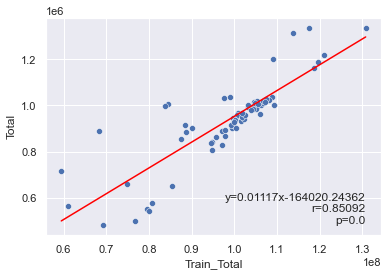

In [26]:
from seaborn_analyzer import regplot
import seaborn as sns

regplot.linear_plot(x='Train_Total', y='Total', data=teach_df)

<AxesSubplot:xlabel='Train_Total', ylabel='Total'>

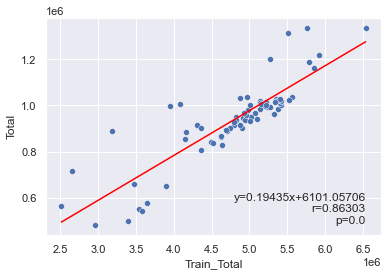

In [27]:
#半径100m
regplot.linear_plot(x='Train_Total', y='Total', data=teach_df100)

<AxesSubplot:xlabel='Train_Total', ylabel='Total'>

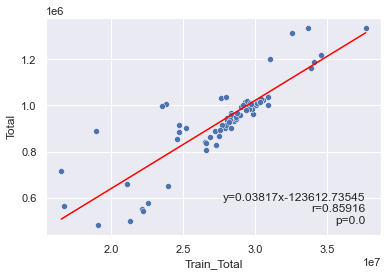

In [28]:
#半径300m
regplot.linear_plot(x='Train_Total', y='Total', data=teach_df300)

<AxesSubplot:xlabel='Train_Total', ylabel='Total'>

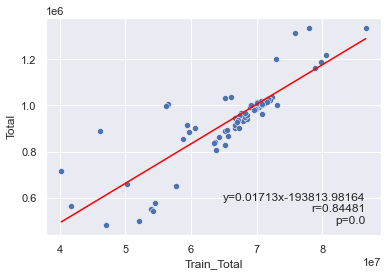

In [29]:
#半径500m
regplot.linear_plot(x='Train_Total', y='Total', data=teach_df500)

## 天気情報

In [30]:
# pd.set_option('display.max_rows', 500)
# df_wea = pd.read_csv('Data/weather.csv')
df_wea = pd.read_csv('weather.csv')
df_wea = df_wea.rename(columns={'年月日':'Date', '平均気温(℃)':'Average temperature', '最高気温(℃)':'Maximum　temperature', '最低気温(℃)':'Minimum　temperature', '降水量の合計(mm)':'Total precipitation'})
df_wea = df_wea.drop(index=df_wea.index[[511,512,513,514,515]],columns=["平均雲量(10分比)","平均雲量(10分比).1","平均雲量(10分比).2","平均気温(℃).1","平均気温(℃).2","最高気温(℃).1", "最高気温(℃).2", "最低気温(℃).1", "最低気温(℃).2", "降水量の合計(mm).1","降水量の合計(mm).2", "降水量の合計(mm).3"])

df_wea['Date'] = pd.to_datetime(df_wea['Date'])
df_wea = df_wea.sort_values('Date', ascending=False)


# 天気データを教師データに合わせて成形
df_wea = df_wea.reset_index()

u = 5
v = 6
for i in range(len(df_wea)):
    if i == u:
        df_wea = df_wea.drop(u)
        df_wea = df_wea.drop(v)
        u = u+7
        v = v+7

# 5日間の平均を出す
df_wea = df_wea.reset_index()
ave_=0
max_= 0
min_=0
pre_=0
ave_1=0
max_1= 0
min_1=0
pre_1=0
ave_li=[]
max_li=[]
min_li=[]
pre_li=[]
j=4
for i in range(len(df_wea['Average temperature'])):
    if i <= j:
        ave_ = ave_ + df_wea['Average temperature'][i]
        max_ = max_ + df_wea['Maximum　temperature'][i]
        min_ = min_ + df_wea['Minimum　temperature'][i]
        pre_ = pre_ + df_wea['Total precipitation'][i]
    else:
        j = j + 5
        ave_1 = round(ave_/5, 2)
        ave_li.append(ave_1)
        ave_ = df_wea['Average temperature'][i]
        
        max_1 = round(max_/5, 2)
        max_li.append(max_1)
        max_ = df_wea['Maximum　temperature'][i]
        
        min_1 = round(min_/5, 2)
        min_li.append(min_1)
        min_ = df_wea['Minimum　temperature'][i]
        
        pre_1 = round(pre_/5, 2)
        pre_li.append(pre_1)
        pre_ = df_wea['Total precipitation'][i]

In [31]:
j=4
for i in range(len(ini_df['Population'])):
    if i <= j:
        pre_num = pre_num + ini_df['Population'][i]
    else:
        j = j + 5
        app_list.append(pre_num)
        pre_num = ini_df['Population'][i]

## 東京都コロナ感染者数

In [32]:
covid_df = pd.read_csv('covid19.csv', header=None)
covid_df = covid_df.rename(columns={0:'A', 1:'B', 2:'C', 3:'Date', 4:'Number of masculine', 5:'Total Number of masculine'})
covid_df = covid_df.drop(['A', 'B','C'], axis=1)
covid_df = covid_df.drop(index=0)
covid_df = covid_df[18:529]
covid_df = covid_df.sort_values('Date', ascending=False)
covid_df = covid_df.reset_index()
covid_df = covid_df.drop(['index'], axis=1)
covid_df['Number of masculine'] = covid_df['Number of masculine'].astype(int)
covid_df['Total Number of masculine'] = covid_df['Total Number of masculine'].astype(int)


# 陽性者データを教師データに合わせて成形
u = 5
v = 6
for i in range(len(covid_df)):
    if i == u:
        covid_df = covid_df.drop(u)
        covid_df = covid_df.drop(v)
        u = u+7
        v = v+7     
        
# 5日間の合計感染者数と５日目の累計
covid_df = covid_df.reset_index()
cov_=0
ncov_= 0
cov_1=0
ncov_1= 0
cov_li=[]
ncov_li=[]
j=4
for i in range(len(covid_df)):
    if i <= j:
        cov_ = cov_ + covid_df['Number of masculine'][i]
        
    else:
        j = j + 5
        cov_li.append(cov_)
        cov_ = covid_df['Number of masculine'][i]
        
        ncov_ = covid_df['Total Number of masculine'][i-5]
        ncov_li.append(ncov_)

## 人流データと天気情報とコロナ感染者数を結合

In [33]:
last_df = pd.concat([teach_df,pd.DataFrame(ave_li,columns=['Average temperature'])],axis=1)
last_df = pd.concat([last_df,pd.DataFrame(max_li,columns=['Maximum　temperature'])],axis=1)
last_df = pd.concat([last_df,pd.DataFrame(min_li,columns=['Minimum　temperature'])],axis=1)
last_df = pd.concat([last_df,pd.DataFrame(pre_li,columns=['Total precipitation'])],axis=1)
last_df = pd.concat([last_df,pd.DataFrame(cov_li,columns=['Number of masculine'])],axis=1)
last_df = pd.concat([last_df,pd.DataFrame(ncov_li,columns=['Total Number of masculine'])],axis=1)
last_df = last_df.drop(['index'], axis=1)

last_df100 = pd.concat([teach_df100,pd.DataFrame(ave_li,columns=['Average temperature'])],axis=1)
last_df100 = pd.concat([last_df100,pd.DataFrame(max_li,columns=['Maximum　temperature'])],axis=1)
last_df100 = pd.concat([last_df100,pd.DataFrame(min_li,columns=['Minimum　temperature'])],axis=1)
last_df100 = pd.concat([last_df100,pd.DataFrame(pre_li,columns=['Total precipitation'])],axis=1)
last_df100 = pd.concat([last_df100,pd.DataFrame(cov_li,columns=['Number of masculine'])],axis=1)
last_df100 = pd.concat([last_df100,pd.DataFrame(ncov_li,columns=['Total Number of masculine'])],axis=1)
last_df100 = last_df100.drop(['index'], axis=1)

last_df300 = pd.concat([teach_df300,pd.DataFrame(ave_li,columns=['Average temperature'])],axis=1)
last_df300 = pd.concat([last_df300,pd.DataFrame(max_li,columns=['Maximum　temperature'])],axis=1)
last_df300 = pd.concat([last_df300,pd.DataFrame(min_li,columns=['Minimum　temperature'])],axis=1)
last_df300 = pd.concat([last_df300,pd.DataFrame(pre_li,columns=['Total precipitation'])],axis=1)
last_df300 = pd.concat([last_df300,pd.DataFrame(cov_li,columns=['Number of masculine'])],axis=1)
last_df300 = pd.concat([last_df300,pd.DataFrame(ncov_li,columns=['Total Number of masculine'])],axis=1)
last_df300 = last_df300.drop(['index'], axis=1)

last_df500 = pd.concat([teach_df500,pd.DataFrame(ave_li,columns=['Average temperature'])],axis=1)
last_df500 = pd.concat([last_df500,pd.DataFrame(max_li,columns=['Maximum　temperature'])],axis=1)
last_df500 = pd.concat([last_df500,pd.DataFrame(min_li,columns=['Minimum　temperature'])],axis=1)
last_df500 = pd.concat([last_df500,pd.DataFrame(pre_li,columns=['Total precipitation'])],axis=1)
last_df500 = pd.concat([last_df500,pd.DataFrame(cov_li,columns=['Number of masculine'])],axis=1)
last_df500 = pd.concat([last_df500,pd.DataFrame(ncov_li,columns=['Total Number of masculine'])],axis=1)
last_df500 = last_df500.drop(['index'], axis=1)

last_df


,Year,Date,Total,Train_Total,Average temperature,Maximum temperature,Minimum temperature,Total precipitation,Number of masculine,Total Number of masculine
0,2021,6月21日~6月25日,995246,103269323,22.82,27.36,19.82,4.1,1817,113294
1,2021,6月14日~6月18日,968925,100936661,22.24,26.44,19.16,7.7,1467,110836
2,2021,6月7日~6月11日,951812,100460873,24.10,30.46,19.52,0.0,1296,108873
3,2021,5月31日~6月4日,957369,100712619,21.16,25.72,17.58,6.8,1346,107119
4,2021,5月24日~5月28日,945912,99666299,20.60,25.86,16.16,7.1,1767,105255
5,2021,5月17日~5月21日,938993,100148972,20.30,22.74,17.10,3.6,2023,102738
6,2021,5月10日~5月14日,934250,101518958,18.50,22.26,15.34,2.4,2468,99949
7,2021,5月6日~5月7日,887643,68250476,17.74,22.86,13.44,1.5,3044,96417
8,2021,4月26日~4月30日,913931,88346375,16.44,21.32,11.30,8.0,3130,92204
9,2021,4月19日~4月23日,1014770,104606322,16.80,23.64,11.14,0.0,2784,88035


## 各要素間の相関分析

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0.0, flags=flags)


<Figure size 432x288 with 0 Axes>

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0, flags=flags)


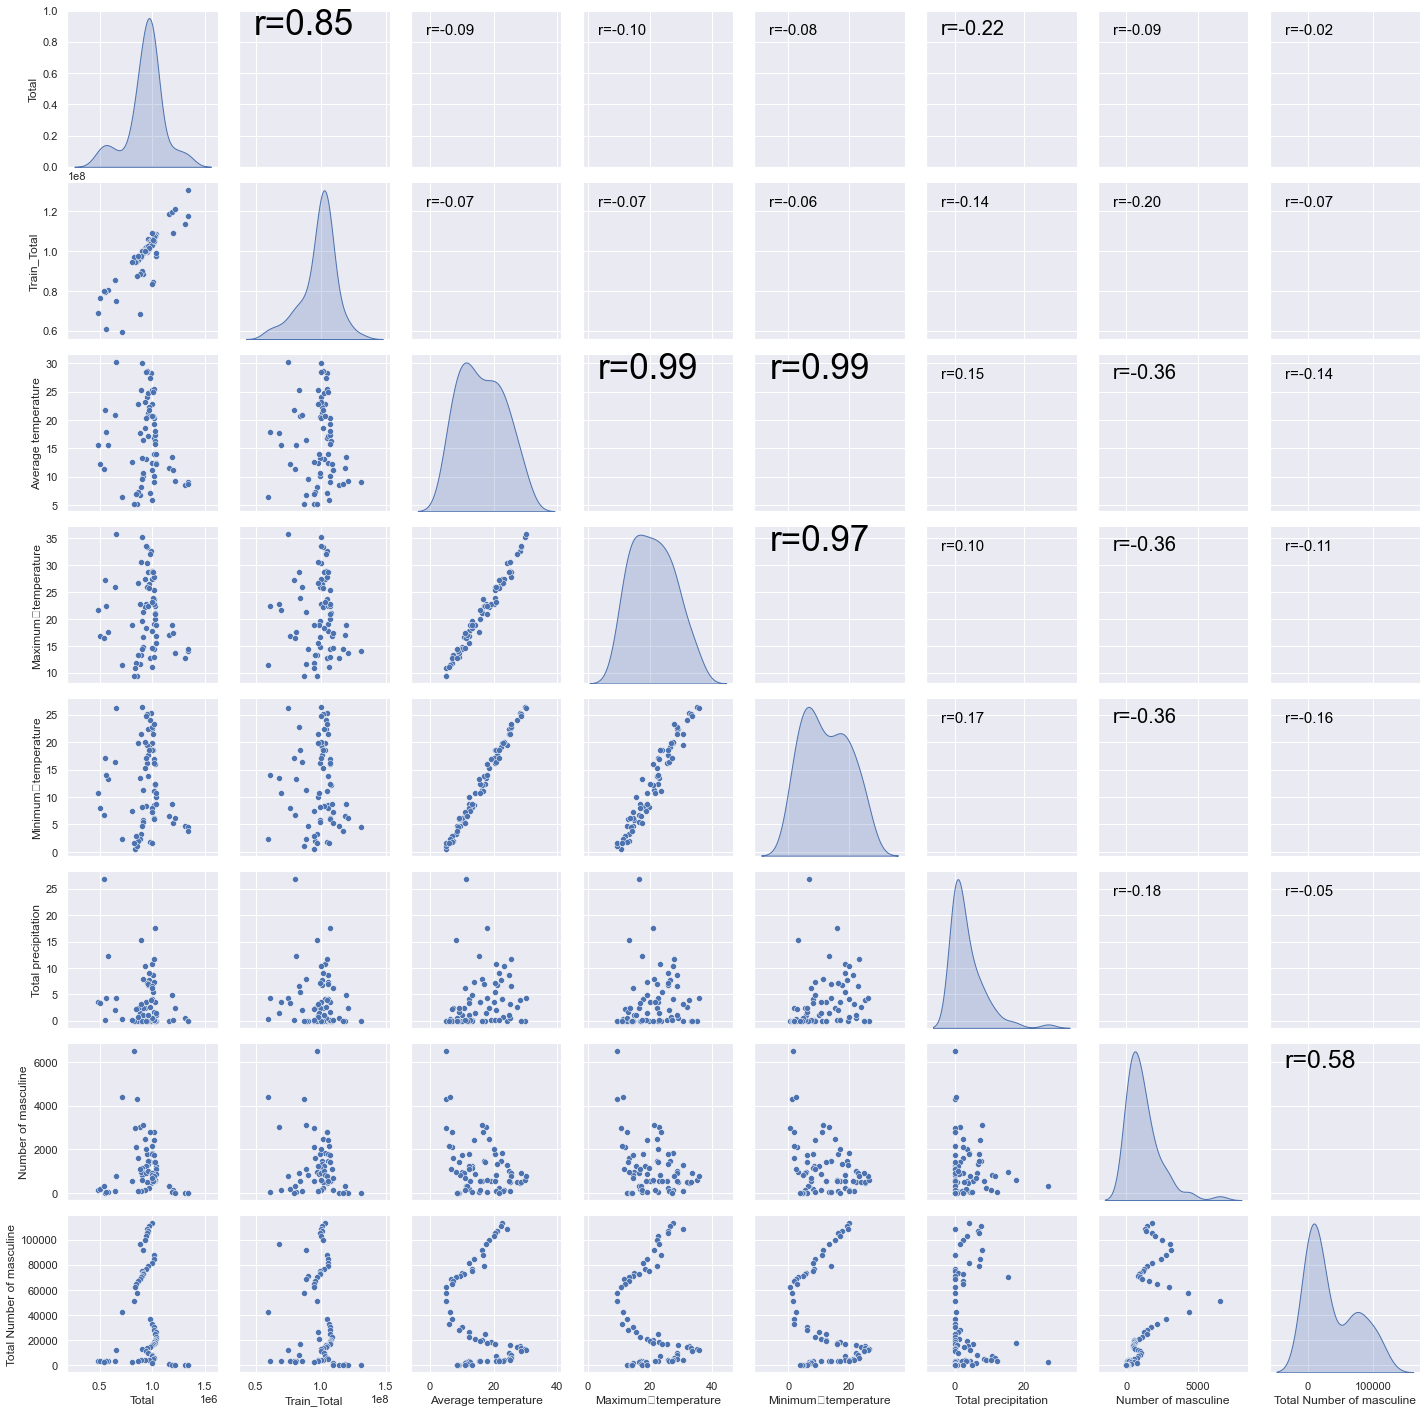

In [34]:
from seaborn_analyzer import CustomPairPlot
import seaborn as sns

cp = CustomPairPlot()
cp.pairanalyzer(last_df)

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0.0, flags=flags)


<Figure size 432x288 with 0 Axes>

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 12288 missing from current font.
  font.set_text(s, 0, flags=flags)


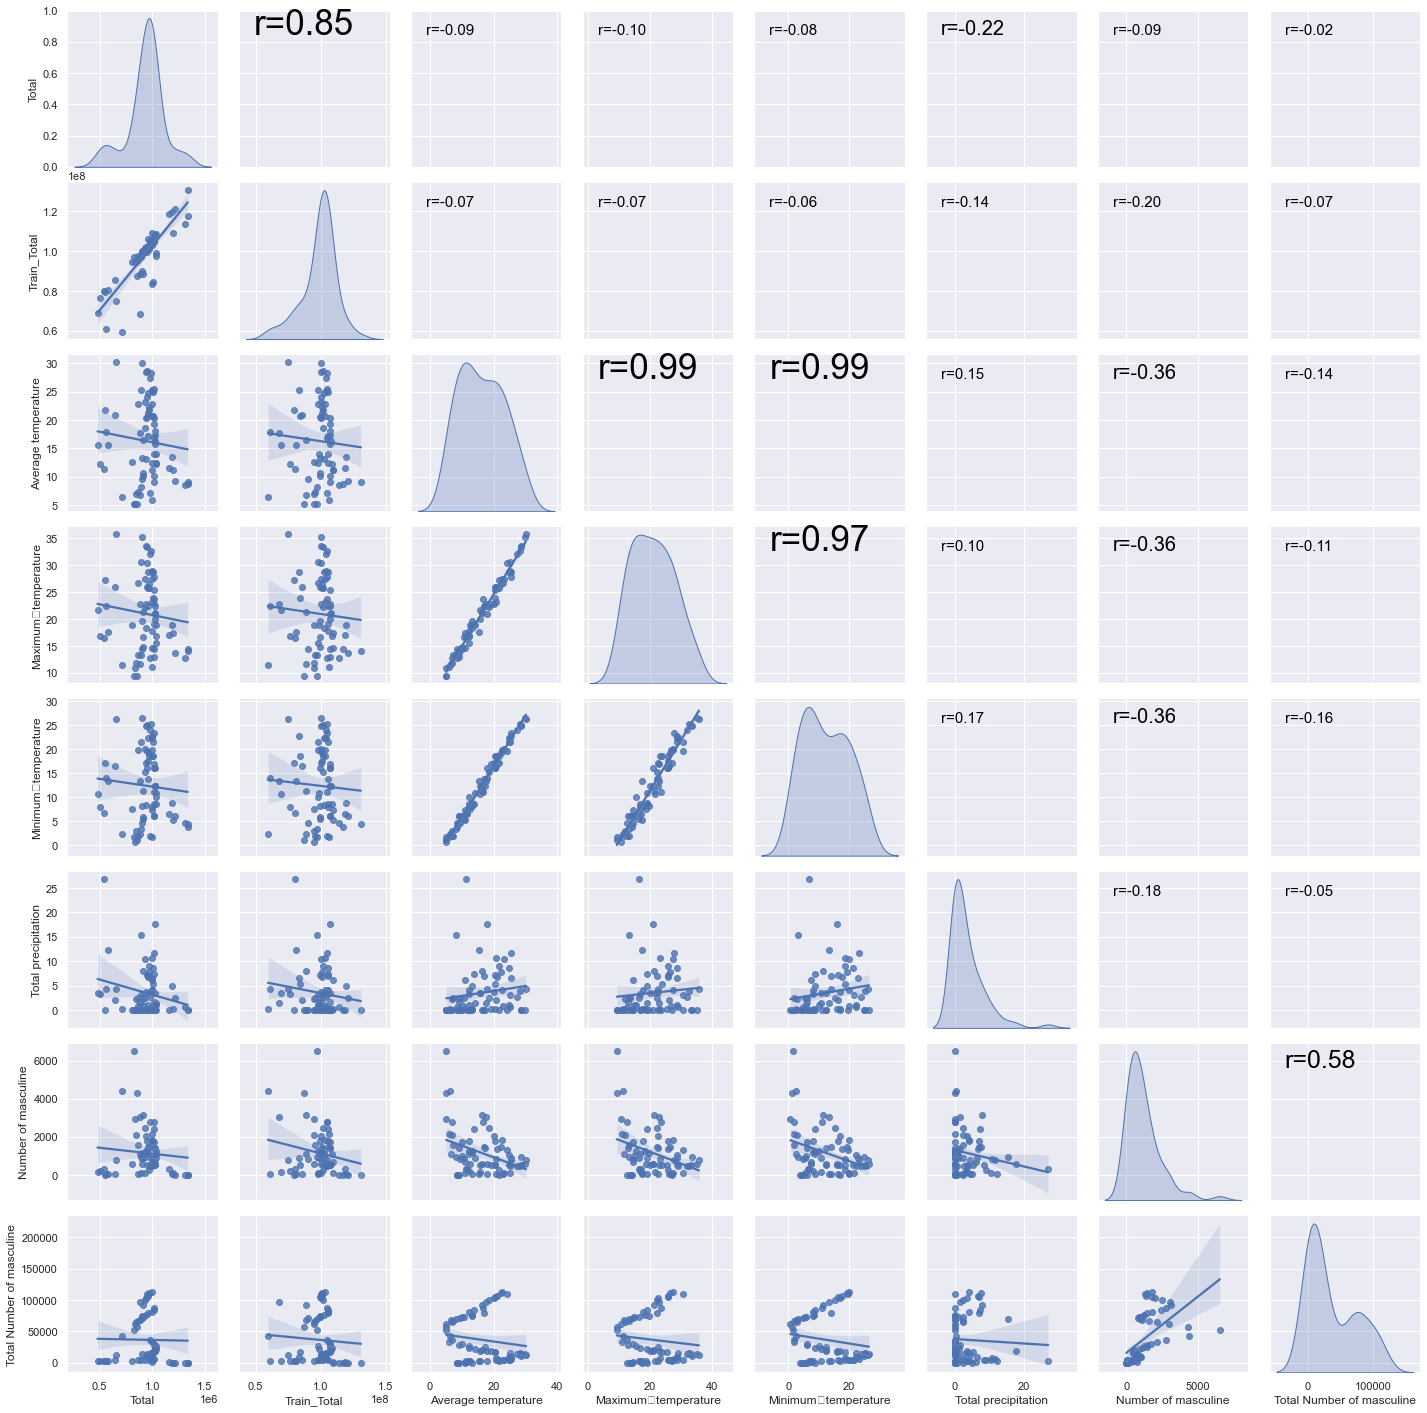

In [35]:
from seaborn_analyzer import CustomPairPlot
import seaborn as sns

cp = CustomPairPlot()
cp.pairanalyzer(last_df, lowerkind='reg')

## 学習データとテストデータを分ける

In [36]:
last_df = last_df.drop(['Date'], axis=1)
last_df100 = last_df100.drop(['Date'], axis=1)
last_df300 = last_df300.drop(['Date'], axis=1)
last_df500 = last_df500.drop(['Date'], axis=1)

learn_df = last_df[12:]
test_df = last_df[:12]
learn_df100 = last_df100[12:]
test_df100 = last_df100[:12]
learn_df300 = last_df300[12:]
test_df300 = last_df300[:12]
learn_df500 = last_df500[12:]
test_df500 = last_df500[:12]

## データを標準化

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(learn_df)
scaler.transform(learn_df)
scaler.transform(test_df)
learn_df_std = pd.DataFrame(scaler.transform(learn_df), columns=learn_df.columns)
test_df_std = pd.DataFrame(scaler.transform(test_df), columns=test_df.columns)


scaler.fit(learn_df100)
scaler.transform(learn_df100)
scaler.transform(test_df100)
learn_df_std100 = pd.DataFrame(scaler.transform(learn_df100), columns=learn_df100.columns)
test_df_std100 = pd.DataFrame(scaler.transform(test_df100), columns=test_df100.columns)


scaler.fit(learn_df300)
scaler.transform(learn_df300)
scaler.transform(test_df300)
learn_df_std300 = pd.DataFrame(scaler.transform(learn_df300), columns=learn_df300.columns)
test_df_std300 = pd.DataFrame(scaler.transform(test_df300), columns=test_df300.columns)


scaler.fit(learn_df500)
scaler.transform(learn_df500)
scaler.transform(test_df500)
learn_df_std500 = pd.DataFrame(scaler.transform(learn_df500), columns=learn_df500.columns)
test_df_std500 = pd.DataFrame(scaler.transform(test_df500), columns=test_df500.columns)

## Light GBM(全データ)

In [44]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 50,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'vervose': 0
}

RANDOM_STATE = 10

# 学習データと評価データの割合
TEST_SIZE = 0.2
score_list = []


x_train = learn_df_std[['Total precipitation', 'Average temperature', 'Total precipitation','Number of masculine', 'Total Number of masculine']]
y_train = learn_df_std['Total']
x_test = test_df_std[['Total precipitation', 'Average temperature', 'Total Number of masculine']]
y_test = test_df_std['Total']

# # 学習データと評価データを作成
# x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 0:df.shape[1]-1],
#                                                     df.iloc[:, df.shape[1]-1],
#                                                     test_size=TEST_SIZE,
#                                                     random_state=RANDOM_STATE)

# trainのデータセットの3割をモデル学習時のバリデーションデータとして利用する
x_train, x_valid, y_train, y_valid = train_test_split(x_train,
                                                    y_train,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

# LightGBMを利用するのに必要なフォーマットに変換
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

# ベストなパラメータ、途中経過を保存する
params = {
    'objective': 'mean_squared_error',
    'metric': 'mae',
    "verbosity": -1,
    "boosting_type": "gbdt",
}

best_params, history = {}, []

# LightGBM学習
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=200,
                valid_sets=[lgb_train, lgb_eval],
                early_stopping_rounds=50
               )

best_params = gbm.params
best_params

# LightGBM推論
y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration)



# 評価
def calculate_scores(true, pred):
    """全ての評価指標を計算する

    Parameters
    ----------
    true (np.array)       : 実測値
    pred (np.array)       : 予測値

    Returns
    -------
    scores (pd.DataFrame) : 各評価指標を纏めた結果

    """
    scores = {}
    scores = pd.DataFrame({'R2': r2_score(true, pred),
                          'MAE': mean_absolute_error(true, pred),
                          'MSE': mean_squared_error(true, pred),
                          'RMSE': np.sqrt(mean_squared_error(true, pred)),
                          'MAPE' : mean_absolute_percentage_error(true, pred)},
                           index = ['scores'])
    return scores
scores = calculate_scores(y_test, y_pred)
score_list.append(scores)
print("="*50)
print(scores)

print(score_list)

[I 2021-09-09 12:03:43,446] A new study created in memory with name: no-name-8e8af630-9854-4414-9d1a-41cdcab13cdb

feature_fraction, val_score: 0.497699:   0%|              | 0/7 [00:00<?, ?it/s][I 2021-09-09 12:03:43,530] Trial 0 finished with value: 0.4976986828305137 and parameters: {'feature_fraction': 0.8999999999999999}. Best is trial 0 with value: 0.4976986828305137.

feature_fraction, val_score: 0.497699:  29%|#7    | 2/7 [00:00<00:00, 12.61it/s][I 2021-09-09 12:03:43,614] Trial 1 finished with value: 0.4976986828305137 and parameters: {'feature_fraction': 0.6}. Best is trial 0 with value: 0.4976986828305137.

feature_fraction, val_score: 0.497699:  29%|#7    | 2/7 [00:00<00:00, 12.61it/s]

[1]	valid_0's l1: 0.780255	valid_1's l1: 0.497699
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.77583	valid_1's l1: 0.513887
[3]	valid_0's l1: 0.774058	valid_1's l1: 0.531588
[4]	valid_0's l1: 0.772822	valid_1's l1: 0.551174
[5]	valid_0's l1: 0.771711	valid_1's l1: 0.571185
[6]	valid_0's l1: 0.77071	valid_1's l1: 0.589196
[7]	valid_0's l1: 0.769809	valid_1's l1: 0.605405
[8]	valid_0's l1: 0.770865	valid_1's l1: 0.607373
[9]	valid_0's l1: 0.770775	valid_1's l1: 0.621456
[10]	valid_0's l1: 0.771887	valid_1's l1: 0.623168
[11]	valid_0's l1: 0.771809	valid_1's l1: 0.635404
[12]	valid_0's l1: 0.773071	valid_1's l1: 0.636892
[13]	valid_0's l1: 0.773571	valid_1's l1: 0.647523
[14]	valid_0's l1: 0.774993	valid_1's l1: 0.648817
[15]	valid_0's l1: 0.775428	valid_1's l1: 0.658053
[16]	valid_0's l1: 0.776665	valid_1's l1: 0.659178
[17]	valid_0's l1: 0.777042	valid_1's l1: 0.667203
[18]	valid_0's l1: 0.775653	valid_1's l1: 0.669982
[19]	valid_0's l1: 0.77674	valid


feature_fraction, val_score: 0.497699:  29%|#7    | 2/7 [00:00<00:00, 12.61it/s][I 2021-09-09 12:03:43,713] Trial 2 finished with value: 0.4976986828305137 and parameters: {'feature_fraction': 0.4}. Best is trial 0 with value: 0.4976986828305137.

feature_fraction, val_score: 0.497699:  57%|###4  | 4/7 [00:00<00:00, 11.02it/s][I 2021-09-09 12:03:43,812] Trial 3 finished with value: 0.4976986828305137 and parameters: {'feature_fraction': 1.0}. Best is trial 0 with value: 0.4976986828305137.

feature_fraction, val_score: 0.497699:  57%|###4  | 4/7 [00:00<00:00, 11.02it/s]

[28]	valid_0's l1: 0.790859	valid_1's l1: 0.678324
[29]	valid_0's l1: 0.791651	valid_1's l1: 0.683615
[30]	valid_0's l1: 0.792146	valid_1's l1: 0.683876
[31]	valid_0's l1: 0.792859	valid_1's l1: 0.688571
[32]	valid_0's l1: 0.793392	valid_1's l1: 0.68905
[33]	valid_0's l1: 0.794239	valid_1's l1: 0.693218
[34]	valid_0's l1: 0.794661	valid_1's l1: 0.693398
[35]	valid_0's l1: 0.795413	valid_1's l1: 0.697103
[36]	valid_0's l1: 0.795095	valid_1's l1: 0.696849
[37]	valid_0's l1: 0.795779	valid_1's l1: 0.70022
[38]	valid_0's l1: 0.795467	valid_1's l1: 0.69997
[39]	valid_0's l1: 0.79609	valid_1's l1: 0.70304
[40]	valid_0's l1: 0.795787	valid_1's l1: 0.702797
[41]	valid_0's l1: 0.796355	valid_1's l1: 0.705594
[42]	valid_0's l1: 0.79606	valid_1's l1: 0.705359
[43]	valid_0's l1: 0.796578	valid_1's l1: 0.70791
[44]	valid_0's l1: 0.796931	valid_1's l1: 0.70806
[45]	valid_0's l1: 0.797389	valid_1's l1: 0.710317
[46]	valid_0's l1: 0.797062	valid_1's l1: 0.710056
[47]	valid_0's l1: 0.797482	valid_1's l


feature_fraction, val_score: 0.497699:  57%|###4  | 4/7 [00:00<00:00, 11.02it/s][I 2021-09-09 12:03:43,921] Trial 4 finished with value: 0.4976986828305137 and parameters: {'feature_fraction': 0.5}. Best is trial 0 with value: 0.4976986828305137.

feature_fraction, val_score: 0.497699:  86%|#####1| 6/7 [00:00<00:00, 10.21it/s][I 2021-09-09 12:03:44,025] Trial 5 finished with value: 0.4976986828305137 and parameters: {'feature_fraction': 0.8}. Best is trial 0 with value: 0.4976986828305137.

feature_fraction, val_score: 0.497699:  86%|#####1| 6/7 [00:00<00:00, 10.21it/s]

[29]	valid_0's l1: 0.771178	valid_1's l1: 0.742181
[30]	valid_0's l1: 0.770813	valid_1's l1: 0.743762
[31]	valid_0's l1: 0.77148	valid_1's l1: 0.748357
[32]	valid_0's l1: 0.77114	valid_1's l1: 0.749832
[33]	valid_0's l1: 0.771762	valid_1's l1: 0.754117
[34]	valid_0's l1: 0.771445	valid_1's l1: 0.755494
[35]	valid_0's l1: 0.772025	valid_1's l1: 0.759491
[36]	valid_0's l1: 0.771729	valid_1's l1: 0.760776
[37]	valid_0's l1: 0.77227	valid_1's l1: 0.764503
[38]	valid_0's l1: 0.771994	valid_1's l1: 0.765703
[39]	valid_0's l1: 0.772499	valid_1's l1: 0.76918
[40]	valid_0's l1: 0.77224	valid_1's l1: 0.770299
[41]	valid_0's l1: 0.772712	valid_1's l1: 0.773542
[42]	valid_0's l1: 0.772471	valid_1's l1: 0.774587
[43]	valid_0's l1: 0.77291	valid_1's l1: 0.777612
[44]	valid_0's l1: 0.772612	valid_1's l1: 0.777015
[45]	valid_0's l1: 0.772367	valid_1's l1: 0.778076
[46]	valid_0's l1: 0.77207	valid_1's l1: 0.777481
[47]	valid_0's l1: 0.771829	valid_1's l1: 0.778522
[48]	valid_0's l1: 0.771534	valid_1's 


feature_fraction, val_score: 0.497699: 100%|######| 7/7 [00:00<00:00, 10.26it/s]


[20]	valid_0's l1: 0.770228	valid_1's l1: 0.706189
[21]	valid_0's l1: 0.770855	valid_1's l1: 0.712701
[22]	valid_0's l1: 0.770093	valid_1's l1: 0.714784
[23]	valid_0's l1: 0.770677	valid_1's l1: 0.720857
[24]	valid_0's l1: 0.769967	valid_1's l1: 0.722802
[25]	valid_0's l1: 0.770511	valid_1's l1: 0.728465
[26]	valid_0's l1: 0.770085	valid_1's l1: 0.73028
[27]	valid_0's l1: 0.770853	valid_1's l1: 0.735562
[28]	valid_0's l1: 0.770462	valid_1's l1: 0.737256
[29]	valid_0's l1: 0.771178	valid_1's l1: 0.742181
[30]	valid_0's l1: 0.770813	valid_1's l1: 0.743762
[31]	valid_0's l1: 0.77148	valid_1's l1: 0.748357
[32]	valid_0's l1: 0.77114	valid_1's l1: 0.749832
[33]	valid_0's l1: 0.771762	valid_1's l1: 0.754117
[34]	valid_0's l1: 0.771445	valid_1's l1: 0.755494
[35]	valid_0's l1: 0.772025	valid_1's l1: 0.759491
[36]	valid_0's l1: 0.771729	valid_1's l1: 0.760776
[37]	valid_0's l1: 0.77227	valid_1's l1: 0.764503
[38]	valid_0's l1: 0.771994	valid_1's l1: 0.765703
[39]	valid_0's l1: 0.772499	valid_1


num_leaves, val_score: 0.497699:   0%|                   | 0/20 [00:00<?, ?it/s][I 2021-09-09 12:03:44,235] Trial 7 finished with value: 0.4976986828305137 and parameters: {'num_leaves': 196}. Best is trial 7 with value: 0.4976986828305137.

num_leaves, val_score: 0.497699:   5%|5          | 1/20 [00:00<00:01, 10.54it/s]

[1]	valid_0's l1: 0.780255	valid_1's l1: 0.497699
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.77583	valid_1's l1: 0.513887
[3]	valid_0's l1: 0.774058	valid_1's l1: 0.531588
[4]	valid_0's l1: 0.772822	valid_1's l1: 0.551174
[5]	valid_0's l1: 0.771711	valid_1's l1: 0.571185
[6]	valid_0's l1: 0.77071	valid_1's l1: 0.589196
[7]	valid_0's l1: 0.769809	valid_1's l1: 0.605405
[8]	valid_0's l1: 0.770865	valid_1's l1: 0.607373
[9]	valid_0's l1: 0.770775	valid_1's l1: 0.621456
[10]	valid_0's l1: 0.771887	valid_1's l1: 0.623168
[11]	valid_0's l1: 0.771809	valid_1's l1: 0.635404
[12]	valid_0's l1: 0.773071	valid_1's l1: 0.636892
[13]	valid_0's l1: 0.773571	valid_1's l1: 0.647523
[14]	valid_0's l1: 0.774993	valid_1's l1: 0.648817
[15]	valid_0's l1: 0.775428	valid_1's l1: 0.658053
[16]	valid_0's l1: 0.776665	valid_1's l1: 0.659178
[17]	valid_0's l1: 0.777042	valid_1's l1: 0.667203
[18]	valid_0's l1: 0.775653	valid_1's l1: 0.669982
[19]	valid_0's l1: 0.77674	valid


num_leaves, val_score: 0.497699:  10%|#1         | 2/20 [00:00<00:01,  9.55it/s][I 2021-09-09 12:03:44,358] Trial 8 finished with value: 0.4976986828305137 and parameters: {'num_leaves': 46}. Best is trial 7 with value: 0.4976986828305137.

num_leaves, val_score: 0.497699:  10%|#1         | 2/20 [00:00<00:01,  9.55it/s]

[17]	valid_0's l1: 0.777042	valid_1's l1: 0.667203
[18]	valid_0's l1: 0.775653	valid_1's l1: 0.669982
[19]	valid_0's l1: 0.77674	valid_1's l1: 0.670971
[20]	valid_0's l1: 0.775477	valid_1's l1: 0.673498
[21]	valid_0's l1: 0.77583	valid_1's l1: 0.681006
[22]	valid_0's l1: 0.774649	valid_1's l1: 0.683367
[23]	valid_0's l1: 0.774978	valid_1's l1: 0.690364
[24]	valid_0's l1: 0.773876	valid_1's l1: 0.692569
[25]	valid_0's l1: 0.774817	valid_1's l1: 0.693424
[26]	valid_0's l1: 0.775113	valid_1's l1: 0.699727
[27]	valid_0's l1: 0.774095	valid_1's l1: 0.701806
[28]	valid_0's l1: 0.774661	valid_1's l1: 0.70769
[29]	valid_0's l1: 0.774168	valid_1's l1: 0.70936
[30]	valid_0's l1: 0.774889	valid_1's l1: 0.71103
[31]	valid_0's l1: 0.774427	valid_1's l1: 0.712592
[32]	valid_0's l1: 0.774891	valid_1's l1: 0.713306
[33]	valid_0's l1: 0.775425	valid_1's l1: 0.718594
[34]	valid_0's l1: 0.774955	valid_1's l1: 0.7201
[35]	valid_0's l1: 0.775655	valid_1's l1: 0.721539
[36]	valid_0's l1: 0.77516	valid_1's l


num_leaves, val_score: 0.497699:  15%|#6         | 3/20 [00:00<00:01,  9.15it/s][I 2021-09-09 12:03:44,472] Trial 9 finished with value: 0.4976986828305137 and parameters: {'num_leaves': 191}. Best is trial 7 with value: 0.4976986828305137.

num_leaves, val_score: 0.497699:  15%|#6         | 3/20 [00:00<00:01,  9.15it/s]

[1]	valid_0's l1: 0.780255	valid_1's l1: 0.497699
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.77583	valid_1's l1: 0.513887
[3]	valid_0's l1: 0.774058	valid_1's l1: 0.531588
[4]	valid_0's l1: 0.772822	valid_1's l1: 0.551174
[5]	valid_0's l1: 0.771711	valid_1's l1: 0.571185
[6]	valid_0's l1: 0.77071	valid_1's l1: 0.589196
[7]	valid_0's l1: 0.769809	valid_1's l1: 0.605405
[8]	valid_0's l1: 0.770865	valid_1's l1: 0.607373
[9]	valid_0's l1: 0.770775	valid_1's l1: 0.621456
[10]	valid_0's l1: 0.771887	valid_1's l1: 0.623168
[11]	valid_0's l1: 0.771809	valid_1's l1: 0.635404
[12]	valid_0's l1: 0.773071	valid_1's l1: 0.636892
[13]	valid_0's l1: 0.773571	valid_1's l1: 0.647523
[14]	valid_0's l1: 0.774993	valid_1's l1: 0.648817
[15]	valid_0's l1: 0.775428	valid_1's l1: 0.658053
[16]	valid_0's l1: 0.776665	valid_1's l1: 0.659178
[17]	valid_0's l1: 0.777042	valid_1's l1: 0.667203
[18]	valid_0's l1: 0.775653	valid_1's l1: 0.669982
[19]	valid_0's l1: 0.77674	valid


num_leaves, val_score: 0.497699:  20%|##2        | 4/20 [00:00<00:01,  8.57it/s][I 2021-09-09 12:03:44,601] Trial 10 finished with value: 0.4976986828305137 and parameters: {'num_leaves': 208}. Best is trial 7 with value: 0.4976986828305137.

num_leaves, val_score: 0.497699:  20%|##2        | 4/20 [00:00<00:01,  8.57it/s]

[46]	valid_0's l1: 0.77687	valid_1's l1: 0.744351
[47]	valid_0's l1: 0.777353	valid_1's l1: 0.744834
[48]	valid_0's l1: 0.77687	valid_1's l1: 0.745897
[49]	valid_0's l1: 0.777409	valid_1's l1: 0.749608
[50]	valid_0's l1: 0.776777	valid_1's l1: 0.750781
[51]	valid_0's l1: 0.77728	valid_1's l1: 0.75424
Early stopping, best iteration is:
[1]	valid_0's l1: 0.780255	valid_1's l1: 0.497699
[1]	valid_0's l1: 0.780255	valid_1's l1: 0.497699
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.77583	valid_1's l1: 0.513887
[3]	valid_0's l1: 0.774058	valid_1's l1: 0.531588
[4]	valid_0's l1: 0.772822	valid_1's l1: 0.551174
[5]	valid_0's l1: 0.771711	valid_1's l1: 0.571185
[6]	valid_0's l1: 0.77071	valid_1's l1: 0.589196
[7]	valid_0's l1: 0.769809	valid_1's l1: 0.605405
[8]	valid_0's l1: 0.770865	valid_1's l1: 0.607373
[9]	valid_0's l1: 0.770775	valid_1's l1: 0.621456
[10]	valid_0's l1: 0.771887	valid_1's l1: 0.623168
[11]	valid_0's l1: 0.771809	valid_1's l1: 0.635404
[1


num_leaves, val_score: 0.497699:  25%|##7        | 5/20 [00:00<00:01,  8.88it/s][I 2021-09-09 12:03:44,706] Trial 11 finished with value: 0.4976986828305137 and parameters: {'num_leaves': 95}. Best is trial 7 with value: 0.4976986828305137.

num_leaves, val_score: 0.497699:  25%|##7        | 5/20 [00:00<00:01,  8.88it/s]

[50]	valid_0's l1: 0.776777	valid_1's l1: 0.750781
[51]	valid_0's l1: 0.77728	valid_1's l1: 0.75424
Early stopping, best iteration is:
[1]	valid_0's l1: 0.780255	valid_1's l1: 0.497699
[1]	valid_0's l1: 0.780255	valid_1's l1: 0.497699
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.77583	valid_1's l1: 0.513887
[3]	valid_0's l1: 0.774058	valid_1's l1: 0.531588
[4]	valid_0's l1: 0.772822	valid_1's l1: 0.551174
[5]	valid_0's l1: 0.771711	valid_1's l1: 0.571185
[6]	valid_0's l1: 0.77071	valid_1's l1: 0.589196
[7]	valid_0's l1: 0.769809	valid_1's l1: 0.605405
[8]	valid_0's l1: 0.770865	valid_1's l1: 0.607373
[9]	valid_0's l1: 0.770775	valid_1's l1: 0.621456
[10]	valid_0's l1: 0.771887	valid_1's l1: 0.623168
[11]	valid_0's l1: 0.771809	valid_1's l1: 0.635404
[12]	valid_0's l1: 0.773071	valid_1's l1: 0.636892
[13]	valid_0's l1: 0.773571	valid_1's l1: 0.647523
[14]	valid_0's l1: 0.774993	valid_1's l1: 0.648817
[15]	valid_0's l1: 0.775428	valid_1's l1: 0.658053



num_leaves, val_score: 0.497699:  30%|###3       | 6/20 [00:00<00:01,  9.14it/s][I 2021-09-09 12:03:44,809] Trial 12 finished with value: 0.4976986828305137 and parameters: {'num_leaves': 7}. Best is trial 7 with value: 0.4976986828305137.

num_leaves, val_score: 0.497699:  30%|###3       | 6/20 [00:00<00:01,  9.14it/s]

[43]	valid_0's l1: 0.77608	valid_1's l1: 0.737967
[44]	valid_0's l1: 0.776679	valid_1's l1: 0.742091
[45]	valid_0's l1: 0.77739	valid_1's l1: 0.743208
[46]	valid_0's l1: 0.77687	valid_1's l1: 0.744351
[47]	valid_0's l1: 0.777353	valid_1's l1: 0.744834
[48]	valid_0's l1: 0.77687	valid_1's l1: 0.745897
[49]	valid_0's l1: 0.777409	valid_1's l1: 0.749608
[50]	valid_0's l1: 0.776777	valid_1's l1: 0.750781
[51]	valid_0's l1: 0.77728	valid_1's l1: 0.75424
Early stopping, best iteration is:
[1]	valid_0's l1: 0.780255	valid_1's l1: 0.497699
[1]	valid_0's l1: 0.780255	valid_1's l1: 0.497699
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.77583	valid_1's l1: 0.513887
[3]	valid_0's l1: 0.774058	valid_1's l1: 0.531588
[4]	valid_0's l1: 0.772822	valid_1's l1: 0.551174
[5]	valid_0's l1: 0.771711	valid_1's l1: 0.571185
[6]	valid_0's l1: 0.77071	valid_1's l1: 0.589196
[7]	valid_0's l1: 0.769809	valid_1's l1: 0.605405
[8]	valid_0's l1: 0.770865	valid_1's l1: 0.607373
[9]


num_leaves, val_score: 0.497699:  35%|###8       | 7/20 [00:00<00:01,  9.13it/s][I 2021-09-09 12:03:44,918] Trial 13 finished with value: 0.4976986828305137 and parameters: {'num_leaves': 138}. Best is trial 7 with value: 0.4976986828305137.

num_leaves, val_score: 0.497699:  35%|###8       | 7/20 [00:00<00:01,  9.13it/s]

[44]	valid_0's l1: 0.776679	valid_1's l1: 0.742091
[45]	valid_0's l1: 0.77739	valid_1's l1: 0.743208
[46]	valid_0's l1: 0.77687	valid_1's l1: 0.744351
[47]	valid_0's l1: 0.777353	valid_1's l1: 0.744834
[48]	valid_0's l1: 0.77687	valid_1's l1: 0.745897
[49]	valid_0's l1: 0.777409	valid_1's l1: 0.749608
[50]	valid_0's l1: 0.776777	valid_1's l1: 0.750781
[51]	valid_0's l1: 0.77728	valid_1's l1: 0.75424
Early stopping, best iteration is:
[1]	valid_0's l1: 0.780255	valid_1's l1: 0.497699
[1]	valid_0's l1: 0.780255	valid_1's l1: 0.497699
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.77583	valid_1's l1: 0.513887
[3]	valid_0's l1: 0.774058	valid_1's l1: 0.531588
[4]	valid_0's l1: 0.772822	valid_1's l1: 0.551174
[5]	valid_0's l1: 0.771711	valid_1's l1: 0.571185
[6]	valid_0's l1: 0.77071	valid_1's l1: 0.589196
[7]	valid_0's l1: 0.769809	valid_1's l1: 0.605405
[8]	valid_0's l1: 0.770865	valid_1's l1: 0.607373
[9]	valid_0's l1: 0.770775	valid_1's l1: 0.621456
[10


num_leaves, val_score: 0.497699:  40%|####4      | 8/20 [00:00<00:01,  8.61it/s][I 2021-09-09 12:03:45,050] Trial 14 finished with value: 0.4976986828305137 and parameters: {'num_leaves': 221}. Best is trial 7 with value: 0.4976986828305137.

num_leaves, val_score: 0.497699:  40%|####4      | 8/20 [00:00<00:01,  8.61it/s]

[23]	valid_0's l1: 0.774978	valid_1's l1: 0.690364
[24]	valid_0's l1: 0.773876	valid_1's l1: 0.692569
[25]	valid_0's l1: 0.774817	valid_1's l1: 0.693424
[26]	valid_0's l1: 0.775113	valid_1's l1: 0.699727
[27]	valid_0's l1: 0.774095	valid_1's l1: 0.701806
[28]	valid_0's l1: 0.774661	valid_1's l1: 0.70769
[29]	valid_0's l1: 0.774168	valid_1's l1: 0.70936
[30]	valid_0's l1: 0.774889	valid_1's l1: 0.71103
[31]	valid_0's l1: 0.774427	valid_1's l1: 0.712592
[32]	valid_0's l1: 0.774891	valid_1's l1: 0.713306
[33]	valid_0's l1: 0.775425	valid_1's l1: 0.718594
[34]	valid_0's l1: 0.774955	valid_1's l1: 0.7201
[35]	valid_0's l1: 0.775655	valid_1's l1: 0.721539
[36]	valid_0's l1: 0.77516	valid_1's l1: 0.722945
[37]	valid_0's l1: 0.775732	valid_1's l1: 0.727871
[38]	valid_0's l1: 0.775246	valid_1's l1: 0.729183
[39]	valid_0's l1: 0.77599	valid_1's l1: 0.730526
[40]	valid_0's l1: 0.776633	valid_1's l1: 0.734951
[41]	valid_0's l1: 0.776055	valid_1's l1: 0.736221
[42]	valid_0's l1: 0.776618	valid_1's 


num_leaves, val_score: 0.497699:  45%|####9      | 9/20 [00:01<00:01,  8.26it/s][I 2021-09-09 12:03:45,182] Trial 15 finished with value: 0.4976986828305137 and parameters: {'num_leaves': 44}. Best is trial 7 with value: 0.4976986828305137.

num_leaves, val_score: 0.497699:  45%|####9      | 9/20 [00:01<00:01,  8.26it/s]

[12]	valid_0's l1: 0.773071	valid_1's l1: 0.636892
[13]	valid_0's l1: 0.773571	valid_1's l1: 0.647523
[14]	valid_0's l1: 0.774993	valid_1's l1: 0.648817
[15]	valid_0's l1: 0.775428	valid_1's l1: 0.658053
[16]	valid_0's l1: 0.776665	valid_1's l1: 0.659178
[17]	valid_0's l1: 0.777042	valid_1's l1: 0.667203
[18]	valid_0's l1: 0.775653	valid_1's l1: 0.669982
[19]	valid_0's l1: 0.77674	valid_1's l1: 0.670971
[20]	valid_0's l1: 0.775477	valid_1's l1: 0.673498
[21]	valid_0's l1: 0.77583	valid_1's l1: 0.681006
[22]	valid_0's l1: 0.774649	valid_1's l1: 0.683367
[23]	valid_0's l1: 0.774978	valid_1's l1: 0.690364
[24]	valid_0's l1: 0.773876	valid_1's l1: 0.692569
[25]	valid_0's l1: 0.774817	valid_1's l1: 0.693424
[26]	valid_0's l1: 0.775113	valid_1's l1: 0.699727
[27]	valid_0's l1: 0.774095	valid_1's l1: 0.701806
[28]	valid_0's l1: 0.774661	valid_1's l1: 0.70769
[29]	valid_0's l1: 0.774168	valid_1's l1: 0.70936
[30]	valid_0's l1: 0.774889	valid_1's l1: 0.71103
[31]	valid_0's l1: 0.774427	valid_1'


num_leaves, val_score: 0.497699:  50%|#####     | 10/20 [00:01<00:01,  8.38it/s][I 2021-09-09 12:03:45,297] Trial 16 finished with value: 0.4976986828305137 and parameters: {'num_leaves': 91}. Best is trial 7 with value: 0.4976986828305137.

num_leaves, val_score: 0.497699:  50%|#####     | 10/20 [00:01<00:01,  8.38it/s]

[1]	valid_0's l1: 0.780255	valid_1's l1: 0.497699
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.77583	valid_1's l1: 0.513887
[3]	valid_0's l1: 0.774058	valid_1's l1: 0.531588
[4]	valid_0's l1: 0.772822	valid_1's l1: 0.551174
[5]	valid_0's l1: 0.771711	valid_1's l1: 0.571185
[6]	valid_0's l1: 0.77071	valid_1's l1: 0.589196
[7]	valid_0's l1: 0.769809	valid_1's l1: 0.605405
[8]	valid_0's l1: 0.770865	valid_1's l1: 0.607373
[9]	valid_0's l1: 0.770775	valid_1's l1: 0.621456
[10]	valid_0's l1: 0.771887	valid_1's l1: 0.623168
[11]	valid_0's l1: 0.771809	valid_1's l1: 0.635404
[12]	valid_0's l1: 0.773071	valid_1's l1: 0.636892
[13]	valid_0's l1: 0.773571	valid_1's l1: 0.647523
[14]	valid_0's l1: 0.774993	valid_1's l1: 0.648817
[15]	valid_0's l1: 0.775428	valid_1's l1: 0.658053
[16]	valid_0's l1: 0.776665	valid_1's l1: 0.659178
[17]	valid_0's l1: 0.777042	valid_1's l1: 0.667203
[18]	valid_0's l1: 0.775653	valid_1's l1: 0.669982
[19]	valid_0's l1: 0.77674	valid


num_leaves, val_score: 0.497699:  55%|#####5    | 11/20 [00:01<00:01,  8.24it/s][I 2021-09-09 12:03:45,422] Trial 17 finished with value: 0.4976986828305137 and parameters: {'num_leaves': 255}. Best is trial 7 with value: 0.4976986828305137.

num_leaves, val_score: 0.497699:  55%|#####5    | 11/20 [00:01<00:01,  8.24it/s]

[48]	valid_0's l1: 0.77687	valid_1's l1: 0.745897
[49]	valid_0's l1: 0.777409	valid_1's l1: 0.749608
[50]	valid_0's l1: 0.776777	valid_1's l1: 0.750781
[51]	valid_0's l1: 0.77728	valid_1's l1: 0.75424
Early stopping, best iteration is:
[1]	valid_0's l1: 0.780255	valid_1's l1: 0.497699
[1]	valid_0's l1: 0.780255	valid_1's l1: 0.497699
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.77583	valid_1's l1: 0.513887
[3]	valid_0's l1: 0.774058	valid_1's l1: 0.531588
[4]	valid_0's l1: 0.772822	valid_1's l1: 0.551174
[5]	valid_0's l1: 0.771711	valid_1's l1: 0.571185
[6]	valid_0's l1: 0.77071	valid_1's l1: 0.589196
[7]	valid_0's l1: 0.769809	valid_1's l1: 0.605405
[8]	valid_0's l1: 0.770865	valid_1's l1: 0.607373
[9]	valid_0's l1: 0.770775	valid_1's l1: 0.621456
[10]	valid_0's l1: 0.771887	valid_1's l1: 0.623168
[11]	valid_0's l1: 0.771809	valid_1's l1: 0.635404
[12]	valid_0's l1: 0.773071	valid_1's l1: 0.636892
[13]	valid_0's l1: 0.773571	valid_1's l1: 0.647523
[


num_leaves, val_score: 0.497699:  60%|######    | 12/20 [00:01<00:00,  8.15it/s][I 2021-09-09 12:03:45,549] Trial 18 finished with value: 0.4976986828305137 and parameters: {'num_leaves': 150}. Best is trial 7 with value: 0.4976986828305137.

num_leaves, val_score: 0.497699:  60%|######    | 12/20 [00:01<00:00,  8.15it/s]

[47]	valid_0's l1: 0.777353	valid_1's l1: 0.744834
[48]	valid_0's l1: 0.77687	valid_1's l1: 0.745897
[49]	valid_0's l1: 0.777409	valid_1's l1: 0.749608
[50]	valid_0's l1: 0.776777	valid_1's l1: 0.750781
[51]	valid_0's l1: 0.77728	valid_1's l1: 0.75424
Early stopping, best iteration is:
[1]	valid_0's l1: 0.780255	valid_1's l1: 0.497699
[1]	valid_0's l1: 0.780255	valid_1's l1: 0.497699
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.77583	valid_1's l1: 0.513887
[3]	valid_0's l1: 0.774058	valid_1's l1: 0.531588
[4]	valid_0's l1: 0.772822	valid_1's l1: 0.551174
[5]	valid_0's l1: 0.771711	valid_1's l1: 0.571185
[6]	valid_0's l1: 0.77071	valid_1's l1: 0.589196
[7]	valid_0's l1: 0.769809	valid_1's l1: 0.605405
[8]	valid_0's l1: 0.770865	valid_1's l1: 0.607373
[9]	valid_0's l1: 0.770775	valid_1's l1: 0.621456
[10]	valid_0's l1: 0.771887	valid_1's l1: 0.623168
[11]	valid_0's l1: 0.771809	valid_1's l1: 0.635404
[12]	valid_0's l1: 0.773071	valid_1's l1: 0.636892
[


num_leaves, val_score: 0.497699:  65%|######5   | 13/20 [00:01<00:00,  8.04it/s][I 2021-09-09 12:03:45,677] Trial 19 finished with value: 0.4976986828305137 and parameters: {'num_leaves': 63}. Best is trial 7 with value: 0.4976986828305137.

num_leaves, val_score: 0.497699:  65%|######5   | 13/20 [00:01<00:00,  8.04it/s]

[17]	valid_0's l1: 0.777042	valid_1's l1: 0.667203
[18]	valid_0's l1: 0.775653	valid_1's l1: 0.669982
[19]	valid_0's l1: 0.77674	valid_1's l1: 0.670971
[20]	valid_0's l1: 0.775477	valid_1's l1: 0.673498
[21]	valid_0's l1: 0.77583	valid_1's l1: 0.681006
[22]	valid_0's l1: 0.774649	valid_1's l1: 0.683367
[23]	valid_0's l1: 0.774978	valid_1's l1: 0.690364
[24]	valid_0's l1: 0.773876	valid_1's l1: 0.692569
[25]	valid_0's l1: 0.774817	valid_1's l1: 0.693424
[26]	valid_0's l1: 0.775113	valid_1's l1: 0.699727
[27]	valid_0's l1: 0.774095	valid_1's l1: 0.701806
[28]	valid_0's l1: 0.774661	valid_1's l1: 0.70769
[29]	valid_0's l1: 0.774168	valid_1's l1: 0.70936
[30]	valid_0's l1: 0.774889	valid_1's l1: 0.71103
[31]	valid_0's l1: 0.774427	valid_1's l1: 0.712592
[32]	valid_0's l1: 0.774891	valid_1's l1: 0.713306
[33]	valid_0's l1: 0.775425	valid_1's l1: 0.718594
[34]	valid_0's l1: 0.774955	valid_1's l1: 0.7201
[35]	valid_0's l1: 0.775655	valid_1's l1: 0.721539
[36]	valid_0's l1: 0.77516	valid_1's l


num_leaves, val_score: 0.497699:  70%|#######   | 14/20 [00:01<00:00,  7.98it/s][I 2021-09-09 12:03:45,804] Trial 20 finished with value: 0.4976986828305137 and parameters: {'num_leaves': 2}. Best is trial 7 with value: 0.4976986828305137.

num_leaves, val_score: 0.497699:  70%|#######   | 14/20 [00:01<00:00,  7.98it/s]

[14]	valid_0's l1: 0.774993	valid_1's l1: 0.648817
[15]	valid_0's l1: 0.775428	valid_1's l1: 0.658053
[16]	valid_0's l1: 0.776665	valid_1's l1: 0.659178
[17]	valid_0's l1: 0.777042	valid_1's l1: 0.667203
[18]	valid_0's l1: 0.775653	valid_1's l1: 0.669982
[19]	valid_0's l1: 0.77674	valid_1's l1: 0.670971
[20]	valid_0's l1: 0.775477	valid_1's l1: 0.673498
[21]	valid_0's l1: 0.77583	valid_1's l1: 0.681006
[22]	valid_0's l1: 0.774649	valid_1's l1: 0.683367
[23]	valid_0's l1: 0.774978	valid_1's l1: 0.690364
[24]	valid_0's l1: 0.773876	valid_1's l1: 0.692569
[25]	valid_0's l1: 0.774817	valid_1's l1: 0.693424
[26]	valid_0's l1: 0.775113	valid_1's l1: 0.699727
[27]	valid_0's l1: 0.774095	valid_1's l1: 0.701806
[28]	valid_0's l1: 0.774661	valid_1's l1: 0.70769
[29]	valid_0's l1: 0.774168	valid_1's l1: 0.70936
[30]	valid_0's l1: 0.774889	valid_1's l1: 0.71103
[31]	valid_0's l1: 0.774427	valid_1's l1: 0.712592
[32]	valid_0's l1: 0.774891	valid_1's l1: 0.713306
[33]	valid_0's l1: 0.775425	valid_1'


num_leaves, val_score: 0.497699:  75%|#######5  | 15/20 [00:01<00:00,  7.93it/s]

[1]	valid_0's l1: 0.780255	valid_1's l1: 0.497699
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.77583	valid_1's l1: 0.513887
[3]	valid_0's l1: 0.774058	valid_1's l1: 0.531588
[4]	valid_0's l1: 0.772822	valid_1's l1: 0.551174
[5]	valid_0's l1: 0.771711	valid_1's l1: 0.571185
[6]	valid_0's l1: 0.77071	valid_1's l1: 0.589196
[7]	valid_0's l1: 0.769809	valid_1's l1: 0.605405
[8]	valid_0's l1: 0.770865	valid_1's l1: 0.607373
[9]	valid_0's l1: 0.770775	valid_1's l1: 0.621456
[10]	valid_0's l1: 0.771887	valid_1's l1: 0.623168
[11]	valid_0's l1: 0.771809	valid_1's l1: 0.635404
[12]	valid_0's l1: 0.773071	valid_1's l1: 0.636892
[13]	valid_0's l1: 0.773571	valid_1's l1: 0.647523
[14]	valid_0's l1: 0.774993	valid_1's l1: 0.648817
[15]	valid_0's l1: 0.775428	valid_1's l1: 0.658053
[16]	valid_0's l1: 0.776665	valid_1's l1: 0.659178
[17]	valid_0's l1: 0.777042	valid_1's l1: 0.667203
[18]	valid_0's l1: 0.775653	valid_1's l1: 0.669982
[19]	valid_0's l1: 0.77674	valid

[I 2021-09-09 12:03:45,932] Trial 21 finished with value: 0.4976986828305137 and parameters: {'num_leaves': 167}. Best is trial 7 with value: 0.4976986828305137.

num_leaves, val_score: 0.497699:  75%|#######5  | 15/20 [00:01<00:00,  7.93it/s][I 2021-09-09 12:03:46,020] Trial 22 finished with value: 0.4976986828305137 and parameters: {'num_leaves': 110}. Best is trial 7 with value: 0.4976986828305137.

num_leaves, val_score: 0.497699:  80%|########  | 16/20 [00:01<00:00,  7.93it/s]

[1]	valid_0's l1: 0.780255	valid_1's l1: 0.497699
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.77583	valid_1's l1: 0.513887
[3]	valid_0's l1: 0.774058	valid_1's l1: 0.531588
[4]	valid_0's l1: 0.772822	valid_1's l1: 0.551174
[5]	valid_0's l1: 0.771711	valid_1's l1: 0.571185
[6]	valid_0's l1: 0.77071	valid_1's l1: 0.589196
[7]	valid_0's l1: 0.769809	valid_1's l1: 0.605405
[8]	valid_0's l1: 0.770865	valid_1's l1: 0.607373
[9]	valid_0's l1: 0.770775	valid_1's l1: 0.621456
[10]	valid_0's l1: 0.771887	valid_1's l1: 0.623168
[11]	valid_0's l1: 0.771809	valid_1's l1: 0.635404
[12]	valid_0's l1: 0.773071	valid_1's l1: 0.636892
[13]	valid_0's l1: 0.773571	valid_1's l1: 0.647523
[14]	valid_0's l1: 0.774993	valid_1's l1: 0.648817
[15]	valid_0's l1: 0.775428	valid_1's l1: 0.658053
[16]	valid_0's l1: 0.776665	valid_1's l1: 0.659178
[17]	valid_0's l1: 0.777042	valid_1's l1: 0.667203
[18]	valid_0's l1: 0.775653	valid_1's l1: 0.669982
[19]	valid_0's l1: 0.77674	valid


num_leaves, val_score: 0.497699:  85%|########5 | 17/20 [00:02<00:00,  8.51it/s][I 2021-09-09 12:03:46,147] Trial 23 finished with value: 0.4976986828305137 and parameters: {'num_leaves': 52}. Best is trial 7 with value: 0.4976986828305137.

num_leaves, val_score: 0.497699:  85%|########5 | 17/20 [00:02<00:00,  8.51it/s]

[1]	valid_0's l1: 0.780255	valid_1's l1: 0.497699
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.77583	valid_1's l1: 0.513887
[3]	valid_0's l1: 0.774058	valid_1's l1: 0.531588
[4]	valid_0's l1: 0.772822	valid_1's l1: 0.551174
[5]	valid_0's l1: 0.771711	valid_1's l1: 0.571185
[6]	valid_0's l1: 0.77071	valid_1's l1: 0.589196
[7]	valid_0's l1: 0.769809	valid_1's l1: 0.605405
[8]	valid_0's l1: 0.770865	valid_1's l1: 0.607373
[9]	valid_0's l1: 0.770775	valid_1's l1: 0.621456
[10]	valid_0's l1: 0.771887	valid_1's l1: 0.623168
[11]	valid_0's l1: 0.771809	valid_1's l1: 0.635404
[12]	valid_0's l1: 0.773071	valid_1's l1: 0.636892
[13]	valid_0's l1: 0.773571	valid_1's l1: 0.647523
[14]	valid_0's l1: 0.774993	valid_1's l1: 0.648817
[15]	valid_0's l1: 0.775428	valid_1's l1: 0.658053
[16]	valid_0's l1: 0.776665	valid_1's l1: 0.659178
[17]	valid_0's l1: 0.777042	valid_1's l1: 0.667203
[18]	valid_0's l1: 0.775653	valid_1's l1: 0.669982
[19]	valid_0's l1: 0.77674	valid


num_leaves, val_score: 0.497699:  90%|######### | 18/20 [00:02<00:00,  8.20it/s][I 2021-09-09 12:03:46,284] Trial 24 finished with value: 0.4976986828305137 and parameters: {'num_leaves': 170}. Best is trial 7 with value: 0.4976986828305137.

num_leaves, val_score: 0.497699:  90%|######### | 18/20 [00:02<00:00,  8.20it/s][I 2021-09-09 12:03:46,364] Trial 25 finished with value: 0.4976986828305137 and parameters: {'num_leaves': 109}. Best is trial 7 with value: 0.4976986828305137.

num_leaves, val_score: 0.497699:  95%|#########5| 19/20 [00:02<00:00,  8.20it/s]

[38]	valid_0's l1: 0.775246	valid_1's l1: 0.729183
[39]	valid_0's l1: 0.77599	valid_1's l1: 0.730526
[40]	valid_0's l1: 0.776633	valid_1's l1: 0.734951
[41]	valid_0's l1: 0.776055	valid_1's l1: 0.736221
[42]	valid_0's l1: 0.776618	valid_1's l1: 0.736784
[43]	valid_0's l1: 0.77608	valid_1's l1: 0.737967
[44]	valid_0's l1: 0.776679	valid_1's l1: 0.742091
[45]	valid_0's l1: 0.77739	valid_1's l1: 0.743208
[46]	valid_0's l1: 0.77687	valid_1's l1: 0.744351
[47]	valid_0's l1: 0.777353	valid_1's l1: 0.744834
[48]	valid_0's l1: 0.77687	valid_1's l1: 0.745897
[49]	valid_0's l1: 0.777409	valid_1's l1: 0.749608
[50]	valid_0's l1: 0.776777	valid_1's l1: 0.750781
[51]	valid_0's l1: 0.77728	valid_1's l1: 0.75424
Early stopping, best iteration is:
[1]	valid_0's l1: 0.780255	valid_1's l1: 0.497699
[1]	valid_0's l1: 0.780255	valid_1's l1: 0.497699
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.77583	valid_1's l1: 0.513887
[3]	valid_0's l1: 0.774058	valid_1's l1: 0.53158


num_leaves, val_score: 0.497699: 100%|##########| 20/20 [00:02<00:00,  8.58it/s]


[44]	valid_0's l1: 0.776679	valid_1's l1: 0.742091
[45]	valid_0's l1: 0.77739	valid_1's l1: 0.743208
[46]	valid_0's l1: 0.77687	valid_1's l1: 0.744351
[47]	valid_0's l1: 0.777353	valid_1's l1: 0.744834
[48]	valid_0's l1: 0.77687	valid_1's l1: 0.745897
[49]	valid_0's l1: 0.777409	valid_1's l1: 0.749608
[50]	valid_0's l1: 0.776777	valid_1's l1: 0.750781
[51]	valid_0's l1: 0.77728	valid_1's l1: 0.75424
Early stopping, best iteration is:
[1]	valid_0's l1: 0.780255	valid_1's l1: 0.497699



bagging, val_score: 0.490738:   0%|                      | 0/10 [00:00<?, ?it/s][I 2021-09-09 12:03:46,564] Trial 27 finished with value: 0.4907380232665067 and parameters: {'bagging_fraction': 0.7629373572143908, 'bagging_freq': 4}. Best is trial 27 with value: 0.4907380232665067.

bagging, val_score: 0.490738:  10%|#4            | 1/10 [00:00<00:00, 11.57it/s]

[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	va


bagging, val_score: 0.490738:  20%|##8           | 2/10 [00:00<00:00, 11.63it/s]

[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[20]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[21]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[22]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[23]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[24]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[25]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[26]	valid_0's l1: 0.789464	valid_

[I 2021-09-09 12:03:46,656] Trial 28 finished with value: 0.4907380232665067 and parameters: {'bagging_fraction': 0.6818974141967251, 'bagging_freq': 4}. Best is trial 27 with value: 0.4907380232665067.

bagging, val_score: 0.490738:  20%|##8           | 2/10 [00:00<00:00, 11.63it/s]

[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738



bagging, val_score: 0.490738:  20%|##8           | 2/10 [00:00<00:00, 11.63it/s][I 2021-09-09 12:03:46,779] Trial 29 finished with value: 0.4907380232665067 and parameters: {'bagging_fraction': 0.6545513658282307, 'bagging_freq': 6}. Best is trial 27 with value: 0.4907380232665067.

bagging, val_score: 0.490738:  30%|####2         | 3/10 [00:00<00:00, 11.63it/s]

[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[20]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[21]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[22]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[23]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[24]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[25]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[26]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[27]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[28]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[29]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[30]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[31]	valid_0's l1: 0.789464	val


bagging, val_score: 0.490738:  40%|#####6        | 4/10 [00:00<00:00,  8.90it/s][I 2021-09-09 12:03:46,918] Trial 30 finished with value: 0.498045959729158 and parameters: {'bagging_fraction': 0.918369304051731, 'bagging_freq': 4}. Best is trial 27 with value: 0.4907380232665067.

bagging, val_score: 0.490738:  40%|#####6        | 4/10 [00:00<00:00,  8.90it/s]

[50]	valid_0's l1: 0.788265	valid_1's l1: 0.761986
[51]	valid_0's l1: 0.788807	valid_1's l1: 0.766072
Early stopping, best iteration is:
[1]	valid_0's l1: 0.781418	valid_1's l1: 0.498046
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490


bagging, val_score: 0.490738:  50%|#######       | 5/10 [00:00<00:00,  9.12it/s][I 2021-09-09 12:03:47,021] Trial 31 finished with value: 0.4907380232665067 and parameters: {'bagging_fraction': 0.4294089977917735, 'bagging_freq': 6}. Best is trial 27 with value: 0.4907380232665067.

bagging, val_score: 0.490738:  50%|#######       | 5/10 [00:00<00:00,  9.12it/s]


[47]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[48]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[49]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[50]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[51]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Early stopping, best iteration is:
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.49


bagging, val_score: 0.490738:  60%|########4     | 6/10 [00:00<00:00,  9.01it/s][I 2021-09-09 12:03:47,137] Trial 32 finished with value: 0.4907380232665067 and parameters: {'bagging_fraction': 0.6946111570414992, 'bagging_freq': 3}. Best is trial 27 with value: 0.4907380232665067.

bagging, val_score: 0.490738:  60%|########4     | 6/10 [00:00<00:00,  9.01it/s]

[40]	valid_0's l1: 0.792688	valid_1's l1: 0.512798
[41]	valid_0's l1: 0.792688	valid_1's l1: 0.512798
[42]	valid_0's l1: 0.792688	valid_1's l1: 0.512798
[43]	valid_0's l1: 0.792688	valid_1's l1: 0.512798
[44]	valid_0's l1: 0.792688	valid_1's l1: 0.512798
[45]	valid_0's l1: 0.792688	valid_1's l1: 0.512798
[46]	valid_0's l1: 0.789122	valid_1's l1: 0.520924
[47]	valid_0's l1: 0.786792	valid_1's l1: 0.528236
[48]	valid_0's l1: 0.784696	valid_1's l1: 0.534818
[49]	valid_0's l1: 0.784696	valid_1's l1: 0.534818
[50]	valid_0's l1: 0.784696	valid_1's l1: 0.534818
[51]	valid_0's l1: 0.784696	valid_1's l1: 0.534818
Early stopping, best iteration is:
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0


bagging, val_score: 0.490738:  60%|########4     | 6/10 [00:00<00:00,  9.01it/s][I 2021-09-09 12:03:47,230] Trial 33 finished with value: 0.4907380232665067 and parameters: {'bagging_fraction': 0.6295121098960449, 'bagging_freq': 6}. Best is trial 27 with value: 0.4907380232665067.

bagging, val_score: 0.490738:  70%|#########7    | 7/10 [00:00<00:00,  9.01it/s]

[36]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[37]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[38]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[39]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[40]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[41]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[42]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[43]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[44]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[45]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[46]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[47]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[48]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[49]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[50]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[51]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Early stopping, best iteration is:
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve fo


bagging, val_score: 0.490738:  80%|###########2  | 8/10 [00:00<00:00,  9.49it/s][I 2021-09-09 12:03:47,333] Trial 34 finished with value: 0.4907380232665067 and parameters: {'bagging_fraction': 0.7812821598471082, 'bagging_freq': 6}. Best is trial 27 with value: 0.4907380232665067.

bagging, val_score: 0.490738:  80%|###########2  | 8/10 [00:00<00:00,  9.49it/s]

[41]	valid_0's l1: 0.777944	valid_1's l1: 0.684232
[42]	valid_0's l1: 0.778869	valid_1's l1: 0.68647
[43]	valid_0's l1: 0.778946	valid_1's l1: 0.689694
[44]	valid_0's l1: 0.778946	valid_1's l1: 0.689694
[45]	valid_0's l1: 0.778946	valid_1's l1: 0.689694
[46]	valid_0's l1: 0.778946	valid_1's l1: 0.689694
[47]	valid_0's l1: 0.778946	valid_1's l1: 0.689694
[48]	valid_0's l1: 0.778946	valid_1's l1: 0.689694
[49]	valid_0's l1: 0.778912	valid_1's l1: 0.688921
[50]	valid_0's l1: 0.778881	valid_1's l1: 0.688225
[51]	valid_0's l1: 0.778854	valid_1's l1: 0.687599
Early stopping, best iteration is:
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.4


bagging, val_score: 0.490738:  80%|###########2  | 8/10 [00:00<00:00,  9.49it/s][I 2021-09-09 12:03:47,420] Trial 35 finished with value: 0.4907380232665067 and parameters: {'bagging_fraction': 0.759642032571924, 'bagging_freq': 3}. Best is trial 27 with value: 0.4907380232665067.

bagging, val_score: 0.490738:  90%|############6 | 9/10 [00:00<00:00,  9.49it/s]

[48]	valid_0's l1: 0.781961	valid_1's l1: 0.56323
[49]	valid_0's l1: 0.783033	valid_1's l1: 0.569726
[50]	valid_0's l1: 0.784495	valid_1's l1: 0.575572
[51]	valid_0's l1: 0.784495	valid_1's l1: 0.575572
Early stopping, best iteration is:
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.4907


bagging, val_score: 0.490738: 100%|#############| 10/10 [00:01<00:00,  9.76it/s]



[50]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[51]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Early stopping, best iteration is:
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738



feature_fraction_stage2, val_score: 0.490738:   0%|       | 0/6 [00:00<?, ?it/s][I 2021-09-09 12:03:47,608] Trial 37 finished with value: 0.4907380232665067 and parameters: {'feature_fraction': 0.852}. Best is trial 37 with value: 0.4907380232665067.


[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	va


feature_fraction_stage2, val_score: 0.490738:  17%|1| 1/6 [00:00<00:00, 10.01it/


[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	va

feature_fraction_stage2, val_score: 0.490738:  17%|1| 1/6 [00:00<00:00,  5.50it/
feature_fraction_stage2, val_score: 0.490738:  33%|3| 2/6 [00:00<00:00, 10.87it/[I 2021-09-09 12:03:47,699] Trial 38 finished with value: 0.4907380232665067 and parameters: {'feature_fraction': 0.948}. Best is trial 37 with value: 0.4907380232665067.

feature_fraction_stage2, val_score: 0.490738:  33%|3| 2/6 [00:00<00:00, 10.87it/

[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738



feature_fraction_stage2, val_score: 0.490738:  33%|3| 2/6 [00:00<00:00, 10.87it/[I 2021-09-09 12:03:47,817] Trial 39 finished with value: 0.4907380232665067 and parameters: {'feature_fraction': 0.9799999999999999}. Best is trial 37 with value: 0.4907380232665067.

feature_fraction_stage2, val_score: 0.490738:  50%|5| 3/6 [00:00<00:00, 10.87it/

[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[20]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[21]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[22]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[23]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[24]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[25]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[26]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[27]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[28]	valid_0's l1: 0.789464	vali


feature_fraction_stage2, val_score: 0.490738:  50%|5| 3/6 [00:00<00:00, 10.87it/
feature_fraction_stage2, val_score: 0.490738:  67%|6| 4/6 [00:00<00:00,  9.94it/[I 2021-09-09 12:03:47,913] Trial 40 finished with value: 0.4907380232665067 and parameters: {'feature_fraction': 0.82}. Best is trial 37 with value: 0.4907380232665067.

feature_fraction_stage2, val_score: 0.490738:  67%|6| 4/6 [00:00<00:00,  9.94it/

[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	va


feature_fraction_stage2, val_score: 0.490738:  67%|6| 4/6 [00:00<00:00,  9.94it/
feature_fraction_stage2, val_score: 0.490738:  83%|8| 5/6 [00:00<00:00,  9.73it/[I 2021-09-09 12:03:48,022] Trial 41 finished with value: 0.4907380232665067 and parameters: {'feature_fraction': 0.8839999999999999}. Best is trial 37 with value: 0.4907380232665067.

feature_fraction_stage2, val_score: 0.490738:  83%|8| 5/6 [00:00<00:00,  9.73it/

[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[20]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[21]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[22]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[23]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[24]	valid_0's l1: 0.789464	valid_1'


feature_fraction_stage2, val_score: 0.490738:  83%|8| 5/6 [00:00<00:00,  9.73it/
feature_fraction_stage2, val_score: 0.490738: 100%|#| 6/6 [00:00<00:00,  8.87it/[I 2021-09-09 12:03:48,158] Trial 42 finished with value: 0.4907380232665067 and parameters: {'feature_fraction': 0.9159999999999999}. Best is trial 37 with value: 0.4907380232665067.
feature_fraction_stage2, val_score: 0.490738: 100%|#| 6/6 [00:00<00:00,  9.25it/


[49]	valid_0's l1: 0.785164	valid_1's l1: 0.573747
[50]	valid_0's l1: 0.785811	valid_1's l1: 0.582839
[51]	valid_0's l1: 0.785811	valid_1's l1: 0.582839
Early stopping, best iteration is:
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738



regularization_factors, val_score: 0.490738:   0%|       | 0/20 [00:00<?, ?it/s]

[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	va


regularization_factors, val_score: 0.490738:   5%| | 1/20 [00:00<00:06,  2.77it/[I 2021-09-09 12:03:48,536] Trial 43 finished with value: 0.4907380232665067 and parameters: {'lambda_l1': 0.0011725639694676246, 'lambda_l2': 1.1504541700247349e-06}. Best is trial 43 with value: 0.4907380232665067.

regularization_factors, val_score: 0.490738:   5%| | 1/20 [00:00<00:06,  2.77it/

[47]	valid_0's l1: 0.785177	valid_1's l1: 0.552404
[48]	valid_0's l1: 0.784442	valid_1's l1: 0.563627
[49]	valid_0's l1: 0.785161	valid_1's l1: 0.573728
[50]	valid_0's l1: 0.785808	valid_1's l1: 0.582819
[51]	valid_0's l1: 0.785808	valid_1's l1: 0.582819
Early stopping, best iteration is:
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490


regularization_factors, val_score: 0.490738:   5%| | 1/20 [00:00<00:06,  2.77it/
regularization_factors, val_score: 0.490738:  10%|1| 2/20 [00:00<00:04,  3.82it/[I 2021-09-09 12:03:48,726] Trial 44 finished with value: 0.4907380232665067 and parameters: {'lambda_l1': 0.03945172163557804, 'lambda_l2': 0.0016979788601816114}. Best is trial 43 with value: 0.4907380232665067.

regularization_factors, val_score: 0.490738:  10%|1| 2/20 [00:00<00:04,  3.82it/

[24]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[25]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[26]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[27]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[28]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[29]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[30]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[31]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[32]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[33]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[34]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[35]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[36]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[37]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[38]	valid_0's l1: 0.790637	valid_1's l1: 0.498779
[39]	valid_0's l1: 0.791693	valid_1's l1: 0.506016
[40]	valid_0's l1: 0.792643	valid_1's l1: 0.51253
[41]	valid_0's l1: 0.793498	valid_1's l1: 0.518392
[42]	valid_0's l1: 0.793498	valid_1's l1: 0.518392
[43]	valid_0's l1: 0.791439	vali


regularization_factors, val_score: 0.490738:  10%|1| 2/20 [00:00<00:04,  3.82it/
regularization_factors, val_score: 0.490738:  15%|1| 3/20 [00:00<00:03,  4.81it/

[38]	valid_0's l1: 0.790567	valid_1's l1: 0.49836
[39]	valid_0's l1: 0.79156	valid_1's l1: 0.50522
[40]	valid_0's l1: 0.792454	valid_1's l1: 0.511393
[41]	valid_0's l1: 0.793258	valid_1's l1: 0.51695
[42]	valid_0's l1: 0.793258	valid_1's l1: 0.51695
[43]	valid_0's l1: 0.791139	valid_1's l1: 0.522934
[44]	valid_0's l1: 0.789583	valid_1's l1: 0.528319
[45]	valid_0's l1: 0.788182	valid_1's l1: 0.533166
[46]	valid_0's l1: 0.786921	valid_1's l1: 0.537529
[47]	valid_0's l1: 0.784717	valid_1's l1: 0.549677
[48]	valid_0's l1: 0.78393	valid_1's l1: 0.56061
[49]	valid_0's l1: 0.784624	valid_1's l1: 0.57045
[50]	valid_0's l1: 0.785249	valid_1's l1: 0.579306
[51]	valid_0's l1: 0.785249	valid_1's l1: 0.579306
Early stopping, best iteration is:
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738


[I 2021-09-09 12:03:48,869] Trial 45 finished with value: 0.4907380232665067 and parameters: {'lambda_l1': 0.20738041648431574, 'lambda_l2': 4.5519375168439853e-07}. Best is trial 43 with value: 0.4907380232665067.

regularization_factors, val_score: 0.490738:  15%|1| 3/20 [00:00<00:03,  4.81it/
regularization_factors, val_score: 0.490738:  15%|1| 3/20 [00:00<00:03,  4.81it/[I 2021-09-09 12:03:48,964] Trial 46 finished with value: 0.4907380232665067 and parameters: {'lambda_l1': 0.058313635828168384, 'lambda_l2': 0.0005787522365215053}. Best is trial 43 with value: 0.4907380232665067.

regularization_factors, val_score: 0.490738:  20%|2| 4/20 [00:00<00:03,  4.81it/

[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	va


regularization_factors, val_score: 0.490738:  20%|2| 4/20 [00:00<00:03,  4.81it/

[21]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[22]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[23]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[24]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[25]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[26]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[27]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[28]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[29]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[30]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[31]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[32]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[33]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[34]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[35]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[36]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[37]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[38]	valid_0's l1: 0.789592	valid_1's l1: 0.492359
[39]	valid_0's l1: 0.789709	valid_1's l1: 0.493843
[40]	valid_0's l1: 0.789817	val


regularization_factors, val_score: 0.490738:  25%|2| 5/20 [00:00<00:02,  6.37it/[I 2021-09-09 12:03:49,105] Trial 47 finished with value: 0.4907380232665067 and parameters: {'lambda_l1': 2.4933123029312307, 'lambda_l2': 3.5278568413262543}. Best is trial 43 with value: 0.4907380232665067.

regularization_factors, val_score: 0.490738:  25%|2| 5/20 [00:00<00:02,  6.37it/

[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	va


regularization_factors, val_score: 0.490738:  25%|2| 5/20 [00:01<00:02,  6.37it/
regularization_factors, val_score: 0.490738:  30%|3| 6/20 [00:01<00:02,  5.73it/[I 2021-09-09 12:03:49,323] Trial 48 finished with value: 0.4907380232665067 and parameters: {'lambda_l1': 0.0013166801041113463, 'lambda_l2': 0.9173576584114098}. Best is trial 43 with value: 0.4907380232665067.

regularization_factors, val_score: 0.490738:  30%|3| 6/20 [00:01<00:02,  5.73it/

[20]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[21]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[22]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[23]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[24]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[25]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[26]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[27]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[28]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[29]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[30]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[31]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[32]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[33]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[34]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[35]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[36]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[37]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[38]	valid_0's l1: 0.790601	valid_1's l1: 0.498518
[39]	valid_0's l1: 0.791629	val


regularization_factors, val_score: 0.490738:  30%|3| 6/20 [00:01<00:02,  5.73it/
regularization_factors, val_score: 0.490738:  35%|3| 7/20 [00:01<00:02,  5.72it/[I 2021-09-09 12:03:49,498] Trial 49 finished with value: 0.4907380232665067 and parameters: {'lambda_l1': 1.0023893139967776e-06, 'lambda_l2': 0.0022532368708404224}. Best is trial 43 with value: 0.4907380232665067.

regularization_factors, val_score: 0.490738:  35%|3| 7/20 [00:01<00:02,  5.72it/

[39]	valid_0's l1: 0.791724	valid_1's l1: 0.506203
[40]	valid_0's l1: 0.792688	valid_1's l1: 0.512796
[41]	valid_0's l1: 0.793555	valid_1's l1: 0.51873
[42]	valid_0's l1: 0.793555	valid_1's l1: 0.51873
[43]	valid_0's l1: 0.79151	valid_1's l1: 0.524898
[44]	valid_0's l1: 0.789886	valid_1's l1: 0.530449
[45]	valid_0's l1: 0.788425	valid_1's l1: 0.535445
[46]	valid_0's l1: 0.78711	valid_1's l1: 0.539942
[47]	valid_0's l1: 0.785178	valid_1's l1: 0.552413
[48]	valid_0's l1: 0.784443	valid_1's l1: 0.563637
[49]	valid_0's l1: 0.785163	valid_1's l1: 0.573739
[50]	valid_0's l1: 0.78581	valid_1's l1: 0.582831
[51]	valid_0's l1: 0.78581	valid_1's l1: 0.582831
Early stopping, best iteration is:
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.4907


regularization_factors, val_score: 0.490738:  35%|3| 7/20 [00:01<00:02,  5.72it/
regularization_factors, val_score: 0.490738:  40%|4| 8/20 [00:01<00:02,  5.83it/[I 2021-09-09 12:03:49,663] Trial 50 finished with value: 0.4907380232665067 and parameters: {'lambda_l1': 0.0030850705681683063, 'lambda_l2': 0.0001576777743339688}. Best is trial 43 with value: 0.4907380232665067.

regularization_factors, val_score: 0.490738:  40%|4| 8/20 [00:01<00:02,  5.83it/

[49]	valid_0's l1: 0.785156	valid_1's l1: 0.573697
[50]	valid_0's l1: 0.785803	valid_1's l1: 0.582786
[51]	valid_0's l1: 0.785803	valid_1's l1: 0.582786
Early stopping, best iteration is:
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490


regularization_factors, val_score: 0.490738:  40%|4| 8/20 [00:01<00:02,  5.83it/


[34]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[35]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[36]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[37]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[38]	valid_0's l1: 0.790567	valid_1's l1: 0.498285
[39]	valid_0's l1: 0.791568	valid_1's l1: 0.505133
[40]	valid_0's l1: 0.792476	valid_1's l1: 0.511346
[41]	valid_0's l1: 0.793299	valid_1's l1: 0.516982
[42]	valid_0's l1: 0.793299	valid_1's l1: 0.516982
[43]	valid_0's l1: 0.791148	valid_1's l1: 0.522648
[44]	valid_0's l1: 0.789612	valid_1's l1: 0.527789
[45]	valid_0's l1: 0.788219	valid_1's l1: 0.532453
[46]	valid_0's l1: 0.786954	valid_1's l1: 0.536684
[47]	valid_0's l1: 0.784694	valid_1's l1: 0.548524
[48]	valid_0's l1: 0.783744	valid_1's l1: 0.559263
[49]	valid_0's l1: 0.784423	valid_1's l1: 0.569003
[50]	valid_0's l1: 0.785051	valid_1's l1: 0.577836
[51]	valid_0's l1: 0.785051	valid_1's l1: 0.577836
Early stopping, best iteration is:
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.4907

regularization_factors, val_score: 0.490738:  45%|4| 9/20 [00:01<00:01,  6.13it/[I 2021-09-09 12:03:49,805] Trial 51 finished with value: 0.4907380232665067 and parameters: {'lambda_l1': 2.251252637353885e-05, 'lambda_l2': 1.571369644836986}. Best is trial 43 with value: 0.4907380232665067.

regularization_factors, val_score: 0.490738:  45%|4| 9/20 [00:01<00:01,  6.13it/

[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738



regularization_factors, val_score: 0.490738:  45%|4| 9/20 [00:01<00:01,  6.13it/
regularization_factors, val_score: 0.490738:  50%|5| 10/20 [00:01<00:01,  6.34it[I 2021-09-09 12:03:49,950] Trial 52 finished with value: 0.4907380232665067 and parameters: {'lambda_l1': 2.239556432764019e-06, 'lambda_l2': 2.9404752488343377e-05}. Best is trial 43 with value: 0.4907380232665067.

regularization_factors, val_score: 0.490738:  50%|5| 10/20 [00:01<00:01,  6.34it

[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[20]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[21]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[22]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[23]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[24]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[25]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[26]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[27]	valid_0's l1: 0.789464	valid


regularization_factors, val_score: 0.490738:  50%|5| 10/20 [00:01<00:01,  6.34it
regularization_factors, val_score: 0.490738:  55%|5| 11/20 [00:01<00:01,  6.19it[I 2021-09-09 12:03:50,120] Trial 53 finished with value: 0.4907380232665067 and parameters: {'lambda_l1': 2.031401453634396e-08, 'lambda_l2': 2.299416975736846e-08}. Best is trial 43 with value: 0.4907380232665067.

regularization_factors, val_score: 0.490738:  55%|5| 11/20 [00:01<00:01,  6.19it

[23]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[24]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[25]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[26]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[27]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[28]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[29]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[30]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[31]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[32]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[33]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[34]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[35]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[36]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[37]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[38]	valid_0's l1: 0.790654	valid_1's l1: 0.498878
[39]	valid_0's l1: 0.791724	valid_1's l1: 0.506205
[40]	valid_0's l1: 0.792688	valid_1's l1: 0.512798
[41]	valid_0's l1: 0.793555	valid_1's l1: 0.518733
[42]	valid_0's l1: 0.793555	val


regularization_factors, val_score: 0.490738:  55%|5| 11/20 [00:02<00:01,  6.19it
regularization_factors, val_score: 0.490738:  60%|6| 12/20 [00:02<00:01,  6.26it[I 2021-09-09 12:03:50,278] Trial 54 finished with value: 0.4907380232665067 and parameters: {'lambda_l1': 0.012821889270601029, 'lambda_l2': 1.4436834090744607e-06}. Best is trial 43 with value: 0.4907380232665067.

regularization_factors, val_score: 0.490738:  60%|6| 12/20 [00:02<00:01,  6.26it

[45]	valid_0's l1: 0.78841	valid_1's l1: 0.535309
[46]	valid_0's l1: 0.787098	valid_1's l1: 0.539797
[47]	valid_0's l1: 0.785151	valid_1's l1: 0.552249
[48]	valid_0's l1: 0.784413	valid_1's l1: 0.563456
[49]	valid_0's l1: 0.785131	valid_1's l1: 0.573543
[50]	valid_0's l1: 0.785777	valid_1's l1: 0.58262
[51]	valid_0's l1: 0.785777	valid_1's l1: 0.58262
Early stopping, best iteration is:
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738


regularization_factors, val_score: 0.490738:  60%|6| 12/20 [00:02<00:01,  6.26it
regularization_factors, val_score: 0.490738:  65%|6| 13/20 [00:02<00:01,  6.22it[I 2021-09-09 12:03:50,440] Trial 55 finished with value: 0.4907380232665067 and parameters: {'lambda_l1': 0.00010005542508387496, 'lambda_l2': 0.06760272241767663}. Best is trial 43 with value: 0.4907380232665067.


[43]	valid_0's l1: 0.791494	valid_1's l1: 0.524797
[44]	valid_0's l1: 0.789874	valid_1's l1: 0.53033
[45]	valid_0's l1: 0.788416	valid_1's l1: 0.535311
[46]	valid_0's l1: 0.787103	valid_1's l1: 0.539796
[47]	valid_0's l1: 0.785156	valid_1's l1: 0.55224
[48]	valid_0's l1: 0.784412	valid_1's l1: 0.563443
[49]	valid_0's l1: 0.78513	valid_1's l1: 0.57353
[50]	valid_0's l1: 0.785777	valid_1's l1: 0.582611
[51]	valid_0's l1: 0.785777	valid_1's l1: 0.582611
Early stopping, best iteration is:
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738



regularization_factors, val_score: 0.490738:  65%|6| 13/20 [00:02<00:01,  6.22it
regularization_factors, val_score: 0.490738:  65%|6| 13/20 [00:02<00:01,  6.22it
regularization_factors, val_score: 0.490738:  70%|7| 14/20 [00:02<00:00,  6.18it[I 2021-09-09 12:03:50,604] Trial 56 finished with value: 0.4907380232665067 and parameters: {'lambda_l1': 3.1707963282628127, 'lambda_l2': 7.081104122005745e-06}. Best is trial 43 with value: 0.4907380232665067.



[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	va

regularization_factors, val_score: 0.490738:  70%|7| 14/20 [00:02<00:00,  6.18it

[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738



regularization_factors, val_score: 0.490738:  70%|7| 14/20 [00:02<00:00,  6.18it
regularization_factors, val_score: 0.490738:  75%|7| 15/20 [00:02<00:00,  6.25it[I 2021-09-09 12:03:50,760] Trial 57 finished with value: 0.4907380232665067 and parameters: {'lambda_l1': 0.19379680825258896, 'lambda_l2': 0.018204189856498985}. Best is trial 43 with value: 0.4907380232665067.

regularization_factors, val_score: 0.490738:  75%|7| 15/20 [00:02<00:00,  6.25it

[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[20]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[21]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[22]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[23]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[24]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[25]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[26]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[27]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[28]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[29]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[30]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[31]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[32]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[33]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[34]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[35]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[36]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[37]	valid_0's l1: 0.789464	val


regularization_factors, val_score: 0.490738:  75%|7| 15/20 [00:02<00:00,  6.25it
regularization_factors, val_score: 0.490738:  80%|8| 16/20 [00:02<00:00,  6.31it[I 2021-09-09 12:03:50,915] Trial 58 finished with value: 0.4907380232665067 and parameters: {'lambda_l1': 0.00029392039984513273, 'lambda_l2': 2.828935336963627e-08}. Best is trial 43 with value: 0.4907380232665067.

regularization_factors, val_score: 0.490738:  80%|8| 16/20 [00:02<00:00,  6.31it
regularization_factors, val_score: 0.490738:  80%|8| 16/20 [00:02<00:00,  6.31it
regularization_factors, val_score: 0.490738:  85%|8| 17/20 [00:02<00:00,  6.95it[I 2021-09-09 12:03:51,023] Trial 59 finished with value: 0.4907380232665067 and parameters: {'lambda_l1': 0.011009260618455913, 'lambda_l2': 2.7169040059029804e-07}. Best is trial 43 with value: 0.4907380232665067.

regularization_factors, val_score: 0.490738:  85%|8| 17/20 [00:02<00:00,  6.95it

[43]	valid_0's l1: 0.79151	valid_1's l1: 0.524899
[44]	valid_0's l1: 0.789886	valid_1's l1: 0.53045
[45]	valid_0's l1: 0.788425	valid_1's l1: 0.535447
[46]	valid_0's l1: 0.78711	valid_1's l1: 0.539943
[47]	valid_0's l1: 0.785179	valid_1's l1: 0.552415
[48]	valid_0's l1: 0.784444	valid_1's l1: 0.56364
[49]	valid_0's l1: 0.785163	valid_1's l1: 0.573742
[50]	valid_0's l1: 0.785811	valid_1's l1: 0.582834
[51]	valid_0's l1: 0.785811	valid_1's l1: 0.582834
Early stopping, best iteration is:
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738


regularization_factors, val_score: 0.490738:  85%|8| 17/20 [00:02<00:00,  6.95it
regularization_factors, val_score: 0.490738:  90%|9| 18/20 [00:02<00:00,  7.07it[I 2021-09-09 12:03:51,159] Trial 60 finished with value: 0.4907380232665067 and parameters: {'lambda_l1': 0.4294661490893277, 'lambda_l2': 0.008787069278686551}. Best is trial 43 with value: 0.4907380232665067.

regularization_factors, val_score: 0.490738:  90%|9| 18/20 [00:02<00:00,  7.07it
regularization_factors, val_score: 0.490738:  90%|9| 18/20 [00:03<00:00,  7.07it[I 2021-09-09 12:03:51,253] Trial 61 finished with value: 0.4907380232665067 and parameters: {'lambda_l1': 0.00036718164102859024, 'lambda_l2': 1.6770609456289862e-08}. Best is trial 43 with value: 0.4907380232665067.

regularization_factors, val_score: 0.490738:  95%|9| 19/20 [00:03<00:00,  7.07it

[22]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[23]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[24]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[25]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[26]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[27]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[28]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[29]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[30]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[31]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[32]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[33]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[34]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[35]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[36]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[37]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[38]	valid_0's l1: 0.790474	valid_1's l1: 0.497802
[39]	valid_0's l1: 0.791384	valid_1's l1: 0.504159
[40]	valid_0's l1: 0.792202	valid_1's l1: 0.509881
[41]	valid_0's l1: 0.792939	val


regularization_factors, val_score: 0.490738:  95%|9| 19/20 [00:03<00:00,  7.07it
regularization_factors, val_score: 0.490738: 100%|#| 20/20 [00:03<00:00,  8.10it[I 2021-09-09 12:03:51,364] Trial 62 finished with value: 0.4907380232665067 and parameters: {'lambda_l1': 1.660990015976993e-05, 'lambda_l2': 2.758404737122459e-07}. Best is trial 43 with value: 0.4907380232665067.
regularization_factors, val_score: 0.490738: 100%|#| 20/20 [00:03<00:00,  6.25it


[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[20]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[21]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[22]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[23]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[24]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[25]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[26]	valid_0's l1: 0.789464	valid_


min_data_in_leaf, val_score: 0.490738:   0%|              | 0/5 [00:00<?, ?it/s]

[1]	valid_0's l1: 0.735058	valid_1's l1: 0.454141
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.6916	valid_1's l1: 0.421647
[3]	valid_0's l1: 0.656115	valid_1's l1: 0.392403
[4]	valid_0's l1: 0.633242	valid_1's l1: 0.384693
[5]	valid_0's l1: 0.588818	valid_1's l1: 0.368355
[6]	valid_0's l1: 0.550431	valid_1's l1: 0.35365
[7]	valid_0's l1: 0.522849	valid_1's l1: 0.345554
[8]	valid_0's l1: 0.489214	valid_1's l1: 0.33161
[9]	valid_0's l1: 0.452451	valid_1's l1: 0.305114
[10]	valid_0's l1: 0.419573	valid_1's l1: 0.281267
[11]	valid_0's l1: 0.391579	valid_1's l1: 0.264357
[12]	valid_0's l1: 0.365031	valid_1's l1: 0.244861
[13]	valid_0's l1: 0.346189	valid_1's l1: 0.228211
[14]	valid_0's l1: 0.327709	valid_1's l1: 0.21912
[15]	valid_0's l1: 0.313072	valid_1's l1: 0.205513
[16]	valid_0's l1: 0.301354	valid_1's l1: 0.20295
[17]	valid_0's l1: 0.289176	valid_1's l1: 0.190418
[18]	valid_0's l1: 0.279261	valid_1's l1: 0.17821
[19]	valid_0's l1: 0.271017	valid_1's


min_data_in_leaf, val_score: 0.155818:  20%|#2    | 1/5 [00:00<00:00,  5.33it/s][I 2021-09-09 12:03:51,564] Trial 63 finished with value: 0.155817775275045 and parameters: {'min_child_samples': 5}. Best is trial 63 with value: 0.155817775275045.

min_data_in_leaf, val_score: 0.155818:  20%|#2    | 1/5 [00:00<00:00,  5.33it/s]

[47]	valid_0's l1: 0.185914	valid_1's l1: 0.168709
[48]	valid_0's l1: 0.184675	valid_1's l1: 0.173503
[49]	valid_0's l1: 0.182182	valid_1's l1: 0.170593
[50]	valid_0's l1: 0.180508	valid_1's l1: 0.16966
[51]	valid_0's l1: 0.179169	valid_1's l1: 0.169152
[52]	valid_0's l1: 0.179104	valid_1's l1: 0.168695
[53]	valid_0's l1: 0.177219	valid_1's l1: 0.1698
[54]	valid_0's l1: 0.174695	valid_1's l1: 0.176845
[55]	valid_0's l1: 0.172966	valid_1's l1: 0.177949
[56]	valid_0's l1: 0.172338	valid_1's l1: 0.184195
[57]	valid_0's l1: 0.17148	valid_1's l1: 0.179423
[58]	valid_0's l1: 0.171928	valid_1's l1: 0.178224
[59]	valid_0's l1: 0.172891	valid_1's l1: 0.179403
[60]	valid_0's l1: 0.173008	valid_1's l1: 0.181032
[61]	valid_0's l1: 0.171281	valid_1's l1: 0.183142
[62]	valid_0's l1: 0.167937	valid_1's l1: 0.186205
[63]	valid_0's l1: 0.166529	valid_1's l1: 0.187837
[64]	valid_0's l1: 0.164044	valid_1's l1: 0.190579
[65]	valid_0's l1: 0.162756	valid_1's l1: 0.183467
[66]	valid_0's l1: 0.16108	valid_1'


min_data_in_leaf, val_score: 0.155818:  40%|##4   | 2/5 [00:00<00:00,  7.29it/s][I 2021-09-09 12:03:51,666] Trial 64 finished with value: 0.4907380232665067 and parameters: {'min_child_samples': 100}. Best is trial 63 with value: 0.155817775275045.

min_data_in_leaf, val_score: 0.155818:  40%|##4   | 2/5 [00:00<00:00,  7.29it/s]

[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[20]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[21]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[22]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[23]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[24]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[25]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[26]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[27]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[28]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[29]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[30]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[31]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[32]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[33]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[34]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[35]	valid_0's l1: 0.789464	val


min_data_in_leaf, val_score: 0.155818:  60%|###6  | 3/5 [00:00<00:00,  7.47it/s][I 2021-09-09 12:03:51,796] Trial 65 finished with value: 0.4763629562425624 and parameters: {'min_child_samples': 10}. Best is trial 63 with value: 0.155817775275045.

min_data_in_leaf, val_score: 0.155818:  60%|###6  | 3/5 [00:00<00:00,  7.47it/s]

[5]	valid_0's l1: 0.755836	valid_1's l1: 0.529998
[6]	valid_0's l1: 0.752845	valid_1's l1: 0.551635
[7]	valid_0's l1: 0.754296	valid_1's l1: 0.553229
[8]	valid_0's l1: 0.756892	valid_1's l1: 0.569719
[9]	valid_0's l1: 0.742753	valid_1's l1: 0.582756
[10]	valid_0's l1: 0.733408	valid_1's l1: 0.601044
[11]	valid_0's l1: 0.723764	valid_1's l1: 0.614606
[12]	valid_0's l1: 0.716263	valid_1's l1: 0.631212
[13]	valid_0's l1: 0.715265	valid_1's l1: 0.645573
[14]	valid_0's l1: 0.717876	valid_1's l1: 0.658498
[15]	valid_0's l1: 0.72074	valid_1's l1: 0.67013
[16]	valid_0's l1: 0.720951	valid_1's l1: 0.663184
[17]	valid_0's l1: 0.710011	valid_1's l1: 0.647673
[18]	valid_0's l1: 0.700971	valid_1's l1: 0.633714
[19]	valid_0's l1: 0.692869	valid_1's l1: 0.62115
[20]	valid_0's l1: 0.685578	valid_1's l1: 0.611342
[21]	valid_0's l1: 0.681685	valid_1's l1: 0.610639
[22]	valid_0's l1: 0.67851	valid_1's l1: 0.605737
[23]	valid_0's l1: 0.675968	valid_1's l1: 0.60609
[24]	valid_0's l1: 0.6736	valid_1's l1: 0


min_data_in_leaf, val_score: 0.155818:  60%|###6  | 3/5 [00:00<00:00,  7.47it/s]

[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	va


min_data_in_leaf, val_score: 0.155818:  80%|####8 | 4/5 [00:00<00:00,  8.17it/s][I 2021-09-09 12:03:51,901] Trial 66 finished with value: 0.4907380232665067 and parameters: {'min_child_samples': 50}. Best is trial 63 with value: 0.155817775275045.

min_data_in_leaf, val_score: 0.155818: 100%|######| 5/5 [00:00<00:00,  8.11it/s]


[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	va

## LightGBM(100)

In [68]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 50,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'vervose': 0
}

RANDOM_STATE = 10

# 学習データと評価データの割合
TEST_SIZE = 0.2
score_list = []


x_train = learn_df_std100[['Train_Total', 'Total precipitation']]
y_train = learn_df_std100['Total']
x_test = test_df_std100[['Train_Total', 'Total precipitation']]
y_test = test_df_std100['Total']

# # 学習データと評価データを作成
# x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 0:df.shape[1]-1],
#                                                     df.iloc[:, df.shape[1]-1],
#                                                     test_size=TEST_SIZE,
#                                                     random_state=RANDOM_STATE)

# trainのデータセットの3割をモデル学習時のバリデーションデータとして利用する
x_train, x_valid, y_train, y_valid = train_test_split(x_train,
                                                    y_train,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

# LightGBMを利用するのに必要なフォーマットに変換
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

# ベストなパラメータ、途中経過を保存する
params = {
    'objective': 'mean_squared_error',
    'metric': 'mae',
    "verbosity": -1,
    "boosting_type": "gbdt",
}

best_params, history = {}, []

# LightGBM学習
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=200,
                valid_sets=[lgb_train, lgb_eval],
                early_stopping_rounds=50
               )

best_params = gbm.params
best_params

# LightGBM推論
y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration)



# 評価
def calculate_scores(true, pred):
    """全ての評価指標を計算する

    Parameters
    ----------
    true (np.array)       : 実測値
    pred (np.array)       : 予測値

    Returns
    -------
    scores (pd.DataFrame) : 各評価指標を纏めた結果

    """
    scores = {}
    scores = pd.DataFrame({'R2': r2_score(true, pred),
                          'MAE': mean_absolute_error(true, pred),
                          'MSE': mean_squared_error(true, pred),
                          'RMSE': np.sqrt(mean_squared_error(true, pred)),
                          'MAPE' : mean_absolute_percentage_error(true, pred)},
                           index = ['scores'])
    return scores
scores = calculate_scores(y_test, y_pred)
score_list.append(scores)
print("="*50)
print(scores)

print(score_list)

[I 2021-09-08 11:25:26,249] A new study created in memory with name: no-name-b6344d3d-a4ed-4271-98e0-b58bae282b9f
feature_fraction, val_score: 0.334671:  29%|#7    | 2/7 [00:00<00:00, 14.23it/s]

[1]	valid_0's l1: 0.719908	valid_1's l1: 0.445584
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.659148	valid_1's l1: 0.422231
[3]	valid_0's l1: 0.614766	valid_1's l1: 0.402093
[4]	valid_0's l1: 0.581255	valid_1's l1: 0.392517
[5]	valid_0's l1: 0.555745	valid_1's l1: 0.377213
[6]	valid_0's l1: 0.537825	valid_1's l1: 0.369359
[7]	valid_0's l1: 0.524918	valid_1's l1: 0.346023
[8]	valid_0's l1: 0.518872	valid_1's l1: 0.336426
[9]	valid_0's l1: 0.517139	valid_1's l1: 0.334671
[10]	valid_0's l1: 0.515506	valid_1's l1: 0.337783
[11]	valid_0's l1: 0.517933	valid_1's l1: 0.349254
[12]	valid_0's l1: 0.522039	valid_1's l1: 0.361189
[13]	valid_0's l1: 0.518354	valid_1's l1: 0.357499
[14]	valid_0's l1: 0.522812	valid_1's l1: 0.368048
[15]	valid_0's l1: 0.52107	valid_1's l1: 0.364787
[16]	valid_0's l1: 0.525736	valid_1's l1: 0.37411
[17]	valid_0's l1: 0.524533	valid_1's l1: 0.371228
[18]	valid_0's l1: 0.52811	valid_1's l1: 0.383764
[19]	valid_0's l1: 0.527003	valid

feature_fraction, val_score: 0.334671:  71%|####2 | 5/7 [00:00<00:00, 12.66it/s]

[50]	valid_0's l1: 0.54545	valid_1's l1: 0.470094
[51]	valid_0's l1: 0.545902	valid_1's l1: 0.471727
[52]	valid_0's l1: 0.545785	valid_1's l1: 0.472448
[53]	valid_0's l1: 0.546187	valid_1's l1: 0.473901
[54]	valid_0's l1: 0.546083	valid_1's l1: 0.474542
[55]	valid_0's l1: 0.54644	valid_1's l1: 0.475834
[56]	valid_0's l1: 0.546367	valid_1's l1: 0.476069
[57]	valid_0's l1: 0.546776	valid_1's l1: 0.477051
[58]	valid_0's l1: 0.546692	valid_1's l1: 0.477566
[59]	valid_0's l1: 0.546977	valid_1's l1: 0.478596
Early stopping, best iteration is:
[9]	valid_0's l1: 0.517139	valid_1's l1: 0.334671
[1]	valid_0's l1: 0.719908	valid_1's l1: 0.445584
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.659148	valid_1's l1: 0.422231
[3]	valid_0's l1: 0.614766	valid_1's l1: 0.402093
[4]	valid_0's l1: 0.581255	valid_1's l1: 0.392517
[5]	valid_0's l1: 0.555745	valid_1's l1: 0.377213
[6]	valid_0's l1: 0.537825	valid_1's l1: 0.369359
[7]	valid_0's l1: 0.524918	valid_1's l1: 0.346

feature_fraction, val_score: 0.334671: 100%|######| 7/7 [00:00<00:00, 12.91it/s]


[1]	valid_0's l1: 0.719908	valid_1's l1: 0.445584
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.659148	valid_1's l1: 0.422231
[3]	valid_0's l1: 0.614766	valid_1's l1: 0.402093
[4]	valid_0's l1: 0.581255	valid_1's l1: 0.392517
[5]	valid_0's l1: 0.555745	valid_1's l1: 0.377213
[6]	valid_0's l1: 0.537825	valid_1's l1: 0.369359
[7]	valid_0's l1: 0.524918	valid_1's l1: 0.346023
[8]	valid_0's l1: 0.518872	valid_1's l1: 0.336426
[9]	valid_0's l1: 0.517139	valid_1's l1: 0.334671
[10]	valid_0's l1: 0.515506	valid_1's l1: 0.337783
[11]	valid_0's l1: 0.517933	valid_1's l1: 0.349254
[12]	valid_0's l1: 0.522039	valid_1's l1: 0.361189
[13]	valid_0's l1: 0.518354	valid_1's l1: 0.357499
[14]	valid_0's l1: 0.522812	valid_1's l1: 0.368048
[15]	valid_0's l1: 0.52107	valid_1's l1: 0.364787
[16]	valid_0's l1: 0.525736	valid_1's l1: 0.37411
[17]	valid_0's l1: 0.524533	valid_1's l1: 0.371228
[18]	valid_0's l1: 0.52811	valid_1's l1: 0.383764
[19]	valid_0's l1: 0.527003	valid

num_leaves, val_score: 0.334671:   0%|                   | 0/20 [00:00<?, ?it/s]

[1]	valid_0's l1: 0.719908	valid_1's l1: 0.445584
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.659148	valid_1's l1: 0.422231
[3]	valid_0's l1: 0.614766	valid_1's l1: 0.402093
[4]	valid_0's l1: 0.581255	valid_1's l1: 0.392517
[5]	valid_0's l1: 0.555745	valid_1's l1: 0.377213
[6]	valid_0's l1: 0.537825	valid_1's l1: 0.369359
[7]	valid_0's l1: 0.524918	valid_1's l1: 0.346023
[8]	valid_0's l1: 0.518872	valid_1's l1: 0.336426
[9]	valid_0's l1: 0.517139	valid_1's l1: 0.334671
[10]	valid_0's l1: 0.515506	valid_1's l1: 0.337783
[11]	valid_0's l1: 0.517933	valid_1's l1: 0.349254
[12]	valid_0's l1: 0.522039	valid_1's l1: 0.361189
[13]	valid_0's l1: 0.518354	valid_1's l1: 0.357499
[14]	valid_0's l1: 0.522812	valid_1's l1: 0.368048
[15]	valid_0's l1: 0.52107	valid_1's l1: 0.364787
[16]	valid_0's l1: 0.525736	valid_1's l1: 0.37411
[17]	valid_0's l1: 0.524533	valid_1's l1: 0.371228
[18]	valid_0's l1: 0.52811	valid_1's l1: 0.383764
[19]	valid_0's l1: 0.527003	valid

num_leaves, val_score: 0.334671:  10%|#1         | 2/20 [00:00<00:01, 11.57it/s]

[52]	valid_0's l1: 0.545785	valid_1's l1: 0.472448
[53]	valid_0's l1: 0.546187	valid_1's l1: 0.473901
[54]	valid_0's l1: 0.546083	valid_1's l1: 0.474542
[55]	valid_0's l1: 0.54644	valid_1's l1: 0.475834
[56]	valid_0's l1: 0.546367	valid_1's l1: 0.476069
[57]	valid_0's l1: 0.546776	valid_1's l1: 0.477051
[58]	valid_0's l1: 0.546692	valid_1's l1: 0.477566
[59]	valid_0's l1: 0.546977	valid_1's l1: 0.478596
Early stopping, best iteration is:
[9]	valid_0's l1: 0.517139	valid_1's l1: 0.334671
[1]	valid_0's l1: 0.719908	valid_1's l1: 0.445584
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.659148	valid_1's l1: 0.422231
[3]	valid_0's l1: 0.614766	valid_1's l1: 0.402093
[4]	valid_0's l1: 0.581255	valid_1's l1: 0.392517
[5]	valid_0's l1: 0.555745	valid_1's l1: 0.377213
[6]	valid_0's l1: 0.537825	valid_1's l1: 0.369359
[7]	valid_0's l1: 0.524918	valid_1's l1: 0.346023
[8]	valid_0's l1: 0.518872	valid_1's l1: 0.336426
[9]	valid_0's l1: 0.517139	valid_1's l1: 0.3346

num_leaves, val_score: 0.334671:  20%|##2        | 4/20 [00:00<00:01,  9.52it/s]

[44]	valid_0's l1: 0.544029	valid_1's l1: 0.462984
[45]	valid_0's l1: 0.544698	valid_1's l1: 0.465267
[46]	valid_0's l1: 0.544494	valid_1's l1: 0.466292
[47]	valid_0's l1: 0.545056	valid_1's l1: 0.468321
[48]	valid_0's l1: 0.544908	valid_1's l1: 0.469232
[49]	valid_0's l1: 0.545445	valid_1's l1: 0.470014
[50]	valid_0's l1: 0.54545	valid_1's l1: 0.470094
[51]	valid_0's l1: 0.545902	valid_1's l1: 0.471727
[52]	valid_0's l1: 0.545785	valid_1's l1: 0.472448
[53]	valid_0's l1: 0.546187	valid_1's l1: 0.473901
[54]	valid_0's l1: 0.546083	valid_1's l1: 0.474542
[55]	valid_0's l1: 0.54644	valid_1's l1: 0.475834
[56]	valid_0's l1: 0.546367	valid_1's l1: 0.476069
[57]	valid_0's l1: 0.546776	valid_1's l1: 0.477051
[58]	valid_0's l1: 0.546692	valid_1's l1: 0.477566
[59]	valid_0's l1: 0.546977	valid_1's l1: 0.478596
Early stopping, best iteration is:
[9]	valid_0's l1: 0.517139	valid_1's l1: 0.334671
[1]	valid_0's l1: 0.719908	valid_1's l1: 0.445584
Training until validation scores don't improve for 

num_leaves, val_score: 0.334671:  30%|###3       | 6/20 [00:00<00:01,  9.40it/s]

[38]	valid_0's l1: 0.541961	valid_1's l1: 0.453559
[39]	valid_0's l1: 0.543065	valid_1's l1: 0.454935
[40]	valid_0's l1: 0.542916	valid_1's l1: 0.455078
[41]	valid_0's l1: 0.543847	valid_1's l1: 0.457967
[42]	valid_0's l1: 0.543505	valid_1's l1: 0.459263
[43]	valid_0's l1: 0.544298	valid_1's l1: 0.461831
[44]	valid_0's l1: 0.544029	valid_1's l1: 0.462984
[45]	valid_0's l1: 0.544698	valid_1's l1: 0.465267
[46]	valid_0's l1: 0.544494	valid_1's l1: 0.466292
[47]	valid_0's l1: 0.545056	valid_1's l1: 0.468321
[48]	valid_0's l1: 0.544908	valid_1's l1: 0.469232
[49]	valid_0's l1: 0.545445	valid_1's l1: 0.470014
[50]	valid_0's l1: 0.54545	valid_1's l1: 0.470094
[51]	valid_0's l1: 0.545902	valid_1's l1: 0.471727
[52]	valid_0's l1: 0.545785	valid_1's l1: 0.472448
[53]	valid_0's l1: 0.546187	valid_1's l1: 0.473901
[54]	valid_0's l1: 0.546083	valid_1's l1: 0.474542
[55]	valid_0's l1: 0.54644	valid_1's l1: 0.475834
[56]	valid_0's l1: 0.546367	valid_1's l1: 0.476069
[57]	valid_0's l1: 0.546776	valid

num_leaves, val_score: 0.334671:  40%|####4      | 8/20 [00:00<00:01,  9.58it/s]

[29]	valid_0's l1: 0.536522	valid_1's l1: 0.426823
[30]	valid_0's l1: 0.538216	valid_1's l1: 0.429184
[31]	valid_0's l1: 0.539928	valid_1's l1: 0.434231
[32]	valid_0's l1: 0.539168	valid_1's l1: 0.43657
[33]	valid_0's l1: 0.541075	valid_1's l1: 0.440384
[34]	valid_0's l1: 0.540415	valid_1's l1: 0.442454
[35]	valid_0's l1: 0.541773	valid_1's l1: 0.446492
[36]	valid_0's l1: 0.541234	valid_1's l1: 0.448333
[37]	valid_0's l1: 0.542393	valid_1's l1: 0.451923
[38]	valid_0's l1: 0.541961	valid_1's l1: 0.453559
[39]	valid_0's l1: 0.543065	valid_1's l1: 0.454935
[40]	valid_0's l1: 0.542916	valid_1's l1: 0.455078
[41]	valid_0's l1: 0.543847	valid_1's l1: 0.457967
[42]	valid_0's l1: 0.543505	valid_1's l1: 0.459263
[43]	valid_0's l1: 0.544298	valid_1's l1: 0.461831
[44]	valid_0's l1: 0.544029	valid_1's l1: 0.462984
[45]	valid_0's l1: 0.544698	valid_1's l1: 0.465267
[46]	valid_0's l1: 0.544494	valid_1's l1: 0.466292
[47]	valid_0's l1: 0.545056	valid_1's l1: 0.468321
[48]	valid_0's l1: 0.544908	vali

num_leaves, val_score: 0.334671:  50%|#####     | 10/20 [00:00<00:00, 10.06it/s]

[44]	valid_0's l1: 0.544029	valid_1's l1: 0.462984
[45]	valid_0's l1: 0.544698	valid_1's l1: 0.465267
[46]	valid_0's l1: 0.544494	valid_1's l1: 0.466292
[47]	valid_0's l1: 0.545056	valid_1's l1: 0.468321
[48]	valid_0's l1: 0.544908	valid_1's l1: 0.469232
[49]	valid_0's l1: 0.545445	valid_1's l1: 0.470014
[50]	valid_0's l1: 0.54545	valid_1's l1: 0.470094
[51]	valid_0's l1: 0.545902	valid_1's l1: 0.471727
[52]	valid_0's l1: 0.545785	valid_1's l1: 0.472448
[53]	valid_0's l1: 0.546187	valid_1's l1: 0.473901
[54]	valid_0's l1: 0.546083	valid_1's l1: 0.474542
[55]	valid_0's l1: 0.54644	valid_1's l1: 0.475834
[56]	valid_0's l1: 0.546367	valid_1's l1: 0.476069
[57]	valid_0's l1: 0.546776	valid_1's l1: 0.477051
[58]	valid_0's l1: 0.546692	valid_1's l1: 0.477566
[59]	valid_0's l1: 0.546977	valid_1's l1: 0.478596
Early stopping, best iteration is:
[9]	valid_0's l1: 0.517139	valid_1's l1: 0.334671
[1]	valid_0's l1: 0.719908	valid_1's l1: 0.445584
Training until validation scores don't improve for 

num_leaves, val_score: 0.334671:  60%|######    | 12/20 [00:01<00:00,  9.93it/s]

[40]	valid_0's l1: 0.542916	valid_1's l1: 0.455078
[41]	valid_0's l1: 0.543847	valid_1's l1: 0.457967
[42]	valid_0's l1: 0.543505	valid_1's l1: 0.459263
[43]	valid_0's l1: 0.544298	valid_1's l1: 0.461831
[44]	valid_0's l1: 0.544029	valid_1's l1: 0.462984
[45]	valid_0's l1: 0.544698	valid_1's l1: 0.465267
[46]	valid_0's l1: 0.544494	valid_1's l1: 0.466292
[47]	valid_0's l1: 0.545056	valid_1's l1: 0.468321
[48]	valid_0's l1: 0.544908	valid_1's l1: 0.469232
[49]	valid_0's l1: 0.545445	valid_1's l1: 0.470014
[50]	valid_0's l1: 0.54545	valid_1's l1: 0.470094
[51]	valid_0's l1: 0.545902	valid_1's l1: 0.471727
[52]	valid_0's l1: 0.545785	valid_1's l1: 0.472448
[53]	valid_0's l1: 0.546187	valid_1's l1: 0.473901
[54]	valid_0's l1: 0.546083	valid_1's l1: 0.474542
[55]	valid_0's l1: 0.54644	valid_1's l1: 0.475834
[56]	valid_0's l1: 0.546367	valid_1's l1: 0.476069
[57]	valid_0's l1: 0.546776	valid_1's l1: 0.477051
[58]	valid_0's l1: 0.546692	valid_1's l1: 0.477566
[59]	valid_0's l1: 0.546977	valid

num_leaves, val_score: 0.334671:  70%|#######   | 14/20 [00:01<00:00, 10.01it/s]

[40]	valid_0's l1: 0.542916	valid_1's l1: 0.455078
[41]	valid_0's l1: 0.543847	valid_1's l1: 0.457967
[42]	valid_0's l1: 0.543505	valid_1's l1: 0.459263
[43]	valid_0's l1: 0.544298	valid_1's l1: 0.461831
[44]	valid_0's l1: 0.544029	valid_1's l1: 0.462984
[45]	valid_0's l1: 0.544698	valid_1's l1: 0.465267
[46]	valid_0's l1: 0.544494	valid_1's l1: 0.466292
[47]	valid_0's l1: 0.545056	valid_1's l1: 0.468321
[48]	valid_0's l1: 0.544908	valid_1's l1: 0.469232
[49]	valid_0's l1: 0.545445	valid_1's l1: 0.470014
[50]	valid_0's l1: 0.54545	valid_1's l1: 0.470094
[51]	valid_0's l1: 0.545902	valid_1's l1: 0.471727
[52]	valid_0's l1: 0.545785	valid_1's l1: 0.472448
[53]	valid_0's l1: 0.546187	valid_1's l1: 0.473901
[54]	valid_0's l1: 0.546083	valid_1's l1: 0.474542
[55]	valid_0's l1: 0.54644	valid_1's l1: 0.475834
[56]	valid_0's l1: 0.546367	valid_1's l1: 0.476069
[57]	valid_0's l1: 0.546776	valid_1's l1: 0.477051
[58]	valid_0's l1: 0.546692	valid_1's l1: 0.477566
[59]	valid_0's l1: 0.546977	valid

num_leaves, val_score: 0.334671:  75%|#######5  | 15/20 [00:01<00:00, 10.61it/s]

[34]	valid_0's l1: 0.540415	valid_1's l1: 0.442454
[35]	valid_0's l1: 0.541773	valid_1's l1: 0.446492
[36]	valid_0's l1: 0.541234	valid_1's l1: 0.448333
[37]	valid_0's l1: 0.542393	valid_1's l1: 0.451923
[38]	valid_0's l1: 0.541961	valid_1's l1: 0.453559
[39]	valid_0's l1: 0.543065	valid_1's l1: 0.454935
[40]	valid_0's l1: 0.542916	valid_1's l1: 0.455078
[41]	valid_0's l1: 0.543847	valid_1's l1: 0.457967
[42]	valid_0's l1: 0.543505	valid_1's l1: 0.459263
[43]	valid_0's l1: 0.544298	valid_1's l1: 0.461831
[44]	valid_0's l1: 0.544029	valid_1's l1: 0.462984
[45]	valid_0's l1: 0.544698	valid_1's l1: 0.465267
[46]	valid_0's l1: 0.544494	valid_1's l1: 0.466292
[47]	valid_0's l1: 0.545056	valid_1's l1: 0.468321
[48]	valid_0's l1: 0.544908	valid_1's l1: 0.469232
[49]	valid_0's l1: 0.545445	valid_1's l1: 0.470014
[50]	valid_0's l1: 0.54545	valid_1's l1: 0.470094
[51]	valid_0's l1: 0.545902	valid_1's l1: 0.471727
[52]	valid_0's l1: 0.545785	valid_1's l1: 0.472448
[53]	valid_0's l1: 0.546187	vali

num_leaves, val_score: 0.334671:  85%|########5 | 17/20 [00:01<00:00, 11.06it/s]

[1]	valid_0's l1: 0.719908	valid_1's l1: 0.445584
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.659148	valid_1's l1: 0.422231
[3]	valid_0's l1: 0.614766	valid_1's l1: 0.402093
[4]	valid_0's l1: 0.581255	valid_1's l1: 0.392517
[5]	valid_0's l1: 0.555745	valid_1's l1: 0.377213
[6]	valid_0's l1: 0.537825	valid_1's l1: 0.369359
[7]	valid_0's l1: 0.524918	valid_1's l1: 0.346023
[8]	valid_0's l1: 0.518872	valid_1's l1: 0.336426
[9]	valid_0's l1: 0.517139	valid_1's l1: 0.334671
[10]	valid_0's l1: 0.515506	valid_1's l1: 0.337783
[11]	valid_0's l1: 0.517933	valid_1's l1: 0.349254
[12]	valid_0's l1: 0.522039	valid_1's l1: 0.361189
[13]	valid_0's l1: 0.518354	valid_1's l1: 0.357499
[14]	valid_0's l1: 0.522812	valid_1's l1: 0.368048
[15]	valid_0's l1: 0.52107	valid_1's l1: 0.364787
[16]	valid_0's l1: 0.525736	valid_1's l1: 0.37411
[17]	valid_0's l1: 0.524533	valid_1's l1: 0.371228
[18]	valid_0's l1: 0.52811	valid_1's l1: 0.383764
[19]	valid_0's l1: 0.527003	valid

[I 2021-09-08 11:25:28,444] Trial 23 finished with value: 0.3346707256165626 and parameters: {'num_leaves': 164}. Best is trial 7 with value: 0.3346707256165626.
num_leaves, val_score: 0.334671:  85%|########5 | 17/20 [00:01<00:00, 11.06it/s]

[1]	valid_0's l1: 0.719908	valid_1's l1: 0.445584
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.659148	valid_1's l1: 0.422231
[3]	valid_0's l1: 0.614766	valid_1's l1: 0.402093
[4]	valid_0's l1: 0.581255	valid_1's l1: 0.392517
[5]	valid_0's l1: 0.555745	valid_1's l1: 0.377213
[6]	valid_0's l1: 0.537825	valid_1's l1: 0.369359
[7]	valid_0's l1: 0.524918	valid_1's l1: 0.346023
[8]	valid_0's l1: 0.518872	valid_1's l1: 0.336426
[9]	valid_0's l1: 0.517139	valid_1's l1: 0.334671
[10]	valid_0's l1: 0.515506	valid_1's l1: 0.337783
[11]	valid_0's l1: 0.517933	valid_1's l1: 0.349254
[12]	valid_0's l1: 0.522039	valid_1's l1: 0.361189
[13]	valid_0's l1: 0.518354	valid_1's l1: 0.357499
[14]	valid_0's l1: 0.522812	valid_1's l1: 0.368048
[15]	valid_0's l1: 0.52107	valid_1's l1: 0.364787
[16]	valid_0's l1: 0.525736	valid_1's l1: 0.37411
[17]	valid_0's l1: 0.524533	valid_1's l1: 0.371228
[18]	valid_0's l1: 0.52811	valid_1's l1: 0.383764
[19]	valid_0's l1: 0.527003	valid

num_leaves, val_score: 0.334671:  95%|#########5| 19/20 [00:01<00:00, 11.57it/s]

[50]	valid_0's l1: 0.54545	valid_1's l1: 0.470094
[51]	valid_0's l1: 0.545902	valid_1's l1: 0.471727
[52]	valid_0's l1: 0.545785	valid_1's l1: 0.472448
[53]	valid_0's l1: 0.546187	valid_1's l1: 0.473901
[54]	valid_0's l1: 0.546083	valid_1's l1: 0.474542
[55]	valid_0's l1: 0.54644	valid_1's l1: 0.475834
[56]	valid_0's l1: 0.546367	valid_1's l1: 0.476069
[57]	valid_0's l1: 0.546776	valid_1's l1: 0.477051
[58]	valid_0's l1: 0.546692	valid_1's l1: 0.477566
[59]	valid_0's l1: 0.546977	valid_1's l1: 0.478596
Early stopping, best iteration is:
[9]	valid_0's l1: 0.517139	valid_1's l1: 0.334671
[1]	valid_0's l1: 0.719908	valid_1's l1: 0.445584
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.659148	valid_1's l1: 0.422231
[3]	valid_0's l1: 0.614766	valid_1's l1: 0.402093
[4]	valid_0's l1: 0.581255	valid_1's l1: 0.392517
[5]	valid_0's l1: 0.555745	valid_1's l1: 0.377213
[6]	valid_0's l1: 0.537825	valid_1's l1: 0.369359
[7]	valid_0's l1: 0.524918	valid_1's l1: 0.346

num_leaves, val_score: 0.334671: 100%|##########| 20/20 [00:01<00:00, 10.34it/s]


[46]	valid_0's l1: 0.544494	valid_1's l1: 0.466292
[47]	valid_0's l1: 0.545056	valid_1's l1: 0.468321
[48]	valid_0's l1: 0.544908	valid_1's l1: 0.469232
[49]	valid_0's l1: 0.545445	valid_1's l1: 0.470014
[50]	valid_0's l1: 0.54545	valid_1's l1: 0.470094
[51]	valid_0's l1: 0.545902	valid_1's l1: 0.471727
[52]	valid_0's l1: 0.545785	valid_1's l1: 0.472448
[53]	valid_0's l1: 0.546187	valid_1's l1: 0.473901
[54]	valid_0's l1: 0.546083	valid_1's l1: 0.474542
[55]	valid_0's l1: 0.54644	valid_1's l1: 0.475834
[56]	valid_0's l1: 0.546367	valid_1's l1: 0.476069
[57]	valid_0's l1: 0.546776	valid_1's l1: 0.477051
[58]	valid_0's l1: 0.546692	valid_1's l1: 0.477566
[59]	valid_0's l1: 0.546977	valid_1's l1: 0.478596
Early stopping, best iteration is:
[9]	valid_0's l1: 0.517139	valid_1's l1: 0.334671


bagging, val_score: 0.327745:  10%|#4            | 1/10 [00:00<00:00,  9.03it/s]

[1]	valid_0's l1: 0.719784	valid_1's l1: 0.457312
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.673354	valid_1's l1: 0.43081
[3]	valid_0's l1: 0.629577	valid_1's l1: 0.406938
[4]	valid_0's l1: 0.597315	valid_1's l1: 0.386473
[5]	valid_0's l1: 0.578735	valid_1's l1: 0.368055
[6]	valid_0's l1: 0.55699	valid_1's l1: 0.350075
[7]	valid_0's l1: 0.55699	valid_1's l1: 0.350075
[8]	valid_0's l1: 0.541741	valid_1's l1: 0.338224
[9]	valid_0's l1: 0.539771	valid_1's l1: 0.327745
[10]	valid_0's l1: 0.53071	valid_1's l1: 0.336636
[11]	valid_0's l1: 0.532126	valid_1's l1: 0.357125
[12]	valid_0's l1: 0.537242	valid_1's l1: 0.379171
[13]	valid_0's l1: 0.537242	valid_1's l1: 0.379171
[14]	valid_0's l1: 0.537242	valid_1's l1: 0.379171
[15]	valid_0's l1: 0.542134	valid_1's l1: 0.396022
[16]	valid_0's l1: 0.540502	valid_1's l1: 0.39972
[17]	valid_0's l1: 0.545912	valid_1's l1: 0.416572
[18]	valid_0's l1: 0.553416	valid_1's l1: 0.43375
[19]	valid_0's l1: 0.557735	valid_1'

bagging, val_score: 0.327745:  30%|####2         | 3/10 [00:00<00:00,  8.52it/s]

[55]	valid_0's l1: 0.584864	valid_1's l1: 0.480978
[56]	valid_0's l1: 0.58537	valid_1's l1: 0.480994
[57]	valid_0's l1: 0.586752	valid_1's l1: 0.483515
[58]	valid_0's l1: 0.587996	valid_1's l1: 0.485785
Early stopping, best iteration is:
[8]	valid_0's l1: 0.545727	valid_1's l1: 0.335107
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.4907

bagging, val_score: 0.327745:  40%|#####6        | 4/10 [00:00<00:00, 10.71it/s]

[29]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[30]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[31]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[32]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[33]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[34]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[35]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[36]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[37]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[38]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[39]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[40]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[41]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[42]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[43]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[44]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[45]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[46]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[47]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[48]	valid_0's l1: 0.789464	val

bagging, val_score: 0.327745:  50%|#######       | 5/10 [00:00<00:00, 10.71it/s]

[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[20]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[21]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[22]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[23]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[24]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[25]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[26]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[27]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[28]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[29]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[30]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[31]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[32]	valid_0's l1: 0.789464	val

bagging, val_score: 0.327745:  60%|########4     | 6/10 [00:00<00:00, 11.33it/s]

[33]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[34]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[35]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[36]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[37]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[38]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[39]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[40]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[41]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[42]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[43]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[44]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[45]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[46]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[47]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[48]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[49]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[50]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[51]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Early stopping, best iteration 

bagging, val_score: 0.327745:  70%|#########7    | 7/10 [00:00<00:00, 11.33it/s]

[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	va

bagging, val_score: 0.327745:  80%|###########2  | 8/10 [00:00<00:00, 12.32it/s]

[1]	valid_0's l1: 0.719784	valid_1's l1: 0.457312
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.666416	valid_1's l1: 0.437153
[3]	valid_0's l1: 0.625529	valid_1's l1: 0.426462
[4]	valid_0's l1: 0.596516	valid_1's l1: 0.416846
[5]	valid_0's l1: 0.572831	valid_1's l1: 0.408191
[6]	valid_0's l1: 0.558212	valid_1's l1: 0.400402
[7]	valid_0's l1: 0.549409	valid_1's l1: 0.391443
[8]	valid_0's l1: 0.545925	valid_1's l1: 0.386782
[9]	valid_0's l1: 0.54428	valid_1's l1: 0.394222
[10]	valid_0's l1: 0.54415	valid_1's l1: 0.403064
[11]	valid_0's l1: 0.547499	valid_1's l1: 0.415699
[12]	valid_0's l1: 0.546456	valid_1's l1: 0.413901
[13]	valid_0's l1: 0.55042	valid_1's l1: 0.42219
[14]	valid_0's l1: 0.554747	valid_1's l1: 0.429649
[15]	valid_0's l1: 0.553993	valid_1's l1: 0.426722
[16]	valid_0's l1: 0.553098	valid_1's l1: 0.431953
[17]	valid_0's l1: 0.558014	valid_1's l1: 0.448012
[18]	valid_0's l1: 0.55722	valid_1's l1: 0.452564
[19]	valid_0's l1: 0.55722	valid_1'

bagging, val_score: 0.327745:  90%|############6 | 9/10 [00:00<00:00, 12.32it/s]

[23]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[24]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[25]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[26]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[27]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[28]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[29]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[30]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[31]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[32]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[33]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[34]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[35]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[36]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[37]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[38]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[39]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[40]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[41]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[42]	valid_0's l1: 0.789464	val

bagging, val_score: 0.327745: 100%|#############| 10/10 [00:00<00:00, 11.95it/s]

[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	va


feature_fraction_stage2, val_score: 0.327745:   0%|       | 0/6 [00:00<?, ?it/s]

[1]	valid_0's l1: 0.719784	valid_1's l1: 0.457312
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.673354	valid_1's l1: 0.43081
[3]	valid_0's l1: 0.629577	valid_1's l1: 0.406938
[4]	valid_0's l1: 0.597315	valid_1's l1: 0.386473
[5]	valid_0's l1: 0.578735	valid_1's l1: 0.368055
[6]	valid_0's l1: 0.55699	valid_1's l1: 0.350075
[7]	valid_0's l1: 0.55699	valid_1's l1: 0.350075
[8]	valid_0's l1: 0.541741	valid_1's l1: 0.338224
[9]	valid_0's l1: 0.539771	valid_1's l1: 0.327745
[10]	valid_0's l1: 0.53071	valid_1's l1: 0.336636
[11]	valid_0's l1: 0.532126	valid_1's l1: 0.357125
[12]	valid_0's l1: 0.537242	valid_1's l1: 0.379171
[13]	valid_0's l1: 0.537242	valid_1's l1: 0.379171
[14]	valid_0's l1: 0.537242	valid_1's l1: 0.379171
[15]	valid_0's l1: 0.542134	valid_1's l1: 0.396022
[16]	valid_0's l1: 0.540502	valid_1's l1: 0.39972
[17]	valid_0's l1: 0.545912	valid_1's l1: 0.416572
[18]	valid_0's l1: 0.553416	valid_1's l1: 0.43375
[19]	valid_0's l1: 0.557735	valid_1'

feature_fraction_stage2, val_score: 0.327745:   0%|       | 0/6 [00:00<?, ?it/s][I 2021-09-08 11:25:29,684] Trial 37 finished with value: 0.3277451635550636 and parameters: {'feature_fraction': 0.852}. Best is trial 37 with value: 0.3277451635550636.
feature_fraction_stage2, val_score: 0.327745:  17%|1| 1/6 [00:00<00:00, 10.04it/

[59]	valid_0's l1: 0.572802	valid_1's l1: 0.501518
Early stopping, best iteration is:
[9]	valid_0's l1: 0.539771	valid_1's l1: 0.327745
[1]	valid_0's l1: 0.719784	valid_1's l1: 0.457312
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.673354	valid_1's l1: 0.43081
[3]	valid_0's l1: 0.629577	valid_1's l1: 0.406938
[4]	valid_0's l1: 0.597315	valid_1's l1: 0.386473
[5]	valid_0's l1: 0.578735	valid_1's l1: 0.368055
[6]	valid_0's l1: 0.55699	valid_1's l1: 0.350075
[7]	valid_0's l1: 0.55699	valid_1's l1: 0.350075
[8]	valid_0's l1: 0.541741	valid_1's l1: 0.338224
[9]	valid_0's l1: 0.539771	valid_1's l1: 0.327745
[10]	valid_0's l1: 0.53071	valid_1's l1: 0.336636
[11]	valid_0's l1: 0.532126	valid_1's l1: 0.357125
[12]	valid_0's l1: 0.537242	valid_1's l1: 0.379171
[13]	valid_0's l1: 0.537242	valid_1's l1: 0.379171
[14]	valid_0's l1: 0.537242	valid_1's l1: 0.379171
[15]	valid_0's l1: 0.542134	valid_1's l1: 0.396022
[16]	valid_0's l1: 0.540502	valid_1's l1: 0.39972
[

feature_fraction_stage2, val_score: 0.327745:  33%|3| 2/6 [00:00<00:00,  8.46it/[I 2021-09-08 11:25:29,826] Trial 38 finished with value: 0.3277451635550636 and parameters: {'feature_fraction': 0.8839999999999999}. Best is trial 37 with value: 0.3277451635550636.
feature_fraction_stage2, val_score: 0.327745:  33%|3| 2/6 [00:00<00:00,  8.46it/

[54]	valid_0's l1: 0.572435	valid_1's l1: 0.502643
[55]	valid_0's l1: 0.573578	valid_1's l1: 0.506286
[56]	valid_0's l1: 0.573105	valid_1's l1: 0.501515
[57]	valid_0's l1: 0.572802	valid_1's l1: 0.501518
[58]	valid_0's l1: 0.572802	valid_1's l1: 0.501518
[59]	valid_0's l1: 0.572802	valid_1's l1: 0.501518
Early stopping, best iteration is:
[9]	valid_0's l1: 0.539771	valid_1's l1: 0.327745
[1]	valid_0's l1: 0.719784	valid_1's l1: 0.457312
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.673354	valid_1's l1: 0.43081
[3]	valid_0's l1: 0.629577	valid_1's l1: 0.406938
[4]	valid_0's l1: 0.597315	valid_1's l1: 0.386473
[5]	valid_0's l1: 0.578735	valid_1's l1: 0.368055
[6]	valid_0's l1: 0.55699	valid_1's l1: 0.350075
[7]	valid_0's l1: 0.55699	valid_1's l1: 0.350075
[8]	valid_0's l1: 0.541741	valid_1's l1: 0.338224
[9]	valid_0's l1: 0.539771	valid_1's l1: 0.327745
[10]	valid_0's l1: 0.53071	valid_1's l1: 0.336636
[11]	valid_0's l1: 0.532126	valid_1's l1: 0.357125


feature_fraction_stage2, val_score: 0.327745:  50%|5| 3/6 [00:00<00:00,  7.70it/[I 2021-09-08 11:25:29,971] Trial 39 finished with value: 0.3277451635550636 and parameters: {'feature_fraction': 0.9799999999999999}. Best is trial 37 with value: 0.3277451635550636.
feature_fraction_stage2, val_score: 0.327745:  50%|5| 3/6 [00:00<00:00,  7.70it/

[34]	valid_0's l1: 0.565412	valid_1's l1: 0.468934
[35]	valid_0's l1: 0.565412	valid_1's l1: 0.468934
[36]	valid_0's l1: 0.566329	valid_1's l1: 0.470055
[37]	valid_0's l1: 0.566329	valid_1's l1: 0.470055
[38]	valid_0's l1: 0.565824	valid_1's l1: 0.46971
[39]	valid_0's l1: 0.567379	valid_1's l1: 0.476328
[40]	valid_0's l1: 0.569172	valid_1's l1: 0.486532
[41]	valid_0's l1: 0.568966	valid_1's l1: 0.486573
[42]	valid_0's l1: 0.568966	valid_1's l1: 0.486573
[43]	valid_0's l1: 0.570111	valid_1's l1: 0.487363
[44]	valid_0's l1: 0.571346	valid_1's l1: 0.491555
[45]	valid_0's l1: 0.571001	valid_1's l1: 0.491928
[46]	valid_0's l1: 0.570865	valid_1's l1: 0.489354
[47]	valid_0's l1: 0.571986	valid_1's l1: 0.496464
[48]	valid_0's l1: 0.572768	valid_1's l1: 0.499987
[49]	valid_0's l1: 0.574269	valid_1's l1: 0.503531
[50]	valid_0's l1: 0.573472	valid_1's l1: 0.502006
[51]	valid_0's l1: 0.57325	valid_1's l1: 0.500463
[52]	valid_0's l1: 0.573165	valid_1's l1: 0.499507
[53]	valid_0's l1: 0.572852	valid

feature_fraction_stage2, val_score: 0.327745:  50%|5| 3/6 [00:00<00:00,  7.70it/[I 2021-09-08 11:25:30,065] Trial 40 finished with value: 0.3277451635550636 and parameters: {'feature_fraction': 0.82}. Best is trial 37 with value: 0.3277451635550636.
feature_fraction_stage2, val_score: 0.327745:  67%|6| 4/6 [00:00<00:00,  7.70it/

[14]	valid_0's l1: 0.537242	valid_1's l1: 0.379171
[15]	valid_0's l1: 0.542134	valid_1's l1: 0.396022
[16]	valid_0's l1: 0.540502	valid_1's l1: 0.39972
[17]	valid_0's l1: 0.545912	valid_1's l1: 0.416572
[18]	valid_0's l1: 0.553416	valid_1's l1: 0.43375
[19]	valid_0's l1: 0.557735	valid_1's l1: 0.440454
[20]	valid_0's l1: 0.555846	valid_1's l1: 0.438862
[21]	valid_0's l1: 0.55474	valid_1's l1: 0.438678
[22]	valid_0's l1: 0.559595	valid_1's l1: 0.445315
[23]	valid_0's l1: 0.564351	valid_1's l1: 0.456297
[24]	valid_0's l1: 0.563037	valid_1's l1: 0.457955
[25]	valid_0's l1: 0.56249	valid_1's l1: 0.454572
[26]	valid_0's l1: 0.565529	valid_1's l1: 0.467302
[27]	valid_0's l1: 0.568343	valid_1's l1: 0.475429
[28]	valid_0's l1: 0.568343	valid_1's l1: 0.475429
[29]	valid_0's l1: 0.567352	valid_1's l1: 0.473804
[30]	valid_0's l1: 0.567352	valid_1's l1: 0.473804
[31]	valid_0's l1: 0.566528	valid_1's l1: 0.471195
[32]	valid_0's l1: 0.566528	valid_1's l1: 0.471195
[33]	valid_0's l1: 0.565845	valid_1

feature_fraction_stage2, val_score: 0.327745:  83%|8| 5/6 [00:00<00:00,  8.88it/[I 2021-09-08 11:25:30,167] Trial 41 finished with value: 0.3277451635550636 and parameters: {'feature_fraction': 0.9159999999999999}. Best is trial 37 with value: 0.3277451635550636.
feature_fraction_stage2, val_score: 0.327745:  83%|8| 5/6 [00:00<00:00,  8.88it/

[38]	valid_0's l1: 0.565824	valid_1's l1: 0.46971
[39]	valid_0's l1: 0.567379	valid_1's l1: 0.476328
[40]	valid_0's l1: 0.569172	valid_1's l1: 0.486532
[41]	valid_0's l1: 0.568966	valid_1's l1: 0.486573
[42]	valid_0's l1: 0.568966	valid_1's l1: 0.486573
[43]	valid_0's l1: 0.570111	valid_1's l1: 0.487363
[44]	valid_0's l1: 0.571346	valid_1's l1: 0.491555
[45]	valid_0's l1: 0.571001	valid_1's l1: 0.491928
[46]	valid_0's l1: 0.570865	valid_1's l1: 0.489354
[47]	valid_0's l1: 0.571986	valid_1's l1: 0.496464
[48]	valid_0's l1: 0.572768	valid_1's l1: 0.499987
[49]	valid_0's l1: 0.574269	valid_1's l1: 0.503531
[50]	valid_0's l1: 0.573472	valid_1's l1: 0.502006
[51]	valid_0's l1: 0.57325	valid_1's l1: 0.500463
[52]	valid_0's l1: 0.573165	valid_1's l1: 0.499507
[53]	valid_0's l1: 0.572852	valid_1's l1: 0.501251
[54]	valid_0's l1: 0.572435	valid_1's l1: 0.502643
[55]	valid_0's l1: 0.573578	valid_1's l1: 0.506286
[56]	valid_0's l1: 0.573105	valid_1's l1: 0.501515
[57]	valid_0's l1: 0.572802	valid

feature_fraction_stage2, val_score: 0.327745:  83%|8| 5/6 [00:00<00:00,  8.88it/[I 2021-09-08 11:25:30,262] Trial 42 finished with value: 0.3277451635550636 and parameters: {'feature_fraction': 0.948}. Best is trial 37 with value: 0.3277451635550636.
feature_fraction_stage2, val_score: 0.327745: 100%|#| 6/6 [00:00<00:00,  8.87it/


[19]	valid_0's l1: 0.557735	valid_1's l1: 0.440454
[20]	valid_0's l1: 0.555846	valid_1's l1: 0.438862
[21]	valid_0's l1: 0.55474	valid_1's l1: 0.438678
[22]	valid_0's l1: 0.559595	valid_1's l1: 0.445315
[23]	valid_0's l1: 0.564351	valid_1's l1: 0.456297
[24]	valid_0's l1: 0.563037	valid_1's l1: 0.457955
[25]	valid_0's l1: 0.56249	valid_1's l1: 0.454572
[26]	valid_0's l1: 0.565529	valid_1's l1: 0.467302
[27]	valid_0's l1: 0.568343	valid_1's l1: 0.475429
[28]	valid_0's l1: 0.568343	valid_1's l1: 0.475429
[29]	valid_0's l1: 0.567352	valid_1's l1: 0.473804
[30]	valid_0's l1: 0.567352	valid_1's l1: 0.473804
[31]	valid_0's l1: 0.566528	valid_1's l1: 0.471195
[32]	valid_0's l1: 0.566528	valid_1's l1: 0.471195
[33]	valid_0's l1: 0.565845	valid_1's l1: 0.473671
[34]	valid_0's l1: 0.565412	valid_1's l1: 0.468934
[35]	valid_0's l1: 0.565412	valid_1's l1: 0.468934
[36]	valid_0's l1: 0.566329	valid_1's l1: 0.470055
[37]	valid_0's l1: 0.566329	valid_1's l1: 0.470055
[38]	valid_0's l1: 0.565824	valid

regularization_factors, val_score: 0.327745:   0%|       | 0/20 [00:00<?, ?it/s]

[1]	valid_0's l1: 0.719787	valid_1's l1: 0.457314
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.673359	valid_1's l1: 0.430813
[3]	valid_0's l1: 0.629583	valid_1's l1: 0.406941
[4]	valid_0's l1: 0.597321	valid_1's l1: 0.386477
[5]	valid_0's l1: 0.578741	valid_1's l1: 0.36806
[6]	valid_0's l1: 0.556996	valid_1's l1: 0.35008
[7]	valid_0's l1: 0.556996	valid_1's l1: 0.35008
[8]	valid_0's l1: 0.541743	valid_1's l1: 0.338229
[9]	valid_0's l1: 0.539773	valid_1's l1: 0.327741
[10]	valid_0's l1: 0.530711	valid_1's l1: 0.336629
[11]	valid_0's l1: 0.532124	valid_1's l1: 0.357115
[12]	valid_0's l1: 0.537239	valid_1's l1: 0.37916
[13]	valid_0's l1: 0.537239	valid_1's l1: 0.37916
[14]	valid_0's l1: 0.537239	valid_1's l1: 0.37916
[15]	valid_0's l1: 0.542129	valid_1's l1: 0.396012
[16]	valid_0's l1: 0.540498	valid_1's l1: 0.399709
[17]	valid_0's l1: 0.545907	valid_1's l1: 0.416561
[18]	valid_0's l1: 0.553411	valid_1's l1: 0.433739
[19]	valid_0's l1: 0.55773	valid_1's

regularization_factors, val_score: 0.327741:   5%| | 1/20 [00:00<00:01,  9.67it/[I 2021-09-08 11:25:30,373] Trial 43 finished with value: 0.3277414117405015 and parameters: {'lambda_l1': 0.00016767421134806566, 'lambda_l2': 0.0009197307528322077}. Best is trial 43 with value: 0.3277414117405015.
regularization_factors, val_score: 0.327741:   5%| | 1/20 [00:00<00:01,  9.67it/

[34]	valid_0's l1: 0.565407	valid_1's l1: 0.468924
[35]	valid_0's l1: 0.565407	valid_1's l1: 0.468924
[36]	valid_0's l1: 0.566325	valid_1's l1: 0.470045
[37]	valid_0's l1: 0.566325	valid_1's l1: 0.470045
[38]	valid_0's l1: 0.56582	valid_1's l1: 0.469701
[39]	valid_0's l1: 0.567375	valid_1's l1: 0.476318
[40]	valid_0's l1: 0.569168	valid_1's l1: 0.486523
[41]	valid_0's l1: 0.568962	valid_1's l1: 0.486564
[42]	valid_0's l1: 0.568962	valid_1's l1: 0.486564
[43]	valid_0's l1: 0.570108	valid_1's l1: 0.487354
[44]	valid_0's l1: 0.571343	valid_1's l1: 0.491546
[45]	valid_0's l1: 0.570997	valid_1's l1: 0.491919
[46]	valid_0's l1: 0.570862	valid_1's l1: 0.489346
[47]	valid_0's l1: 0.571983	valid_1's l1: 0.496456
[48]	valid_0's l1: 0.572765	valid_1's l1: 0.499979
[49]	valid_0's l1: 0.574266	valid_1's l1: 0.503523
[50]	valid_0's l1: 0.573469	valid_1's l1: 0.501998
[51]	valid_0's l1: 0.573247	valid_1's l1: 0.500455
[52]	valid_0's l1: 0.573162	valid_1's l1: 0.4995
[53]	valid_0's l1: 0.572849	valid_

regularization_factors, val_score: 0.326914:  10%|1| 2/20 [00:00<00:01,  9.17it/[I 2021-09-08 11:25:30,486] Trial 44 finished with value: 0.3269137505834941 and parameters: {'lambda_l1': 0.33117218694723255, 'lambda_l2': 0.0002855271164839797}. Best is trial 44 with value: 0.3269137505834941.
regularization_factors, val_score: 0.326914:  10%|1| 2/20 [00:00<00:01,  9.17it/

[15]	valid_0's l1: 0.539363	valid_1's l1: 0.389782
[16]	valid_0's l1: 0.538208	valid_1's l1: 0.393324
[17]	valid_0's l1: 0.543167	valid_1's l1: 0.409883
[18]	valid_0's l1: 0.550275	valid_1's l1: 0.426731
[19]	valid_0's l1: 0.554454	valid_1's l1: 0.433096
[20]	valid_0's l1: 0.552716	valid_1's l1: 0.431205
[21]	valid_0's l1: 0.551726	valid_1's l1: 0.431212
[22]	valid_0's l1: 0.556555	valid_1's l1: 0.437794
[23]	valid_0's l1: 0.561171	valid_1's l1: 0.448683
[24]	valid_0's l1: 0.560043	valid_1's l1: 0.450063
[25]	valid_0's l1: 0.559537	valid_1's l1: 0.446817
[26]	valid_0's l1: 0.562532	valid_1's l1: 0.459301
[27]	valid_0's l1: 0.565245	valid_1's l1: 0.467229
[28]	valid_0's l1: 0.565245	valid_1's l1: 0.467229
[29]	valid_0's l1: 0.56431	valid_1's l1: 0.465687
[30]	valid_0's l1: 0.56431	valid_1's l1: 0.465687
[31]	valid_0's l1: 0.563554	valid_1's l1: 0.463341
[32]	valid_0's l1: 0.563554	valid_1's l1: 0.463341
[33]	valid_0's l1: 0.562919	valid_1's l1: 0.465756
[34]	valid_0's l1: 0.562508	valid

regularization_factors, val_score: 0.326914:  15%|1| 3/20 [00:00<00:01,  8.63it/[I 2021-09-08 11:25:30,611] Trial 45 finished with value: 0.32773692866556475 and parameters: {'lambda_l1': 3.747739161167913e-05, 'lambda_l2': 0.0025735025895174527}. Best is trial 44 with value: 0.3269137505834941.
regularization_factors, val_score: 0.326914:  15%|1| 3/20 [00:00<00:01,  8.63it/

[16]	valid_0's l1: 0.540494	valid_1's l1: 0.399698
[17]	valid_0's l1: 0.545902	valid_1's l1: 0.41655
[18]	valid_0's l1: 0.553406	valid_1's l1: 0.433728
[19]	valid_0's l1: 0.557725	valid_1's l1: 0.440434
[20]	valid_0's l1: 0.555836	valid_1's l1: 0.438842
[21]	valid_0's l1: 0.554731	valid_1's l1: 0.438658
[22]	valid_0's l1: 0.559587	valid_1's l1: 0.445295
[23]	valid_0's l1: 0.564342	valid_1's l1: 0.456278
[24]	valid_0's l1: 0.563029	valid_1's l1: 0.457935
[25]	valid_0's l1: 0.562482	valid_1's l1: 0.454553
[26]	valid_0's l1: 0.565521	valid_1's l1: 0.467283
[27]	valid_0's l1: 0.568335	valid_1's l1: 0.47541
[28]	valid_0's l1: 0.568335	valid_1's l1: 0.47541
[29]	valid_0's l1: 0.567343	valid_1's l1: 0.473785
[30]	valid_0's l1: 0.567343	valid_1's l1: 0.473785
[31]	valid_0's l1: 0.56652	valid_1's l1: 0.471176
[32]	valid_0's l1: 0.56652	valid_1's l1: 0.471176
[33]	valid_0's l1: 0.565837	valid_1's l1: 0.473652
[34]	valid_0's l1: 0.565403	valid_1's l1: 0.468915
[35]	valid_0's l1: 0.565403	valid_1'

regularization_factors, val_score: 0.326914:  15%|1| 3/20 [00:00<00:01,  8.63it/[I 2021-09-08 11:25:30,703] Trial 46 finished with value: 0.3269434825302075 and parameters: {'lambda_l1': 0.03698792291704705, 'lambda_l2': 0.9431834233898045}. Best is trial 44 with value: 0.3269137505834941.
regularization_factors, val_score: 0.326914:  20%|2| 4/20 [00:00<00:01,  8.63it/

[1]	valid_0's l1: 0.722411	valid_1's l1: 0.45822
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.677674	valid_1's l1: 0.432829
[3]	valid_0's l1: 0.634532	valid_1's l1: 0.409808
[4]	valid_0's l1: 0.602489	valid_1's l1: 0.389929
[5]	valid_0's l1: 0.583544	valid_1's l1: 0.372069
[6]	valid_0's l1: 0.561349	valid_1's l1: 0.35438
[7]	valid_0's l1: 0.561349	valid_1's l1: 0.35438
[8]	valid_0's l1: 0.543904	valid_1's l1: 0.342063
[9]	valid_0's l1: 0.541234	valid_1's l1: 0.326943
[10]	valid_0's l1: 0.531588	valid_1's l1: 0.331129
[11]	valid_0's l1: 0.530975	valid_1's l1: 0.348852
[12]	valid_0's l1: 0.534696	valid_1's l1: 0.37072
[13]	valid_0's l1: 0.534696	valid_1's l1: 0.37072
[14]	valid_0's l1: 0.534696	valid_1's l1: 0.37072
[15]	valid_0's l1: 0.538732	valid_1's l1: 0.387711
[16]	valid_0's l1: 0.537405	valid_1's l1: 0.391345
[17]	valid_0's l1: 0.542494	valid_1's l1: 0.408293
[18]	valid_0's l1: 0.549592	valid_1's l1: 0.425496
[19]	valid_0's l1: 0.554051	valid_1'

regularization_factors, val_score: 0.326914:  25%|2| 5/20 [00:00<00:01,  9.63it/[I 2021-09-08 11:25:30,800] Trial 47 finished with value: 0.3277447139516143 and parameters: {'lambda_l1': 2.88924131329551e-08, 'lambda_l2': 0.00014401281465283486}. Best is trial 44 with value: 0.3269137505834941.
regularization_factors, val_score: 0.326914:  25%|2| 5/20 [00:00<00:01,  9.63it/

[10]	valid_0's l1: 0.53071	valid_1's l1: 0.336635
[11]	valid_0's l1: 0.532126	valid_1's l1: 0.357124
[12]	valid_0's l1: 0.537242	valid_1's l1: 0.37917
[13]	valid_0's l1: 0.537242	valid_1's l1: 0.37917
[14]	valid_0's l1: 0.537242	valid_1's l1: 0.37917
[15]	valid_0's l1: 0.542133	valid_1's l1: 0.396021
[16]	valid_0's l1: 0.540501	valid_1's l1: 0.399719
[17]	valid_0's l1: 0.545911	valid_1's l1: 0.41657
[18]	valid_0's l1: 0.553415	valid_1's l1: 0.433748
[19]	valid_0's l1: 0.557734	valid_1's l1: 0.440453
[20]	valid_0's l1: 0.555845	valid_1's l1: 0.438861
[21]	valid_0's l1: 0.55474	valid_1's l1: 0.438677
[22]	valid_0's l1: 0.559595	valid_1's l1: 0.445314
[23]	valid_0's l1: 0.56435	valid_1's l1: 0.456296
[24]	valid_0's l1: 0.563037	valid_1's l1: 0.457954
[25]	valid_0's l1: 0.56249	valid_1's l1: 0.454571
[26]	valid_0's l1: 0.565529	valid_1's l1: 0.467301
[27]	valid_0's l1: 0.568343	valid_1's l1: 0.475428
[28]	valid_0's l1: 0.568343	valid_1's l1: 0.475428
[29]	valid_0's l1: 0.567351	valid_1's l

regularization_factors, val_score: 0.326914:  30%|3| 6/20 [00:00<00:01,  9.26it/[I 2021-09-08 11:25:30,918] Trial 48 finished with value: 0.3277449388004463 and parameters: {'lambda_l1': 6.15532656372498e-07, 'lambda_l2': 7.11899127262813e-05}. Best is trial 44 with value: 0.3269137505834941.
regularization_factors, val_score: 0.326914:  30%|3| 6/20 [00:00<00:01,  9.26it/

[10]	valid_0's l1: 0.53071	valid_1's l1: 0.336636
[11]	valid_0's l1: 0.532126	valid_1's l1: 0.357125
[12]	valid_0's l1: 0.537242	valid_1's l1: 0.37917
[13]	valid_0's l1: 0.537242	valid_1's l1: 0.37917
[14]	valid_0's l1: 0.537242	valid_1's l1: 0.37917
[15]	valid_0's l1: 0.542134	valid_1's l1: 0.396022
[16]	valid_0's l1: 0.540502	valid_1's l1: 0.399719
[17]	valid_0's l1: 0.545911	valid_1's l1: 0.416571
[18]	valid_0's l1: 0.553416	valid_1's l1: 0.433749
[19]	valid_0's l1: 0.557735	valid_1's l1: 0.440453
[20]	valid_0's l1: 0.555846	valid_1's l1: 0.438862
[21]	valid_0's l1: 0.55474	valid_1's l1: 0.438678
[22]	valid_0's l1: 0.559595	valid_1's l1: 0.445314
[23]	valid_0's l1: 0.56435	valid_1's l1: 0.456296
[24]	valid_0's l1: 0.563037	valid_1's l1: 0.457954
[25]	valid_0's l1: 0.56249	valid_1's l1: 0.454572
[26]	valid_0's l1: 0.565529	valid_1's l1: 0.467302
[27]	valid_0's l1: 0.568343	valid_1's l1: 0.475428
[28]	valid_0's l1: 0.568343	valid_1's l1: 0.475428
[29]	valid_0's l1: 0.567352	valid_1's 

regularization_factors, val_score: 0.326914:  35%|3| 7/20 [00:00<00:01,  8.88it/[I 2021-09-08 11:25:31,042] Trial 49 finished with value: 0.32790121741066475 and parameters: {'lambda_l1': 0.7313928272166995, 'lambda_l2': 2.7937306548818647e-06}. Best is trial 44 with value: 0.3269137505834941.
regularization_factors, val_score: 0.326914:  35%|3| 7/20 [00:00<00:01,  8.88it/

[57]	valid_0's l1: 0.569852	valid_1's l1: 0.485334
[58]	valid_0's l1: 0.569852	valid_1's l1: 0.485334
[59]	valid_0's l1: 0.569852	valid_1's l1: 0.485334
Early stopping, best iteration is:
[9]	valid_0's l1: 0.541868	valid_1's l1: 0.327901
[1]	valid_0's l1: 0.719784	valid_1's l1: 0.457313
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.673355	valid_1's l1: 0.430811
[3]	valid_0's l1: 0.629578	valid_1's l1: 0.406938
[4]	valid_0's l1: 0.597316	valid_1's l1: 0.386474
[5]	valid_0's l1: 0.578736	valid_1's l1: 0.368056
[6]	valid_0's l1: 0.556991	valid_1's l1: 0.350076
[7]	valid_0's l1: 0.556991	valid_1's l1: 0.350076
[8]	valid_0's l1: 0.541741	valid_1's l1: 0.338225
[9]	valid_0's l1: 0.539772	valid_1's l1: 0.327744
[10]	valid_0's l1: 0.53071	valid_1's l1: 0.336635
[11]	valid_0's l1: 0.532126	valid_1's l1: 0.357123
[12]	valid_0's l1: 0.537241	valid_1's l1: 0.379169
[13]	valid_0's l1: 0.537241	valid_1's l1: 0.379169
[14]	valid_0's l1: 0.537241	valid_1's l1: 0.3791

regularization_factors, val_score: 0.326914:  40%|4| 8/20 [00:00<00:01,  8.09it/[I 2021-09-08 11:25:31,192] Trial 50 finished with value: 0.32774442751001903 and parameters: {'lambda_l1': 7.933146243675512e-05, 'lambda_l2': 0.00010270568361557409}. Best is trial 44 with value: 0.3269137505834941.
regularization_factors, val_score: 0.326914:  40%|4| 8/20 [00:00<00:01,  8.09it/

[35]	valid_0's l1: 0.56541	valid_1's l1: 0.468931
[36]	valid_0's l1: 0.566328	valid_1's l1: 0.470052
[37]	valid_0's l1: 0.566328	valid_1's l1: 0.470052
[38]	valid_0's l1: 0.565823	valid_1's l1: 0.469708
[39]	valid_0's l1: 0.567378	valid_1's l1: 0.476325
[40]	valid_0's l1: 0.569171	valid_1's l1: 0.48653
[41]	valid_0's l1: 0.568965	valid_1's l1: 0.486571
[42]	valid_0's l1: 0.568965	valid_1's l1: 0.486571
[43]	valid_0's l1: 0.57011	valid_1's l1: 0.487361
[44]	valid_0's l1: 0.571345	valid_1's l1: 0.491553
[45]	valid_0's l1: 0.571	valid_1's l1: 0.491925
[46]	valid_0's l1: 0.570864	valid_1's l1: 0.489352
[47]	valid_0's l1: 0.571985	valid_1's l1: 0.496462
[48]	valid_0's l1: 0.572767	valid_1's l1: 0.499985
[49]	valid_0's l1: 0.574269	valid_1's l1: 0.503528
[50]	valid_0's l1: 0.573471	valid_1's l1: 0.502003
[51]	valid_0's l1: 0.573249	valid_1's l1: 0.500461
[52]	valid_0's l1: 0.573165	valid_1's l1: 0.499505
[53]	valid_0's l1: 0.572851	valid_1's l1: 0.501249
[54]	valid_0's l1: 0.572434	valid_1's

regularization_factors, val_score: 0.326914:  45%|4| 9/20 [00:01<00:01,  8.14it/[I 2021-09-08 11:25:31,313] Trial 51 finished with value: 0.327649492997738 and parameters: {'lambda_l1': 0.000534851053751667, 'lambda_l2': 0.029758321691427767}. Best is trial 44 with value: 0.3269137505834941.
regularization_factors, val_score: 0.326914:  45%|4| 9/20 [00:01<00:01,  8.14it/

[14]	valid_0's l1: 0.537163	valid_1's l1: 0.37891
[15]	valid_0's l1: 0.542011	valid_1's l1: 0.395767
[16]	valid_0's l1: 0.540407	valid_1's l1: 0.399463
[17]	valid_0's l1: 0.5458	valid_1's l1: 0.416319
[18]	valid_0's l1: 0.553299	valid_1's l1: 0.433499
[19]	valid_0's l1: 0.557624	valid_1's l1: 0.440219
[20]	valid_0's l1: 0.555736	valid_1's l1: 0.438628
[21]	valid_0's l1: 0.554631	valid_1's l1: 0.438442
[22]	valid_0's l1: 0.559494	valid_1's l1: 0.445084
[23]	valid_0's l1: 0.564249	valid_1's l1: 0.456077
[24]	valid_0's l1: 0.56294	valid_1's l1: 0.45773
[25]	valid_0's l1: 0.562394	valid_1's l1: 0.45435
[26]	valid_0's l1: 0.565432	valid_1's l1: 0.467076
[27]	valid_0's l1: 0.568244	valid_1's l1: 0.475206
[28]	valid_0's l1: 0.568244	valid_1's l1: 0.475206
[29]	valid_0's l1: 0.567253	valid_1's l1: 0.47358
[30]	valid_0's l1: 0.567253	valid_1's l1: 0.47358
[31]	valid_0's l1: 0.566433	valid_1's l1: 0.470976
[32]	valid_0's l1: 0.566433	valid_1's l1: 0.470976
[33]	valid_0's l1: 0.565749	valid_1's l

regularization_factors, val_score: 0.326914:  50%|5| 10/20 [00:01<00:01,  8.38it[I 2021-09-08 11:25:31,424] Trial 52 finished with value: 0.3329713072239709 and parameters: {'lambda_l1': 3.438930092681013, 'lambda_l2': 1.925093073533286e-06}. Best is trial 44 with value: 0.3269137505834941.
regularization_factors, val_score: 0.326914:  50%|5| 10/20 [00:01<00:01,  8.38it

[6]	valid_0's l1: 0.587094	valid_1's l1: 0.375191
[7]	valid_0's l1: 0.587094	valid_1's l1: 0.375191
[8]	valid_0's l1: 0.567501	valid_1's l1: 0.362185
[9]	valid_0's l1: 0.55785	valid_1's l1: 0.349137
[10]	valid_0's l1: 0.543679	valid_1's l1: 0.33621
[11]	valid_0's l1: 0.538399	valid_1's l1: 0.332971
[12]	valid_0's l1: 0.534757	valid_1's l1: 0.333237
[13]	valid_0's l1: 0.534757	valid_1's l1: 0.333237
[14]	valid_0's l1: 0.534757	valid_1's l1: 0.333237
[15]	valid_0's l1: 0.532988	valid_1's l1: 0.338779
[16]	valid_0's l1: 0.531632	valid_1's l1: 0.346532
[17]	valid_0's l1: 0.530956	valid_1's l1: 0.357498
[18]	valid_0's l1: 0.532497	valid_1's l1: 0.370254
[19]	valid_0's l1: 0.533845	valid_1's l1: 0.37235
[20]	valid_0's l1: 0.533442	valid_1's l1: 0.370739
[21]	valid_0's l1: 0.534847	valid_1's l1: 0.378708
[22]	valid_0's l1: 0.536611	valid_1's l1: 0.383937
[23]	valid_0's l1: 0.539611	valid_1's l1: 0.39252
[24]	valid_0's l1: 0.538898	valid_1's l1: 0.391326
[25]	valid_0's l1: 0.539755	valid_1's l

regularization_factors, val_score: 0.326914:  55%|5| 11/20 [00:01<00:01,  8.22it[I 2021-09-08 11:25:31,552] Trial 53 finished with value: 0.3275998267308531 and parameters: {'lambda_l1': 0.027732026347308775, 'lambda_l2': 1.0408851131485996e-08}. Best is trial 44 with value: 0.3269137505834941.
regularization_factors, val_score: 0.326914:  55%|5| 11/20 [00:01<00:01,  8.22it

[59]	valid_0's l1: 0.572602	valid_1's l1: 0.50096
Early stopping, best iteration is:
[9]	valid_0's l1: 0.539838	valid_1's l1: 0.3276
[1]	valid_0's l1: 0.730697	valid_1's l1: 0.460868
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.690856	valid_1's l1: 0.438729
[3]	valid_0's l1: 0.65015	valid_1's l1: 0.418264
[4]	valid_0's l1: 0.618616	valid_1's l1: 0.400196
[5]	valid_0's l1: 0.599106	valid_1's l1: 0.384026
[6]	valid_0's l1: 0.576744	valid_1's l1: 0.367899
[7]	valid_0's l1: 0.576744	valid_1's l1: 0.367899
[8]	valid_0's l1: 0.555293	valid_1's l1: 0.353565
[9]	valid_0's l1: 0.547877	valid_1's l1: 0.337382
[10]	valid_0's l1: 0.536532	valid_1's l1: 0.326178
[11]	valid_0's l1: 0.532588	valid_1's l1: 0.331883
[12]	valid_0's l1: 0.530783	valid_1's l1: 0.345079
[13]	valid_0's l1: 0.530783	valid_1's l1: 0.345079
[14]	valid_0's l1: 0.530783	valid_1's l1: 0.345079
[15]	valid_0's l1: 0.531684	valid_1's l1: 0.362245
[16]	valid_0's l1: 0.53538	valid_1's l1: 0.37912
[1

regularization_factors, val_score: 0.326178:  60%|6| 12/20 [00:01<00:01,  7.07it[I 2021-09-08 11:25:31,740] Trial 54 finished with value: 0.32617805995901616 and parameters: {'lambda_l1': 0.026882011696585065, 'lambda_l2': 4.424576512266798}. Best is trial 54 with value: 0.32617805995901616.
regularization_factors, val_score: 0.326178:  60%|6| 12/20 [00:01<00:01,  7.07it

[37]	valid_0's l1: 0.55939	valid_1's l1: 0.44993
[38]	valid_0's l1: 0.558882	valid_1's l1: 0.449288
[39]	valid_0's l1: 0.560521	valid_1's l1: 0.455995
[40]	valid_0's l1: 0.562824	valid_1's l1: 0.465599
[41]	valid_0's l1: 0.562373	valid_1's l1: 0.465483
[42]	valid_0's l1: 0.562373	valid_1's l1: 0.465483
[43]	valid_0's l1: 0.563954	valid_1's l1: 0.467358
[44]	valid_0's l1: 0.565673	valid_1's l1: 0.471946
[45]	valid_0's l1: 0.566197	valid_1's l1: 0.47396
[46]	valid_0's l1: 0.56566	valid_1's l1: 0.471573
[47]	valid_0's l1: 0.567391	valid_1's l1: 0.478256
[48]	valid_0's l1: 0.568556	valid_1's l1: 0.482354
[49]	valid_0's l1: 0.570168	valid_1's l1: 0.486409
[50]	valid_0's l1: 0.569231	valid_1's l1: 0.485574
[51]	valid_0's l1: 0.568699	valid_1's l1: 0.484012
[52]	valid_0's l1: 0.568859	valid_1's l1: 0.483988
[53]	valid_0's l1: 0.56833	valid_1's l1: 0.485583
[54]	valid_0's l1: 0.567648	valid_1's l1: 0.486895
[55]	valid_0's l1: 0.569159	valid_1's l1: 0.490863
[56]	valid_0's l1: 0.568049	valid_1'

regularization_factors, val_score: 0.326178:  65%|6| 13/20 [00:01<00:01,  6.25it[I 2021-09-08 11:25:31,945] Trial 55 finished with value: 0.33342297371345553 and parameters: {'lambda_l1': 0.03003214449286953, 'lambda_l2': 9.697278243504098}. Best is trial 54 with value: 0.32617805995901616.
regularization_factors, val_score: 0.326178:  65%|6| 13/20 [00:01<00:01,  6.25it

[25]	valid_0's l1: 0.546064	valid_1's l1: 0.409381
[26]	valid_0's l1: 0.548809	valid_1's l1: 0.420196
[27]	valid_0's l1: 0.551685	valid_1's l1: 0.428166
[28]	valid_0's l1: 0.551685	valid_1's l1: 0.428166
[29]	valid_0's l1: 0.550653	valid_1's l1: 0.426229
[30]	valid_0's l1: 0.550653	valid_1's l1: 0.426229
[31]	valid_0's l1: 0.549802	valid_1's l1: 0.42429
[32]	valid_0's l1: 0.549802	valid_1's l1: 0.42429
[33]	valid_0's l1: 0.548992	valid_1's l1: 0.426657
[34]	valid_0's l1: 0.548642	valid_1's l1: 0.422765
[35]	valid_0's l1: 0.548642	valid_1's l1: 0.422765
[36]	valid_0's l1: 0.550641	valid_1's l1: 0.427334
[37]	valid_0's l1: 0.550641	valid_1's l1: 0.427334
[38]	valid_0's l1: 0.553616	valid_1's l1: 0.436216
[39]	valid_0's l1: 0.555271	valid_1's l1: 0.442807
[40]	valid_0's l1: 0.557783	valid_1's l1: 0.451737
[41]	valid_0's l1: 0.55721	valid_1's l1: 0.451379
[42]	valid_0's l1: 0.55721	valid_1's l1: 0.451379
[43]	valid_0's l1: 0.559203	valid_1's l1: 0.453892
[44]	valid_0's l1: 0.560975	valid_1

regularization_factors, val_score: 0.326178:  70%|7| 14/20 [00:01<00:00,  6.43it[I 2021-09-08 11:25:32,088] Trial 56 finished with value: 0.3269205605485563 and parameters: {'lambda_l1': 0.2682194848959986, 'lambda_l2': 0.062139403625511125}. Best is trial 54 with value: 0.32617805995901616.
regularization_factors, val_score: 0.326178:  70%|7| 14/20 [00:01<00:00,  6.43it

[49]	valid_0's l1: 0.572066	valid_1's l1: 0.496681
[50]	valid_0's l1: 0.571317	valid_1's l1: 0.495218
[51]	valid_0's l1: 0.571053	valid_1's l1: 0.493822
[52]	valid_0's l1: 0.571053	valid_1's l1: 0.493822
[53]	valid_0's l1: 0.570781	valid_1's l1: 0.49543
[54]	valid_0's l1: 0.570401	valid_1's l1: 0.496694
[55]	valid_0's l1: 0.571523	valid_1's l1: 0.500264
[56]	valid_0's l1: 0.571057	valid_1's l1: 0.495608
[57]	valid_0's l1: 0.570759	valid_1's l1: 0.49562
[58]	valid_0's l1: 0.570759	valid_1's l1: 0.49562
[59]	valid_0's l1: 0.570759	valid_1's l1: 0.49562
Early stopping, best iteration is:
[9]	valid_0's l1: 0.540499	valid_1's l1: 0.326921
[1]	valid_0's l1: 0.71979	valid_1's l1: 0.457315
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.673366	valid_1's l1: 0.430816
[3]	valid_0's l1: 0.629591	valid_1's l1: 0.406946
[4]	valid_0's l1: 0.597331	valid_1's l1: 0.386483
[5]	valid_0's l1: 0.57875	valid_1's l1: 0.368067
[6]	valid_0's l1: 0.557005	valid_1's l1: 0.350087

regularization_factors, val_score: 0.326178:  75%|7| 15/20 [00:01<00:00,  6.34it[I 2021-09-08 11:25:32,251] Trial 57 finished with value: 0.3277351057206426 and parameters: {'lambda_l1': 0.001917488748086818, 'lambda_l2': 3.11170172572558e-06}. Best is trial 54 with value: 0.32617805995901616.
regularization_factors, val_score: 0.326178:  75%|7| 15/20 [00:01<00:00,  6.34it

[29]	valid_0's l1: 0.567334	valid_1's l1: 0.473757
[30]	valid_0's l1: 0.567334	valid_1's l1: 0.473757
[31]	valid_0's l1: 0.566511	valid_1's l1: 0.471149
[32]	valid_0's l1: 0.566511	valid_1's l1: 0.471149
[33]	valid_0's l1: 0.565828	valid_1's l1: 0.473625
[34]	valid_0's l1: 0.565395	valid_1's l1: 0.468889
[35]	valid_0's l1: 0.565395	valid_1's l1: 0.468889
[36]	valid_0's l1: 0.566312	valid_1's l1: 0.470009
[37]	valid_0's l1: 0.566312	valid_1's l1: 0.470009
[38]	valid_0's l1: 0.565807	valid_1's l1: 0.469665
[39]	valid_0's l1: 0.567362	valid_1's l1: 0.476282
[40]	valid_0's l1: 0.569155	valid_1's l1: 0.486486
[41]	valid_0's l1: 0.568949	valid_1's l1: 0.486528
[42]	valid_0's l1: 0.568949	valid_1's l1: 0.486528
[43]	valid_0's l1: 0.570094	valid_1's l1: 0.487318
[44]	valid_0's l1: 0.571329	valid_1's l1: 0.491509
[45]	valid_0's l1: 0.570986	valid_1's l1: 0.491883
[46]	valid_0's l1: 0.57085	valid_1's l1: 0.489313
[47]	valid_0's l1: 0.571971	valid_1's l1: 0.496422
[48]	valid_0's l1: 0.572753	vali

regularization_factors, val_score: 0.326178:  80%|8| 16/20 [00:02<00:00,  6.00it[I 2021-09-08 11:25:32,439] Trial 58 finished with value: 0.3344515144644906 and parameters: {'lambda_l1': 3.7776729246176592, 'lambda_l2': 0.025649577414740075}. Best is trial 54 with value: 0.32617805995901616.
regularization_factors, val_score: 0.326178:  80%|8| 16/20 [00:02<00:00,  6.00it

[42]	valid_0's l1: 0.544445	valid_1's l1: 0.414199
[43]	valid_0's l1: 0.545234	valid_1's l1: 0.415204
[44]	valid_0's l1: 0.546236	valid_1's l1: 0.417005
[45]	valid_0's l1: 0.546236	valid_1's l1: 0.417005
[46]	valid_0's l1: 0.546027	valid_1's l1: 0.41589
[47]	valid_0's l1: 0.54681	valid_1's l1: 0.419345
[48]	valid_0's l1: 0.547509	valid_1's l1: 0.422429
[49]	valid_0's l1: 0.548891	valid_1's l1: 0.42571
[50]	valid_0's l1: 0.548448	valid_1's l1: 0.424824
[51]	valid_0's l1: 0.549159	valid_1's l1: 0.425752
[52]	valid_0's l1: 0.549159	valid_1's l1: 0.425752
[53]	valid_0's l1: 0.549159	valid_1's l1: 0.425752
[54]	valid_0's l1: 0.549265	valid_1's l1: 0.425889
[55]	valid_0's l1: 0.550389	valid_1's l1: 0.428687
[56]	valid_0's l1: 0.549431	valid_1's l1: 0.425304
[57]	valid_0's l1: 0.548986	valid_1's l1: 0.42543
[58]	valid_0's l1: 0.548986	valid_1's l1: 0.42543
[59]	valid_0's l1: 0.548986	valid_1's l1: 0.42543
[60]	valid_0's l1: 0.548953	valid_1's l1: 0.425608
[61]	valid_0's l1: 0.548953	valid_1's

regularization_factors, val_score: 0.326178:  85%|8| 17/20 [00:02<00:00,  6.32it[I 2021-09-08 11:25:32,577] Trial 59 finished with value: 0.32710191818493556 and parameters: {'lambda_l1': 0.0061732637021984175, 'lambda_l2': 1.1050968829380914}. Best is trial 54 with value: 0.32617805995901616.
regularization_factors, val_score: 0.326178:  85%|8| 17/20 [00:02<00:00,  6.32it

[7]	valid_0's l1: 0.561805	valid_1's l1: 0.354865
[8]	valid_0's l1: 0.544152	valid_1's l1: 0.34245
[9]	valid_0's l1: 0.54143	valid_1's l1: 0.327102
[10]	valid_0's l1: 0.53167	valid_1's l1: 0.330807
[11]	valid_0's l1: 0.530915	valid_1's l1: 0.348072
[12]	valid_0's l1: 0.534467	valid_1's l1: 0.369955
[13]	valid_0's l1: 0.534467	valid_1's l1: 0.369955
[14]	valid_0's l1: 0.534467	valid_1's l1: 0.369955
[15]	valid_0's l1: 0.538517	valid_1's l1: 0.386998
[16]	valid_0's l1: 0.537136	valid_1's l1: 0.390639
[17]	valid_0's l1: 0.542241	valid_1's l1: 0.407631
[18]	valid_0's l1: 0.549291	valid_1's l1: 0.424873
[19]	valid_0's l1: 0.553788	valid_1's l1: 0.432138
[20]	valid_0's l1: 0.551944	valid_1's l1: 0.430581
[21]	valid_0's l1: 0.550927	valid_1's l1: 0.43034
[22]	valid_0's l1: 0.556	valid_1's l1: 0.437137
[23]	valid_0's l1: 0.560754	valid_1's l1: 0.448487
[24]	valid_0's l1: 0.559585	valid_1's l1: 0.450017
[25]	valid_0's l1: 0.559051	valid_1's l1: 0.446703
[26]	valid_0's l1: 0.562087	valid_1's l1:

regularization_factors, val_score: 0.326178:  90%|9| 18/20 [00:02<00:00,  7.08it[I 2021-09-08 11:25:32,678] Trial 60 finished with value: 0.3277451390554894 and parameters: {'lambda_l1': 4.649792344281008e-06, 'lambda_l2': 1.2674911827381803e-07}. Best is trial 54 with value: 0.32617805995901616.
regularization_factors, val_score: 0.326178:  90%|9| 18/20 [00:02<00:00,  7.08it

[1]	valid_0's l1: 0.719784	valid_1's l1: 0.457312
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.673354	valid_1's l1: 0.43081
[3]	valid_0's l1: 0.629577	valid_1's l1: 0.406938
[4]	valid_0's l1: 0.597315	valid_1's l1: 0.386473
[5]	valid_0's l1: 0.578735	valid_1's l1: 0.368055
[6]	valid_0's l1: 0.55699	valid_1's l1: 0.350075
[7]	valid_0's l1: 0.55699	valid_1's l1: 0.350075
[8]	valid_0's l1: 0.541741	valid_1's l1: 0.338224
[9]	valid_0's l1: 0.539771	valid_1's l1: 0.327745
[10]	valid_0's l1: 0.53071	valid_1's l1: 0.336636
[11]	valid_0's l1: 0.532126	valid_1's l1: 0.357125
[12]	valid_0's l1: 0.537242	valid_1's l1: 0.379171
[13]	valid_0's l1: 0.537242	valid_1's l1: 0.379171
[14]	valid_0's l1: 0.537242	valid_1's l1: 0.379171
[15]	valid_0's l1: 0.542134	valid_1's l1: 0.396022
[16]	valid_0's l1: 0.540502	valid_1's l1: 0.39972
[17]	valid_0's l1: 0.545912	valid_1's l1: 0.416572
[18]	valid_0's l1: 0.553416	valid_1's l1: 0.433749
[19]	valid_0's l1: 0.557735	valid_1

regularization_factors, val_score: 0.326178:  95%|9| 19/20 [00:02<00:00,  7.69it[I 2021-09-08 11:25:32,783] Trial 61 finished with value: 0.3268908875757172 and parameters: {'lambda_l1': 0.3566145811113431, 'lambda_l2': 0.005050603348700508}. Best is trial 54 with value: 0.32617805995901616.
regularization_factors, val_score: 0.326178:  95%|9| 19/20 [00:02<00:00,  7.69it

[1]	valid_0's l1: 0.721074	valid_1's l1: 0.457822
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.675536	valid_1's l1: 0.431844
[3]	valid_0's l1: 0.632236	valid_1's l1: 0.408417
[4]	valid_0's l1: 0.600229	valid_1's l1: 0.388323
[5]	valid_0's l1: 0.581583	valid_1's l1: 0.370323
[6]	valid_0's l1: 0.55965	valid_1's l1: 0.352508
[7]	valid_0's l1: 0.55965	valid_1's l1: 0.352508
[8]	valid_0's l1: 0.543057	valid_1's l1: 0.340728
[9]	valid_0's l1: 0.540634	valid_1's l1: 0.326891
[10]	valid_0's l1: 0.531346	valid_1's l1: 0.332859
[11]	valid_0's l1: 0.531169	valid_1's l1: 0.351141
[12]	valid_0's l1: 0.535295	valid_1's l1: 0.372727
[13]	valid_0's l1: 0.535295	valid_1's l1: 0.372727
[14]	valid_0's l1: 0.535295	valid_1's l1: 0.372727
[15]	valid_0's l1: 0.539207	valid_1's l1: 0.389264
[16]	valid_0's l1: 0.538018	valid_1's l1: 0.392794
[17]	valid_0's l1: 0.542969	valid_1's l1: 0.409331
[18]	valid_0's l1: 0.550017	valid_1's l1: 0.426154
[19]	valid_0's l1: 0.554185	vali

regularization_factors, val_score: 0.326178: 100%|#| 20/20 [00:02<00:00,  8.22it[I 2021-09-08 11:25:32,884] Trial 62 finished with value: 0.32692907361016643 and parameters: {'lambda_l1': 0.008021335960599096, 'lambda_l2': 0.3465334829036886}. Best is trial 54 with value: 0.32617805995901616.
regularization_factors, val_score: 0.326178: 100%|#| 20/20 [00:02<00:00,  7.64it


[1]	valid_0's l1: 0.720755	valid_1's l1: 0.457646
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.674928	valid_1's l1: 0.431555
[3]	valid_0's l1: 0.631402	valid_1's l1: 0.407995
[4]	valid_0's l1: 0.599215	valid_1's l1: 0.387743
[5]	valid_0's l1: 0.580497	valid_1's l1: 0.369527
[6]	valid_0's l1: 0.558584	valid_1's l1: 0.351513
[7]	valid_0's l1: 0.558584	valid_1's l1: 0.351513
[8]	valid_0's l1: 0.542433	valid_1's l1: 0.339623
[9]	valid_0's l1: 0.540259	valid_1's l1: 0.326929
[10]	valid_0's l1: 0.531027	valid_1's l1: 0.334573
[11]	valid_0's l1: 0.531449	valid_1's l1: 0.354129
[12]	valid_0's l1: 0.536322	valid_1's l1: 0.37612
[13]	valid_0's l1: 0.536322	valid_1's l1: 0.37612
[14]	valid_0's l1: 0.536322	valid_1's l1: 0.37612
[15]	valid_0's l1: 0.540758	valid_1's l1: 0.393034
[16]	valid_0's l1: 0.539386	valid_1's l1: 0.396711
[17]	valid_0's l1: 0.544605	valid_1's l1: 0.413608
[18]	valid_0's l1: 0.552049	valid_1's l1: 0.430805
[19]	valid_0's l1: 0.556425	valid

min_data_in_leaf, val_score: 0.326178:  20%|#2    | 1/5 [00:00<00:00,  9.99it/s]

[1]	valid_0's l1: 0.731975	valid_1's l1: 0.458489
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.680395	valid_1's l1: 0.437225
[3]	valid_0's l1: 0.639257	valid_1's l1: 0.421963
[4]	valid_0's l1: 0.601379	valid_1's l1: 0.405114
[5]	valid_0's l1: 0.572428	valid_1's l1: 0.391172
[6]	valid_0's l1: 0.542312	valid_1's l1: 0.37604
[7]	valid_0's l1: 0.520164	valid_1's l1: 0.358498
[8]	valid_0's l1: 0.504393	valid_1's l1: 0.348804
[9]	valid_0's l1: 0.488832	valid_1's l1: 0.348416
[10]	valid_0's l1: 0.47724	valid_1's l1: 0.345005
[11]	valid_0's l1: 0.468468	valid_1's l1: 0.35111
[12]	valid_0's l1: 0.462716	valid_1's l1: 0.357496
[13]	valid_0's l1: 0.457899	valid_1's l1: 0.359682
[14]	valid_0's l1: 0.453455	valid_1's l1: 0.361959
[15]	valid_0's l1: 0.446727	valid_1's l1: 0.369917
[16]	valid_0's l1: 0.444362	valid_1's l1: 0.379872
[17]	valid_0's l1: 0.441648	valid_1's l1: 0.385629
[18]	valid_0's l1: 0.439368	valid_1's l1: 0.391765
[19]	valid_0's l1: 0.436624	valid

min_data_in_leaf, val_score: 0.326178:  40%|##4   | 2/5 [00:00<00:00,  9.99it/s]

[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[20]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[21]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[22]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[23]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[24]	valid_0's l1: 0.789464	valid_1'

min_data_in_leaf, val_score: 0.326178:  60%|###6  | 3/5 [00:00<00:00, 10.74it/s]

[21]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[22]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[23]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[24]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[25]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[26]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[27]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[28]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[29]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[30]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[31]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[32]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[33]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[34]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[35]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[36]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[37]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[38]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[39]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[40]	valid_0's l1: 0.789464	val

min_data_in_leaf, val_score: 0.290487:  80%|####8 | 4/5 [00:00<00:00, 10.74it/s]

[63]	valid_0's l1: 0.268824	valid_1's l1: 0.315478
[64]	valid_0's l1: 0.267699	valid_1's l1: 0.316043
[65]	valid_0's l1: 0.266676	valid_1's l1: 0.317272
[66]	valid_0's l1: 0.2655	valid_1's l1: 0.31638
[67]	valid_0's l1: 0.265611	valid_1's l1: 0.316894
[68]	valid_0's l1: 0.264993	valid_1's l1: 0.319998
[69]	valid_0's l1: 0.264789	valid_1's l1: 0.319816
[70]	valid_0's l1: 0.263966	valid_1's l1: 0.319905
[71]	valid_0's l1: 0.263389	valid_1's l1: 0.321388
[72]	valid_0's l1: 0.262928	valid_1's l1: 0.320882
[73]	valid_0's l1: 0.263055	valid_1's l1: 0.321523
[74]	valid_0's l1: 0.261677	valid_1's l1: 0.320766
[75]	valid_0's l1: 0.261013	valid_1's l1: 0.319856
[76]	valid_0's l1: 0.260782	valid_1's l1: 0.31997
[77]	valid_0's l1: 0.260437	valid_1's l1: 0.320615
[78]	valid_0's l1: 0.26065	valid_1's l1: 0.32045
Early stopping, best iteration is:
[28]	valid_0's l1: 0.313067	valid_1's l1: 0.290487
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 

min_data_in_leaf, val_score: 0.290487: 100%|######| 5/5 [00:00<00:00,  7.51it/s]

[31]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[32]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[33]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[34]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[35]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[36]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[37]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[38]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[39]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[40]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[41]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[42]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[43]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[44]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[45]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[46]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[47]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[48]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[49]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[50]	valid_0's l1: 0.789464	val

## LightGBM(300)

In [69]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 50,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'vervose': 0
}

RANDOM_STATE = 10

# 学習データと評価データの割合
TEST_SIZE = 0.2
score_list = []


x_train = learn_df_std300[['Train_Total', 'Total precipitation']]
y_train = learn_df_std300['Total']
x_test = test_df_std300[['Train_Total', 'Total precipitation']]
y_test = test_df_std300['Total']

# # 学習データと評価データを作成
# x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 0:df.shape[1]-1],
#                                                     df.iloc[:, df.shape[1]-1],
#                                                     test_size=TEST_SIZE,
#                                                     random_state=RANDOM_STATE)

# trainのデータセットの3割をモデル学習時のバリデーションデータとして利用する
x_train, x_valid, y_train, y_valid = train_test_split(x_train,
                                                    y_train,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

# LightGBMを利用するのに必要なフォーマットに変換
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

# ベストなパラメータ、途中経過を保存する
params = {
    'objective': 'mean_squared_error',
    'metric': 'mae',
    "verbosity": -1,
    "boosting_type": "gbdt",
}

best_params, history = {}, []

# LightGBM学習
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=200,
                valid_sets=[lgb_train, lgb_eval],
                early_stopping_rounds=50
               )

best_params = gbm.params
best_params

# LightGBM推論
y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration)



# 評価
def calculate_scores(true, pred):
    """全ての評価指標を計算する

    Parameters
    ----------
    true (np.array)       : 実測値
    pred (np.array)       : 予測値

    Returns
    -------
    scores (pd.DataFrame) : 各評価指標を纏めた結果

    """
    scores = {}
    scores = pd.DataFrame({'R2': r2_score(true, pred),
                          'MAE': mean_absolute_error(true, pred),
                          'MSE': mean_squared_error(true, pred),
                          'RMSE': np.sqrt(mean_squared_error(true, pred)),
                          'MAPE' : mean_absolute_percentage_error(true, pred)},
                           index = ['scores'])
    return scores
scores = calculate_scores(y_test, y_pred)
score_list.append(scores)
print("="*50)
print(scores)

print(score_list)

[I 2021-09-08 11:26:02,580] A new study created in memory with name: no-name-c18ef4b9-0a9d-4e89-a5a9-b2673ab9332f
feature_fraction, val_score: 0.287406:  29%|#7    | 2/7 [00:00<00:00, 10.50it/s]

[1]	valid_0's l1: 0.724511	valid_1's l1: 0.428359
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.671171	valid_1's l1: 0.400992
[3]	valid_0's l1: 0.6264	valid_1's l1: 0.378529
[4]	valid_0's l1: 0.595722	valid_1's l1: 0.370282
[5]	valid_0's l1: 0.566386	valid_1's l1: 0.333895
[6]	valid_0's l1: 0.54929	valid_1's l1: 0.327038
[7]	valid_0's l1: 0.53616	valid_1's l1: 0.296739
[8]	valid_0's l1: 0.529849	valid_1's l1: 0.294814
[9]	valid_0's l1: 0.524087	valid_1's l1: 0.287406
[10]	valid_0's l1: 0.523035	valid_1's l1: 0.294367
[11]	valid_0's l1: 0.525314	valid_1's l1: 0.311165
[12]	valid_0's l1: 0.529597	valid_1's l1: 0.326947
[13]	valid_0's l1: 0.533874	valid_1's l1: 0.333933
[14]	valid_0's l1: 0.531894	valid_1's l1: 0.340643
[15]	valid_0's l1: 0.536088	valid_1's l1: 0.353597
[16]	valid_0's l1: 0.534669	valid_1's l1: 0.359565
[17]	valid_0's l1: 0.539699	valid_1's l1: 0.365154
[18]	valid_0's l1: 0.539699	valid_1's l1: 0.370423
[19]	valid_0's l1: 0.541953	valid_

feature_fraction, val_score: 0.287406:  57%|###4  | 4/7 [00:00<00:00, 10.22it/s]

[9]	valid_0's l1: 0.524087	valid_1's l1: 0.287406
[10]	valid_0's l1: 0.523035	valid_1's l1: 0.294367
[11]	valid_0's l1: 0.525314	valid_1's l1: 0.311165
[12]	valid_0's l1: 0.529597	valid_1's l1: 0.326947
[13]	valid_0's l1: 0.533874	valid_1's l1: 0.333933
[14]	valid_0's l1: 0.531894	valid_1's l1: 0.340643
[15]	valid_0's l1: 0.536088	valid_1's l1: 0.353597
[16]	valid_0's l1: 0.534669	valid_1's l1: 0.359565
[17]	valid_0's l1: 0.539699	valid_1's l1: 0.365154
[18]	valid_0's l1: 0.539699	valid_1's l1: 0.370423
[19]	valid_0's l1: 0.541953	valid_1's l1: 0.380937
[20]	valid_0's l1: 0.541953	valid_1's l1: 0.385622
[21]	valid_0's l1: 0.544159	valid_1's l1: 0.39497
[22]	valid_0's l1: 0.544731	valid_1's l1: 0.399135
[23]	valid_0's l1: 0.547877	valid_1's l1: 0.403194
[24]	valid_0's l1: 0.548382	valid_1's l1: 0.406868
[25]	valid_0's l1: 0.550483	valid_1's l1: 0.414459
[26]	valid_0's l1: 0.553051	valid_1's l1: 0.417772
[27]	valid_0's l1: 0.553491	valid_1's l1: 0.420977
[28]	valid_0's l1: 0.555218	valid

feature_fraction, val_score: 0.287406: 100%|######| 7/7 [00:00<00:00, 11.66it/s]


[7]	valid_0's l1: 0.53616	valid_1's l1: 0.296739
[8]	valid_0's l1: 0.529849	valid_1's l1: 0.294814
[9]	valid_0's l1: 0.524087	valid_1's l1: 0.287406
[10]	valid_0's l1: 0.523035	valid_1's l1: 0.294367
[11]	valid_0's l1: 0.525314	valid_1's l1: 0.311165
[12]	valid_0's l1: 0.529597	valid_1's l1: 0.326947
[13]	valid_0's l1: 0.533874	valid_1's l1: 0.333933
[14]	valid_0's l1: 0.53796	valid_1's l1: 0.34022
[15]	valid_0's l1: 0.542079	valid_1's l1: 0.35236
[16]	valid_0's l1: 0.545074	valid_1's l1: 0.363765
[17]	valid_0's l1: 0.549287	valid_1's l1: 0.368583
[18]	valid_0's l1: 0.552638	valid_1's l1: 0.377711
[19]	valid_0's l1: 0.556155	valid_1's l1: 0.38172
[20]	valid_0's l1: 0.558931	valid_1's l1: 0.389312
[21]	valid_0's l1: 0.56187	valid_1's l1: 0.392649
[22]	valid_0's l1: 0.564167	valid_1's l1: 0.398962
[23]	valid_0's l1: 0.566626	valid_1's l1: 0.401741
[24]	valid_0's l1: 0.568523	valid_1's l1: 0.40699
[25]	valid_0's l1: 0.570582	valid_1's l1: 0.409304
[26]	valid_0's l1: 0.572148	valid_1's l1:

num_leaves, val_score: 0.287406:  10%|#1         | 2/20 [00:00<00:01, 13.07it/s]

[1]	valid_0's l1: 0.724511	valid_1's l1: 0.428359
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.671171	valid_1's l1: 0.400992
[3]	valid_0's l1: 0.6264	valid_1's l1: 0.378529
[4]	valid_0's l1: 0.595722	valid_1's l1: 0.370282
[5]	valid_0's l1: 0.566386	valid_1's l1: 0.333895
[6]	valid_0's l1: 0.54929	valid_1's l1: 0.327038
[7]	valid_0's l1: 0.53616	valid_1's l1: 0.296739
[8]	valid_0's l1: 0.529849	valid_1's l1: 0.294814
[9]	valid_0's l1: 0.524087	valid_1's l1: 0.287406
[10]	valid_0's l1: 0.523035	valid_1's l1: 0.294367
[11]	valid_0's l1: 0.525314	valid_1's l1: 0.311165
[12]	valid_0's l1: 0.529597	valid_1's l1: 0.326947
[13]	valid_0's l1: 0.533874	valid_1's l1: 0.333933
[14]	valid_0's l1: 0.531894	valid_1's l1: 0.340643
[15]	valid_0's l1: 0.536088	valid_1's l1: 0.353597
[16]	valid_0's l1: 0.534669	valid_1's l1: 0.359565
[17]	valid_0's l1: 0.539699	valid_1's l1: 0.365154
[18]	valid_0's l1: 0.539699	valid_1's l1: 0.370423
[19]	valid_0's l1: 0.541953	valid_

num_leaves, val_score: 0.287406:  25%|##7        | 5/20 [00:00<00:01, 11.94it/s]

[38]	valid_0's l1: 0.563524	valid_1's l1: 0.458449
[39]	valid_0's l1: 0.56444	valid_1's l1: 0.461757
[40]	valid_0's l1: 0.564653	valid_1's l1: 0.463306
[41]	valid_0's l1: 0.565752	valid_1's l1: 0.464725
[42]	valid_0's l1: 0.56594	valid_1's l1: 0.466093
[43]	valid_0's l1: 0.566684	valid_1's l1: 0.468779
[44]	valid_0's l1: 0.566851	valid_1's l1: 0.469995
[45]	valid_0's l1: 0.567536	valid_1's l1: 0.472142
[46]	valid_0's l1: 0.567685	valid_1's l1: 0.473222
[47]	valid_0's l1: 0.568282	valid_1's l1: 0.475381
[48]	valid_0's l1: 0.568414	valid_1's l1: 0.476342
[49]	valid_0's l1: 0.568946	valid_1's l1: 0.478261
[50]	valid_0's l1: 0.569063	valid_1's l1: 0.479115
[51]	valid_0's l1: 0.569708	valid_1's l1: 0.479948
[52]	valid_0's l1: 0.569812	valid_1's l1: 0.480701
[53]	valid_0's l1: 0.570243	valid_1's l1: 0.48226
[54]	valid_0's l1: 0.570651	valid_1's l1: 0.483537
[55]	valid_0's l1: 0.570742	valid_1's l1: 0.484197
[56]	valid_0's l1: 0.571213	valid_1's l1: 0.484805
[57]	valid_0's l1: 0.571293	valid_

num_leaves, val_score: 0.287406:  40%|####4      | 8/20 [00:00<00:00, 13.42it/s]

[12]	valid_0's l1: 0.529597	valid_1's l1: 0.326947
[13]	valid_0's l1: 0.533874	valid_1's l1: 0.333933
[14]	valid_0's l1: 0.531894	valid_1's l1: 0.340643
[15]	valid_0's l1: 0.536088	valid_1's l1: 0.353597
[16]	valid_0's l1: 0.534669	valid_1's l1: 0.359565
[17]	valid_0's l1: 0.539699	valid_1's l1: 0.365154
[18]	valid_0's l1: 0.539699	valid_1's l1: 0.370423
[19]	valid_0's l1: 0.541953	valid_1's l1: 0.380937
[20]	valid_0's l1: 0.541953	valid_1's l1: 0.385622
[21]	valid_0's l1: 0.544159	valid_1's l1: 0.39497
[22]	valid_0's l1: 0.544731	valid_1's l1: 0.399135
[23]	valid_0's l1: 0.547877	valid_1's l1: 0.403194
[24]	valid_0's l1: 0.548382	valid_1's l1: 0.406868
[25]	valid_0's l1: 0.550483	valid_1's l1: 0.414459
[26]	valid_0's l1: 0.553051	valid_1's l1: 0.417772
[27]	valid_0's l1: 0.553491	valid_1's l1: 0.420977
[28]	valid_0's l1: 0.555218	valid_1's l1: 0.427215
[29]	valid_0's l1: 0.55561	valid_1's l1: 0.430066
[30]	valid_0's l1: 0.557214	valid_1's l1: 0.435092
[31]	valid_0's l1: 0.557562	valid

num_leaves, val_score: 0.287406:  50%|#####     | 10/20 [00:00<00:00, 12.39it/s]

[1]	valid_0's l1: 0.724511	valid_1's l1: 0.428359
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.671171	valid_1's l1: 0.400992
[3]	valid_0's l1: 0.6264	valid_1's l1: 0.378529
[4]	valid_0's l1: 0.595722	valid_1's l1: 0.370282
[5]	valid_0's l1: 0.566386	valid_1's l1: 0.333895
[6]	valid_0's l1: 0.54929	valid_1's l1: 0.327038
[7]	valid_0's l1: 0.53616	valid_1's l1: 0.296739
[8]	valid_0's l1: 0.529849	valid_1's l1: 0.294814
[9]	valid_0's l1: 0.524087	valid_1's l1: 0.287406
[10]	valid_0's l1: 0.523035	valid_1's l1: 0.294367
[11]	valid_0's l1: 0.525314	valid_1's l1: 0.311165
[12]	valid_0's l1: 0.529597	valid_1's l1: 0.326947
[13]	valid_0's l1: 0.533874	valid_1's l1: 0.333933
[14]	valid_0's l1: 0.531894	valid_1's l1: 0.340643
[15]	valid_0's l1: 0.536088	valid_1's l1: 0.353597
[16]	valid_0's l1: 0.534669	valid_1's l1: 0.359565
[17]	valid_0's l1: 0.539699	valid_1's l1: 0.365154
[18]	valid_0's l1: 0.539699	valid_1's l1: 0.370423
[19]	valid_0's l1: 0.541953	valid_

num_leaves, val_score: 0.287406:  60%|######    | 12/20 [00:00<00:00, 11.71it/s]

[6]	valid_0's l1: 0.54929	valid_1's l1: 0.327038
[7]	valid_0's l1: 0.53616	valid_1's l1: 0.296739
[8]	valid_0's l1: 0.529849	valid_1's l1: 0.294814
[9]	valid_0's l1: 0.524087	valid_1's l1: 0.287406
[10]	valid_0's l1: 0.523035	valid_1's l1: 0.294367
[11]	valid_0's l1: 0.525314	valid_1's l1: 0.311165
[12]	valid_0's l1: 0.529597	valid_1's l1: 0.326947
[13]	valid_0's l1: 0.533874	valid_1's l1: 0.333933
[14]	valid_0's l1: 0.531894	valid_1's l1: 0.340643
[15]	valid_0's l1: 0.536088	valid_1's l1: 0.353597
[16]	valid_0's l1: 0.534669	valid_1's l1: 0.359565
[17]	valid_0's l1: 0.539699	valid_1's l1: 0.365154
[18]	valid_0's l1: 0.539699	valid_1's l1: 0.370423
[19]	valid_0's l1: 0.541953	valid_1's l1: 0.380937
[20]	valid_0's l1: 0.541953	valid_1's l1: 0.385622
[21]	valid_0's l1: 0.544159	valid_1's l1: 0.39497
[22]	valid_0's l1: 0.544731	valid_1's l1: 0.399135
[23]	valid_0's l1: 0.547877	valid_1's l1: 0.403194
[24]	valid_0's l1: 0.548382	valid_1's l1: 0.406868
[25]	valid_0's l1: 0.550483	valid_1's 

num_leaves, val_score: 0.287406:  70%|#######   | 14/20 [00:01<00:00, 11.53it/s]

[16]	valid_0's l1: 0.534669	valid_1's l1: 0.359565
[17]	valid_0's l1: 0.539699	valid_1's l1: 0.365154
[18]	valid_0's l1: 0.539699	valid_1's l1: 0.370423
[19]	valid_0's l1: 0.541953	valid_1's l1: 0.380937
[20]	valid_0's l1: 0.541953	valid_1's l1: 0.385622
[21]	valid_0's l1: 0.544159	valid_1's l1: 0.39497
[22]	valid_0's l1: 0.544731	valid_1's l1: 0.399135
[23]	valid_0's l1: 0.547877	valid_1's l1: 0.403194
[24]	valid_0's l1: 0.548382	valid_1's l1: 0.406868
[25]	valid_0's l1: 0.550483	valid_1's l1: 0.414459
[26]	valid_0's l1: 0.553051	valid_1's l1: 0.417772
[27]	valid_0's l1: 0.553491	valid_1's l1: 0.420977
[28]	valid_0's l1: 0.555218	valid_1's l1: 0.427215
[29]	valid_0's l1: 0.55561	valid_1's l1: 0.430066
[30]	valid_0's l1: 0.557214	valid_1's l1: 0.435092
[31]	valid_0's l1: 0.557562	valid_1's l1: 0.437623
[32]	valid_0's l1: 0.558948	valid_1's l1: 0.442632
[33]	valid_0's l1: 0.559258	valid_1's l1: 0.444883
[34]	valid_0's l1: 0.560542	valid_1's l1: 0.448909
[35]	valid_0's l1: 0.560817	valid

num_leaves, val_score: 0.287406:  80%|########  | 16/20 [00:01<00:00, 11.35it/s][I 2021-09-08 11:26:04,627] Trial 23 finished with value: 0.2874058308696749 and parameters: {'num_leaves': 216}. Best is trial 7 with value: 0.2874058308696749.


[43]	valid_0's l1: 0.566684	valid_1's l1: 0.468779
[44]	valid_0's l1: 0.566851	valid_1's l1: 0.469995
[45]	valid_0's l1: 0.567536	valid_1's l1: 0.472142
[46]	valid_0's l1: 0.567685	valid_1's l1: 0.473222
[47]	valid_0's l1: 0.568282	valid_1's l1: 0.475381
[48]	valid_0's l1: 0.568414	valid_1's l1: 0.476342
[49]	valid_0's l1: 0.568946	valid_1's l1: 0.478261
[50]	valid_0's l1: 0.569063	valid_1's l1: 0.479115
[51]	valid_0's l1: 0.569708	valid_1's l1: 0.479948
[52]	valid_0's l1: 0.569812	valid_1's l1: 0.480701
[53]	valid_0's l1: 0.570243	valid_1's l1: 0.48226
[54]	valid_0's l1: 0.570651	valid_1's l1: 0.483537
[55]	valid_0's l1: 0.570742	valid_1's l1: 0.484197
[56]	valid_0's l1: 0.571213	valid_1's l1: 0.484805
[57]	valid_0's l1: 0.571293	valid_1's l1: 0.485388
[58]	valid_0's l1: 0.571613	valid_1's l1: 0.486546
[59]	valid_0's l1: 0.571685	valid_1's l1: 0.487065
Early stopping, best iteration is:
[9]	valid_0's l1: 0.524087	valid_1's l1: 0.287406
[1]	valid_0's l1: 0.724511	valid_1's l1: 0.428359

num_leaves, val_score: 0.287406: 100%|##########| 20/20 [00:01<00:00, 12.20it/s]

[1]	valid_0's l1: 0.724511	valid_1's l1: 0.428359
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.671171	valid_1's l1: 0.400992
[3]	valid_0's l1: 0.6264	valid_1's l1: 0.378529
[4]	valid_0's l1: 0.595722	valid_1's l1: 0.370282
[5]	valid_0's l1: 0.566386	valid_1's l1: 0.333895
[6]	valid_0's l1: 0.54929	valid_1's l1: 0.327038
[7]	valid_0's l1: 0.53616	valid_1's l1: 0.296739
[8]	valid_0's l1: 0.529849	valid_1's l1: 0.294814
[9]	valid_0's l1: 0.524087	valid_1's l1: 0.287406
[10]	valid_0's l1: 0.523035	valid_1's l1: 0.294367
[11]	valid_0's l1: 0.525314	valid_1's l1: 0.311165
[12]	valid_0's l1: 0.529597	valid_1's l1: 0.326947
[13]	valid_0's l1: 0.533874	valid_1's l1: 0.333933
[14]	valid_0's l1: 0.531894	valid_1's l1: 0.340643
[15]	valid_0's l1: 0.536088	valid_1's l1: 0.353597
[16]	valid_0's l1: 0.534669	valid_1's l1: 0.359565
[17]	valid_0's l1: 0.539699	valid_1's l1: 0.365154
[18]	valid_0's l1: 0.539699	valid_1's l1: 0.370423
[19]	valid_0's l1: 0.541953	valid_

[I 2021-09-08 11:26:04,851] Trial 26 finished with value: 0.2874058308696749 and parameters: {'num_leaves': 137}. Best is trial 7 with value: 0.2874058308696749.
bagging, val_score: 0.282917:  30%|####2         | 3/10 [00:00<00:00, 14.47it/s]

[1]	valid_0's l1: 0.730892	valid_1's l1: 0.449795
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.676336	valid_1's l1: 0.406707
[3]	valid_0's l1: 0.636033	valid_1's l1: 0.394849
[4]	valid_0's l1: 0.603428	valid_1's l1: 0.376853
[5]	valid_0's l1: 0.579784	valid_1's l1: 0.37008
[6]	valid_0's l1: 0.55462	valid_1's l1: 0.334814
[7]	valid_0's l1: 0.538783	valid_1's l1: 0.303074
[8]	valid_0's l1: 0.531446	valid_1's l1: 0.297399
[9]	valid_0's l1: 0.524915	valid_1's l1: 0.282917
[10]	valid_0's l1: 0.524236	valid_1's l1: 0.29467
[11]	valid_0's l1: 0.524449	valid_1's l1: 0.304043
[12]	valid_0's l1: 0.528688	valid_1's l1: 0.32042
[13]	valid_0's l1: 0.5263	valid_1's l1: 0.329954
[14]	valid_0's l1: 0.532256	valid_1's l1: 0.344286
[15]	valid_0's l1: 0.531572	valid_1's l1: 0.352549
[16]	valid_0's l1: 0.531995	valid_1's l1: 0.358955
[17]	valid_0's l1: 0.536061	valid_1's l1: 0.364756
[18]	valid_0's l1: 0.537208	valid_1's l1: 0.370386
[19]	valid_0's l1: 0.540988	valid_1'

bagging, val_score: 0.282917:  50%|#######       | 5/10 [00:00<00:00, 14.85it/s]

[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[20]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[21]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[22]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[23]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[24]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[25]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[26]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[27]	valid_0's l1: 0.789464	valid

bagging, val_score: 0.282917:  80%|###########2  | 8/10 [00:00<00:00, 13.64it/s]

[37]	valid_0's l1: 0.579951	valid_1's l1: 0.49494
[38]	valid_0's l1: 0.582257	valid_1's l1: 0.499205
[39]	valid_0's l1: 0.584575	valid_1's l1: 0.503044
[40]	valid_0's l1: 0.584575	valid_1's l1: 0.503044
[41]	valid_0's l1: 0.587994	valid_1's l1: 0.50833
[42]	valid_0's l1: 0.591071	valid_1's l1: 0.513088
[43]	valid_0's l1: 0.592732	valid_1's l1: 0.516156
[44]	valid_0's l1: 0.594226	valid_1's l1: 0.518918
[45]	valid_0's l1: 0.594226	valid_1's l1: 0.518918
[46]	valid_0's l1: 0.593234	valid_1's l1: 0.518635
[47]	valid_0's l1: 0.592342	valid_1's l1: 0.51838
[48]	valid_0's l1: 0.593944	valid_1's l1: 0.523108
[49]	valid_0's l1: 0.595387	valid_1's l1: 0.527362
[50]	valid_0's l1: 0.594699	valid_1's l1: 0.52671
[51]	valid_0's l1: 0.59421	valid_1's l1: 0.526122
[52]	valid_0's l1: 0.59421	valid_1's l1: 0.526122
[53]	valid_0's l1: 0.592218	valid_1's l1: 0.520953
[54]	valid_0's l1: 0.590425	valid_1's l1: 0.517183
[55]	valid_0's l1: 0.587541	valid_1's l1: 0.50639
[56]	valid_0's l1: 0.585171	valid_1's 

bagging, val_score: 0.282917: 100%|#############| 10/10 [00:00<00:00, 13.15it/s]


[13]	valid_0's l1: 0.564469	valid_1's l1: 0.401365
[14]	valid_0's l1: 0.563835	valid_1's l1: 0.409791
[15]	valid_0's l1: 0.563835	valid_1's l1: 0.409791
[16]	valid_0's l1: 0.561134	valid_1's l1: 0.411782
[17]	valid_0's l1: 0.562332	valid_1's l1: 0.422315
[18]	valid_0's l1: 0.566097	valid_1's l1: 0.432415
[19]	valid_0's l1: 0.564102	valid_1's l1: 0.433213
[20]	valid_0's l1: 0.564192	valid_1's l1: 0.433932
[21]	valid_0's l1: 0.564941	valid_1's l1: 0.435348
[22]	valid_0's l1: 0.564941	valid_1's l1: 0.435348
[23]	valid_0's l1: 0.564941	valid_1's l1: 0.435348
[24]	valid_0's l1: 0.564941	valid_1's l1: 0.435348
[25]	valid_0's l1: 0.564921	valid_1's l1: 0.437709
[26]	valid_0's l1: 0.567946	valid_1's l1: 0.447284
[27]	valid_0's l1: 0.567923	valid_1's l1: 0.449382
[28]	valid_0's l1: 0.567923	valid_1's l1: 0.449382
[29]	valid_0's l1: 0.569828	valid_1's l1: 0.454127
[30]	valid_0's l1: 0.571543	valid_1's l1: 0.460985
[31]	valid_0's l1: 0.573711	valid_1's l1: 0.467158
[32]	valid_0's l1: 0.573711	val

feature_fraction_stage2, val_score: 0.282917:   0%|       | 0/6 [00:00<?, ?it/s]

[1]	valid_0's l1: 0.730892	valid_1's l1: 0.449795
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.676336	valid_1's l1: 0.406707
[3]	valid_0's l1: 0.636033	valid_1's l1: 0.394849
[4]	valid_0's l1: 0.603428	valid_1's l1: 0.376853
[5]	valid_0's l1: 0.579784	valid_1's l1: 0.37008
[6]	valid_0's l1: 0.55462	valid_1's l1: 0.334814
[7]	valid_0's l1: 0.538783	valid_1's l1: 0.303074
[8]	valid_0's l1: 0.531446	valid_1's l1: 0.297399
[9]	valid_0's l1: 0.524915	valid_1's l1: 0.282917
[10]	valid_0's l1: 0.524236	valid_1's l1: 0.29467
[11]	valid_0's l1: 0.524449	valid_1's l1: 0.304043
[12]	valid_0's l1: 0.528688	valid_1's l1: 0.32042
[13]	valid_0's l1: 0.5263	valid_1's l1: 0.329954
[14]	valid_0's l1: 0.532256	valid_1's l1: 0.344286
[15]	valid_0's l1: 0.531572	valid_1's l1: 0.352549
[16]	valid_0's l1: 0.531995	valid_1's l1: 0.358955
[17]	valid_0's l1: 0.536061	valid_1's l1: 0.364756
[18]	valid_0's l1: 0.537208	valid_1's l1: 0.370386
[19]	valid_0's l1: 0.540988	valid_1'

feature_fraction_stage2, val_score: 0.282917:  33%|3| 2/6 [00:00<00:00, 11.19it/[I 2021-09-08 11:26:05,805] Trial 38 finished with value: 0.2829171168612971 and parameters: {'feature_fraction': 0.852}. Best is trial 37 with value: 0.2829171168612971.
feature_fraction_stage2, val_score: 0.282917:  33%|3| 2/6 [00:00<00:00, 11.19it/

[35]	valid_0's l1: 0.56126	valid_1's l1: 0.45299
[36]	valid_0's l1: 0.561517	valid_1's l1: 0.454818
[37]	valid_0's l1: 0.56258	valid_1's l1: 0.458607
[38]	valid_0's l1: 0.562809	valid_1's l1: 0.460238
[39]	valid_0's l1: 0.563755	valid_1's l1: 0.463613
[40]	valid_0's l1: 0.563959	valid_1's l1: 0.465067
[41]	valid_0's l1: 0.565091	valid_1's l1: 0.466487
[42]	valid_0's l1: 0.56587	valid_1's l1: 0.46927
[43]	valid_0's l1: 0.566048	valid_1's l1: 0.470545
[44]	valid_0's l1: 0.56674	valid_1's l1: 0.473021
[45]	valid_0's l1: 0.566899	valid_1's l1: 0.474158
[46]	valid_0's l1: 0.567735	valid_1's l1: 0.475213
[47]	valid_0's l1: 0.567876	valid_1's l1: 0.476219
[48]	valid_0's l1: 0.568438	valid_1's l1: 0.478234
[49]	valid_0's l1: 0.568562	valid_1's l1: 0.47913
[50]	valid_0's l1: 0.569062	valid_1's l1: 0.480923
[51]	valid_0's l1: 0.569173	valid_1's l1: 0.481721
[52]	valid_0's l1: 0.569781	valid_1's l1: 0.482493
[53]	valid_0's l1: 0.569879	valid_1's l1: 0.483199
[54]	valid_0's l1: 0.570285	valid_1's 

feature_fraction_stage2, val_score: 0.282917:  67%|6| 4/6 [00:00<00:00,  9.73it/[I 2021-09-08 11:26:06,030] Trial 40 finished with value: 0.2829171168612971 and parameters: {'feature_fraction': 0.9799999999999999}. Best is trial 37 with value: 0.2829171168612971.
feature_fraction_stage2, val_score: 0.282917:  67%|6| 4/6 [00:00<00:00,  9.73it/

[36]	valid_0's l1: 0.561517	valid_1's l1: 0.454818
[37]	valid_0's l1: 0.56258	valid_1's l1: 0.458607
[38]	valid_0's l1: 0.562809	valid_1's l1: 0.460238
[39]	valid_0's l1: 0.563755	valid_1's l1: 0.463613
[40]	valid_0's l1: 0.563959	valid_1's l1: 0.465067
[41]	valid_0's l1: 0.565091	valid_1's l1: 0.466487
[42]	valid_0's l1: 0.56587	valid_1's l1: 0.46927
[43]	valid_0's l1: 0.566048	valid_1's l1: 0.470545
[44]	valid_0's l1: 0.56674	valid_1's l1: 0.473021
[45]	valid_0's l1: 0.566899	valid_1's l1: 0.474158
[46]	valid_0's l1: 0.567735	valid_1's l1: 0.475213
[47]	valid_0's l1: 0.567876	valid_1's l1: 0.476219
[48]	valid_0's l1: 0.568438	valid_1's l1: 0.478234
[49]	valid_0's l1: 0.568562	valid_1's l1: 0.47913
[50]	valid_0's l1: 0.569062	valid_1's l1: 0.480923
[51]	valid_0's l1: 0.569173	valid_1's l1: 0.481721
[52]	valid_0's l1: 0.569781	valid_1's l1: 0.482493
[53]	valid_0's l1: 0.569879	valid_1's l1: 0.483199
[54]	valid_0's l1: 0.570285	valid_1's l1: 0.484656
[55]	valid_0's l1: 0.570372	valid_1'

feature_fraction_stage2, val_score: 0.282917:  83%|8| 5/6 [00:00<00:00,  9.53it/[I 2021-09-08 11:26:06,226] Trial 42 finished with value: 0.2829171168612971 and parameters: {'feature_fraction': 0.948}. Best is trial 37 with value: 0.2829171168612971.
feature_fraction_stage2, val_score: 0.282917: 100%|#| 6/6 [00:00<00:00,  9.95it/


[22]	valid_0's l1: 0.547002	valid_1's l1: 0.404214
[23]	valid_0's l1: 0.547002	valid_1's l1: 0.407904
[24]	valid_0's l1: 0.548714	valid_1's l1: 0.415624
[25]	valid_0's l1: 0.549019	valid_1's l1: 0.418928
[26]	valid_0's l1: 0.551791	valid_1's l1: 0.42213
[27]	valid_0's l1: 0.552073	valid_1's l1: 0.425064
[28]	valid_0's l1: 0.55386	valid_1's l1: 0.431381
[29]	valid_0's l1: 0.554232	valid_1's l1: 0.434003
[30]	valid_0's l1: 0.555822	valid_1's l1: 0.439637
[31]	valid_0's l1: 0.557774	valid_1's l1: 0.442039
[32]	valid_0's l1: 0.5581	valid_1's l1: 0.444347
[33]	valid_0's l1: 0.559407	valid_1's l1: 0.44899
[34]	valid_0's l1: 0.559698	valid_1's l1: 0.451052
[35]	valid_0's l1: 0.56126	valid_1's l1: 0.45299
[36]	valid_0's l1: 0.561517	valid_1's l1: 0.454818
[37]	valid_0's l1: 0.56258	valid_1's l1: 0.458607
[38]	valid_0's l1: 0.562809	valid_1's l1: 0.460238
[39]	valid_0's l1: 0.563755	valid_1's l1: 0.463613
[40]	valid_0's l1: 0.563959	valid_1's l1: 0.465067
[41]	valid_0's l1: 0.565091	valid_1's l

regularization_factors, val_score: 0.282917:   0%|       | 0/20 [00:00<?, ?it/s]

[1]	valid_0's l1: 0.734283	valid_1's l1: 0.451828
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.68285	valid_1's l1: 0.411046
[3]	valid_0's l1: 0.644299	valid_1's l1: 0.397505
[4]	valid_0's l1: 0.611936	valid_1's l1: 0.380681
[5]	valid_0's l1: 0.58936	valid_1's l1: 0.374367
[6]	valid_0's l1: 0.562522	valid_1's l1: 0.341222
[7]	valid_0's l1: 0.545848	valid_1's l1: 0.311391
[8]	valid_0's l1: 0.536199	valid_1's l1: 0.305723
[9]	valid_0's l1: 0.529081	valid_1's l1: 0.283724
[10]	valid_0's l1: 0.523855	valid_1's l1: 0.288318
[11]	valid_0's l1: 0.523799	valid_1's l1: 0.296845
[12]	valid_0's l1: 0.524432	valid_1's l1: 0.305252
[13]	valid_0's l1: 0.528115	valid_1's l1: 0.319184
[14]	valid_0's l1: 0.531533	valid_1's l1: 0.327073
[15]	valid_0's l1: 0.530843	valid_1's l1: 0.334035
[16]	valid_0's l1: 0.530715	valid_1's l1: 0.339959
[17]	valid_0's l1: 0.534592	valid_1's l1: 0.345042


regularization_factors, val_score: 0.282914:   5%| | 1/20 [00:00<00:02,  9.00it/[I 2021-09-08 11:26:06,435] Trial 44 finished with value: 0.2829143208339784 and parameters: {'lambda_l1': 2.213806204104774e-08, 'lambda_l2': 0.001133526684395072}. Best is trial 44 with value: 0.2829143208339784.
regularization_factors, val_score: 0.282914:  10%|1| 2/20 [00:00<00:02,  9.00it/

[18]	valid_0's l1: 0.535294	valid_1's l1: 0.350251
[19]	valid_0's l1: 0.536645	valid_1's l1: 0.360417
[20]	valid_0's l1: 0.537265	valid_1's l1: 0.365006
[21]	valid_0's l1: 0.538683	valid_1's l1: 0.374189
[22]	valid_0's l1: 0.54053	valid_1's l1: 0.382454
[23]	valid_0's l1: 0.542399	valid_1's l1: 0.389893
[24]	valid_0's l1: 0.54521	valid_1's l1: 0.39296
[25]	valid_0's l1: 0.54521	valid_1's l1: 0.395858
[26]	valid_0's l1: 0.546577	valid_1's l1: 0.402008
[27]	valid_0's l1: 0.546577	valid_1's l1: 0.404605
[28]	valid_0's l1: 0.547926	valid_1's l1: 0.410092
[29]	valid_0's l1: 0.548258	valid_1's l1: 0.412416
[30]	valid_0's l1: 0.550132	valid_1's l1: 0.414695
[31]	valid_0's l1: 0.551416	valid_1's l1: 0.419227
[32]	valid_0's l1: 0.551707	valid_1's l1: 0.421278
[33]	valid_0's l1: 0.552849	valid_1's l1: 0.425315
[34]	valid_0's l1: 0.553108	valid_1's l1: 0.427149
[35]	valid_0's l1: 0.554495	valid_1's l1: 0.428856
[36]	valid_0's l1: 0.554724	valid_1's l1: 0.430483
[37]	valid_0's l1: 0.555651	valid_1

regularization_factors, val_score: 0.282914:  15%|1| 3/20 [00:00<00:01,  9.52it/[I 2021-09-08 11:26:06,640] Trial 46 finished with value: 0.2829171064064487 and parameters: {'lambda_l1': 6.704927347195138e-07, 'lambda_l2': 3.1093912585287015e-06}. Best is trial 44 with value: 0.2829143208339784.
regularization_factors, val_score: 0.282914:  20%|2| 4/20 [00:00<00:01,  9.52it/

[22]	valid_0's l1: 0.547	valid_1's l1: 0.404208
[23]	valid_0's l1: 0.547	valid_1's l1: 0.407898
[24]	valid_0's l1: 0.548712	valid_1's l1: 0.415617
[25]	valid_0's l1: 0.549017	valid_1's l1: 0.418921
[26]	valid_0's l1: 0.551789	valid_1's l1: 0.422124
[27]	valid_0's l1: 0.552071	valid_1's l1: 0.425057
[28]	valid_0's l1: 0.553857	valid_1's l1: 0.431375
[29]	valid_0's l1: 0.55423	valid_1's l1: 0.433996
[30]	valid_0's l1: 0.55582	valid_1's l1: 0.43963
[31]	valid_0's l1: 0.557772	valid_1's l1: 0.442032
[32]	valid_0's l1: 0.558098	valid_1's l1: 0.44434
[33]	valid_0's l1: 0.559405	valid_1's l1: 0.448982
[34]	valid_0's l1: 0.559696	valid_1's l1: 0.451045
[35]	valid_0's l1: 0.561257	valid_1's l1: 0.452982
[36]	valid_0's l1: 0.561514	valid_1's l1: 0.45481
[37]	valid_0's l1: 0.562578	valid_1's l1: 0.4586
[38]	valid_0's l1: 0.562807	valid_1's l1: 0.46023
[39]	valid_0's l1: 0.563753	valid_1's l1: 0.463605
[40]	valid_0's l1: 0.563956	valid_1's l1: 0.465059
[41]	valid_0's l1: 0.565089	valid_1's l1: 0.4

regularization_factors, val_score: 0.282914:  25%|2| 5/20 [00:00<00:01,  9.80it/[I 2021-09-08 11:26:06,827] Trial 48 finished with value: 0.28291707878768374 and parameters: {'lambda_l1': 8.423651301941184e-06, 'lambda_l2': 8.171508152104818e-07}. Best is trial 44 with value: 0.2829143208339784.
regularization_factors, val_score: 0.282914:  30%|3| 6/20 [00:00<00:01,  9.80it/

[22]	valid_0's l1: 0.540075	valid_1's l1: 0.377177
[23]	valid_0's l1: 0.542666	valid_1's l1: 0.380231
[24]	valid_0's l1: 0.542144	valid_1's l1: 0.383147
[25]	valid_0's l1: 0.543878	valid_1's l1: 0.389271
[26]	valid_0's l1: 0.543511	valid_1's l1: 0.391885
[27]	valid_0's l1: 0.544958	valid_1's l1: 0.39735
[28]	valid_0's l1: 0.544796	valid_1's l1: 0.399692
[29]	valid_0's l1: 0.546925	valid_1's l1: 0.401968
[30]	valid_0's l1: 0.546977	valid_1's l1: 0.404049
[31]	valid_0's l1: 0.548243	valid_1's l1: 0.408521
[32]	valid_0's l1: 0.548508	valid_1's l1: 0.410382
[33]	valid_0's l1: 0.549636	valid_1's l1: 0.41437
[34]	valid_0's l1: 0.551032	valid_1's l1: 0.416081
[35]	valid_0's l1: 0.551264	valid_1's l1: 0.417721
[36]	valid_0's l1: 0.552191	valid_1's l1: 0.421006
[37]	valid_0's l1: 0.552398	valid_1's l1: 0.422472
[38]	valid_0's l1: 0.553515	valid_1's l1: 0.423855
[39]	valid_0's l1: 0.553699	valid_1's l1: 0.425154
[40]	valid_0's l1: 0.554451	valid_1's l1: 0.427834
[41]	valid_0's l1: 0.554614	valid

regularization_factors, val_score: 0.282914:  35%|3| 7/20 [00:00<00:01,  9.93it/[I 2021-09-08 11:26:07,039] Trial 50 finished with value: 0.28291690697183164 and parameters: {'lambda_l1': 5.061304188852882e-06, 'lambda_l2': 7.637115731966757e-05}. Best is trial 44 with value: 0.2829143208339784.
regularization_factors, val_score: 0.282914:  40%|4| 8/20 [00:00<00:01,  9.93it/

[29]	valid_0's l1: 0.54838	valid_1's l1: 0.406258
[30]	valid_0's l1: 0.550171	valid_1's l1: 0.412774
[31]	valid_0's l1: 0.550563	valid_1's l1: 0.41561
[32]	valid_0's l1: 0.552725	valid_1's l1: 0.418043
[33]	valid_0's l1: 0.554267	valid_1's l1: 0.42366
[34]	valid_0's l1: 0.55462	valid_1's l1: 0.426224
[35]	valid_0's l1: 0.556028	valid_1's l1: 0.431339
[36]	valid_0's l1: 0.55635	valid_1's l1: 0.433668
[37]	valid_0's l1: 0.558064	valid_1's l1: 0.435592
[38]	valid_0's l1: 0.558357	valid_1's l1: 0.437722
[39]	valid_0's l1: 0.559556	valid_1's l1: 0.442087
[40]	valid_0's l1: 0.559823	valid_1's l1: 0.444021
[41]	valid_0's l1: 0.560919	valid_1's l1: 0.447998
[42]	valid_0's l1: 0.561162	valid_1's l1: 0.449754
[43]	valid_0's l1: 0.562502	valid_1's l1: 0.451255
[44]	valid_0's l1: 0.562724	valid_1's l1: 0.452862
[45]	valid_0's l1: 0.563657	valid_1's l1: 0.456257
[46]	valid_0's l1: 0.564805	valid_1's l1: 0.457545
[47]	valid_0's l1: 0.565004	valid_1's l1: 0.458998
[48]	valid_0's l1: 0.565808	valid_1'

regularization_factors, val_score: 0.282913:  45%|4| 9/20 [00:00<00:01,  9.85it/[I 2021-09-08 11:26:07,229] Trial 52 finished with value: 0.2888668971176868 and parameters: {'lambda_l1': 2.8046186623290996, 'lambda_l2': 6.959856805147647e-06}. Best is trial 51 with value: 0.28291307505067836.
regularization_factors, val_score: 0.282913:  50%|5| 10/20 [00:00<00:01,  9.85it

[23]	valid_0's l1: 0.546995	valid_1's l1: 0.407882
[24]	valid_0's l1: 0.548707	valid_1's l1: 0.415602
[25]	valid_0's l1: 0.549012	valid_1's l1: 0.418905
[26]	valid_0's l1: 0.551784	valid_1's l1: 0.422107
[27]	valid_0's l1: 0.552066	valid_1's l1: 0.42504
[28]	valid_0's l1: 0.553852	valid_1's l1: 0.431358
[29]	valid_0's l1: 0.554224	valid_1's l1: 0.433979
[30]	valid_0's l1: 0.555814	valid_1's l1: 0.439613
[31]	valid_0's l1: 0.557766	valid_1's l1: 0.442014
[32]	valid_0's l1: 0.558092	valid_1's l1: 0.444322
[33]	valid_0's l1: 0.559399	valid_1's l1: 0.448964
[34]	valid_0's l1: 0.55969	valid_1's l1: 0.451026
[35]	valid_0's l1: 0.561251	valid_1's l1: 0.452964
[36]	valid_0's l1: 0.561508	valid_1's l1: 0.454792
[37]	valid_0's l1: 0.562572	valid_1's l1: 0.458581
[38]	valid_0's l1: 0.562801	valid_1's l1: 0.460211
[39]	valid_0's l1: 0.563747	valid_1's l1: 0.463586
[40]	valid_0's l1: 0.56395	valid_1's l1: 0.46504
[41]	valid_0's l1: 0.565083	valid_1's l1: 0.46646
[42]	valid_0's l1: 0.565861	valid_1'

regularization_factors, val_score: 0.282846:  55%|5| 11/20 [00:01<00:00,  9.80it[I 2021-09-08 11:26:07,451] Trial 54 finished with value: 0.2828464920426441 and parameters: {'lambda_l1': 0.016843830105942745, 'lambda_l2': 1.3062614041790144e-08}. Best is trial 54 with value: 0.2828464920426441.
regularization_factors, val_score: 0.282846:  60%|6| 12/20 [00:01<00:00,  9.80it

[23]	valid_0's l1: 0.54698	valid_1's l1: 0.407532
[24]	valid_0's l1: 0.548688	valid_1's l1: 0.415237
[25]	valid_0's l1: 0.548958	valid_1's l1: 0.41854
[26]	valid_0's l1: 0.551757	valid_1's l1: 0.421734
[27]	valid_0's l1: 0.552005	valid_1's l1: 0.424666
[28]	valid_0's l1: 0.553788	valid_1's l1: 0.430972
[29]	valid_0's l1: 0.55416	valid_1's l1: 0.433594
[30]	valid_0's l1: 0.555747	valid_1's l1: 0.439217
[31]	valid_0's l1: 0.557693	valid_1's l1: 0.441611
[32]	valid_0's l1: 0.558019	valid_1's l1: 0.443919
[33]	valid_0's l1: 0.559324	valid_1's l1: 0.448553
[34]	valid_0's l1: 0.559615	valid_1's l1: 0.450615
[35]	valid_0's l1: 0.560775	valid_1's l1: 0.454742
[36]	valid_0's l1: 0.561034	valid_1's l1: 0.456583
[37]	valid_0's l1: 0.562447	valid_1's l1: 0.458345
[38]	valid_0's l1: 0.562676	valid_1's l1: 0.459975
[39]	valid_0's l1: 0.563619	valid_1's l1: 0.463337
[40]	valid_0's l1: 0.563822	valid_1's l1: 0.464791
[41]	valid_0's l1: 0.564955	valid_1's l1: 0.466212
[42]	valid_0's l1: 0.56573	valid_1

regularization_factors, val_score: 0.282760:  65%|6| 13/20 [00:01<00:00,  9.87it[I 2021-09-08 11:26:07,652] Trial 56 finished with value: 0.2827596967024903 and parameters: {'lambda_l1': 0.03437010378357309, 'lambda_l2': 0.005406504255019839}. Best is trial 56 with value: 0.2827596967024903.
regularization_factors, val_score: 0.282760:  70%|7| 14/20 [00:01<00:00,  9.87it

[12]	valid_0's l1: 0.528583	valid_1's l1: 0.320098
[13]	valid_0's l1: 0.526167	valid_1's l1: 0.32961
[14]	valid_0's l1: 0.532115	valid_1's l1: 0.343928
[15]	valid_0's l1: 0.536541	valid_1's l1: 0.35859
[16]	valid_0's l1: 0.535475	valid_1's l1: 0.365496
[17]	valid_0's l1: 0.534634	valid_1's l1: 0.371711
[18]	valid_0's l1: 0.538857	valid_1's l1: 0.377092
[19]	valid_0's l1: 0.538937	valid_1's l1: 0.382557
[20]	valid_0's l1: 0.543262	valid_1's l1: 0.387287
[21]	valid_0's l1: 0.545395	valid_1's l1: 0.396902
[22]	valid_0's l1: 0.547315	valid_1's l1: 0.405556
[23]	valid_0's l1: 0.547315	valid_1's l1: 0.40919
[24]	valid_0's l1: 0.549157	valid_1's l1: 0.41691
[25]	valid_0's l1: 0.549621	valid_1's l1: 0.420162
[26]	valid_0's l1: 0.552254	valid_1's l1: 0.423375
[27]	valid_0's l1: 0.554057	valid_1's l1: 0.429749
[28]	valid_0's l1: 0.554463	valid_1's l1: 0.432616
[29]	valid_0's l1: 0.556067	valid_1's l1: 0.438295
[30]	valid_0's l1: 0.556429	valid_1's l1: 0.440858
[31]	valid_0's l1: 0.558377	valid_1

regularization_factors, val_score: 0.282510:  75%|7| 15/20 [00:01<00:00,  9.64it[I 2021-09-08 11:26:07,852] Trial 58 finished with value: 0.2825102988969051 and parameters: {'lambda_l1': 0.0911538118735653, 'lambda_l2': 0.01003705593983852}. Best is trial 58 with value: 0.2825102988969051.
regularization_factors, val_score: 0.282510:  80%|8| 16/20 [00:01<00:00,  9.64it

[11]	valid_0's l1: 0.524224	valid_1's l1: 0.303102
[12]	valid_0's l1: 0.528365	valid_1's l1: 0.319431
[13]	valid_0's l1: 0.525932	valid_1's l1: 0.328897
[14]	valid_0's l1: 0.531827	valid_1's l1: 0.343188
[15]	valid_0's l1: 0.536242	valid_1's l1: 0.35782
[16]	valid_0's l1: 0.535183	valid_1's l1: 0.364688
[17]	valid_0's l1: 0.534394	valid_1's l1: 0.37087
[18]	valid_0's l1: 0.538561	valid_1's l1: 0.37624
[19]	valid_0's l1: 0.538694	valid_1's l1: 0.381675
[20]	valid_0's l1: 0.542965	valid_1's l1: 0.386395
[21]	valid_0's l1: 0.545095	valid_1's l1: 0.395994
[22]	valid_0's l1: 0.547012	valid_1's l1: 0.404634
[23]	valid_0's l1: 0.547012	valid_1's l1: 0.40824
[24]	valid_0's l1: 0.548835	valid_1's l1: 0.415949
[25]	valid_0's l1: 0.549296	valid_1's l1: 0.419176
[26]	valid_0's l1: 0.551925	valid_1's l1: 0.422382
[27]	valid_0's l1: 0.553726	valid_1's l1: 0.428748
[28]	valid_0's l1: 0.554129	valid_1's l1: 0.431593
[29]	valid_0's l1: 0.55573	valid_1's l1: 0.437265
[30]	valid_0's l1: 0.55609	valid_1's

regularization_factors, val_score: 0.282071:  85%|8| 17/20 [00:01<00:00,  9.75it[I 2021-09-08 11:26:07,978] Trial 59 finished with value: 0.28207115226861695 and parameters: {'lambda_l1': 0.16793170860905457, 'lambda_l2': 0.05819953550407141}. Best is trial 59 with value: 0.28207115226861695.
regularization_factors, val_score: 0.282071:  85%|8| 17/20 [00:01<00:00,  9.75it

[14]	valid_0's l1: 0.531023	valid_1's l1: 0.34097
[15]	valid_0's l1: 0.535409	valid_1's l1: 0.355521
[16]	valid_0's l1: 0.534366	valid_1's l1: 0.362289
[17]	valid_0's l1: 0.533771	valid_1's l1: 0.368381
[18]	valid_0's l1: 0.537735	valid_1's l1: 0.373717
[19]	valid_0's l1: 0.538	valid_1's l1: 0.379074
[20]	valid_0's l1: 0.542125	valid_1's l1: 0.383767
[21]	valid_0's l1: 0.544246	valid_1's l1: 0.393326
[22]	valid_0's l1: 0.546156	valid_1's l1: 0.401931
[23]	valid_0's l1: 0.546156	valid_1's l1: 0.405469
[24]	valid_0's l1: 0.547906	valid_1's l1: 0.41315
[25]	valid_0's l1: 0.550969	valid_1's l1: 0.416379
[26]	valid_0's l1: 0.551017	valid_1's l1: 0.419505
[27]	valid_0's l1: 0.552811	valid_1's l1: 0.425844
[28]	valid_0's l1: 0.553208	valid_1's l1: 0.428641
[29]	valid_0's l1: 0.554804	valid_1's l1: 0.434292
[30]	valid_0's l1: 0.555158	valid_1's l1: 0.436793
[31]	valid_0's l1: 0.557095	valid_1's l1: 0.439179
[32]	valid_0's l1: 0.557408	valid_1's l1: 0.441397
[33]	valid_0's l1: 0.558706	valid_1'

regularization_factors, val_score: 0.282071:  90%|9| 18/20 [00:02<00:00,  7.59it[I 2021-09-08 11:26:08,239] Trial 60 finished with value: 0.3122363670325225 and parameters: {'lambda_l1': 9.666442990705645, 'lambda_l2': 0.377285095926583}. Best is trial 59 with value: 0.28207115226861695.
regularization_factors, val_score: 0.282071:  90%|9| 18/20 [00:02<00:00,  7.59it

[123]	valid_0's l1: 0.541702	valid_1's l1: 0.312239
[124]	valid_0's l1: 0.541701	valid_1's l1: 0.312239
[125]	valid_0's l1: 0.541701	valid_1's l1: 0.312239
[126]	valid_0's l1: 0.541701	valid_1's l1: 0.312238
[127]	valid_0's l1: 0.541701	valid_1's l1: 0.312238
[128]	valid_0's l1: 0.541701	valid_1's l1: 0.312238
[129]	valid_0's l1: 0.541701	valid_1's l1: 0.312238
[130]	valid_0's l1: 0.541701	valid_1's l1: 0.312238
[131]	valid_0's l1: 0.541701	valid_1's l1: 0.312238
[132]	valid_0's l1: 0.5417	valid_1's l1: 0.312238
[133]	valid_0's l1: 0.5417	valid_1's l1: 0.312238
[134]	valid_0's l1: 0.5417	valid_1's l1: 0.312237
[135]	valid_0's l1: 0.5417	valid_1's l1: 0.312237
[136]	valid_0's l1: 0.5417	valid_1's l1: 0.312237
[137]	valid_0's l1: 0.5417	valid_1's l1: 0.312237
[138]	valid_0's l1: 0.5417	valid_1's l1: 0.312237
[139]	valid_0's l1: 0.5417	valid_1's l1: 0.312237
[140]	valid_0's l1: 0.5417	valid_1's l1: 0.312237
[141]	valid_0's l1: 0.5417	valid_1's l1: 0.312237
[142]	valid_0's l1: 0.5417	valid

regularization_factors, val_score: 0.281830:  95%|9| 19/20 [00:02<00:00,  7.44it[I 2021-09-08 11:26:08,383] Trial 61 finished with value: 0.2818304369237597 and parameters: {'lambda_l1': 0.2224478100337899, 'lambda_l2': 0.06340003960314666}. Best is trial 61 with value: 0.2818304369237597.
regularization_factors, val_score: 0.281830:  95%|9| 19/20 [00:02<00:00,  7.44it

[20]	valid_0's l1: 0.541725	valid_1's l1: 0.382568
[21]	valid_0's l1: 0.543842	valid_1's l1: 0.392103
[22]	valid_0's l1: 0.545748	valid_1's l1: 0.400687
[23]	valid_0's l1: 0.547658	valid_1's l1: 0.408414
[24]	valid_0's l1: 0.54749	valid_1's l1: 0.411898
[25]	valid_0's l1: 0.550568	valid_1's l1: 0.415115
[26]	valid_0's l1: 0.55059	valid_1's l1: 0.418212
[27]	valid_0's l1: 0.552378	valid_1's l1: 0.424531
[28]	valid_0's l1: 0.552771	valid_1's l1: 0.427301
[29]	valid_0's l1: 0.554362	valid_1's l1: 0.432934
[30]	valid_0's l1: 0.554713	valid_1's l1: 0.435412
[31]	valid_0's l1: 0.556645	valid_1's l1: 0.437791
[32]	valid_0's l1: 0.556956	valid_1's l1: 0.439988
[33]	valid_0's l1: 0.55825	valid_1's l1: 0.444587
[34]	valid_0's l1: 0.558526	valid_1's l1: 0.446549
[35]	valid_0's l1: 0.560076	valid_1's l1: 0.448472
[36]	valid_0's l1: 0.561142	valid_1's l1: 0.452268
[37]	valid_0's l1: 0.561383	valid_1's l1: 0.453992
[38]	valid_0's l1: 0.562331	valid_1's l1: 0.457372
[39]	valid_0's l1: 0.562547	valid_

regularization_factors, val_score: 0.281830: 100%|#| 20/20 [00:02<00:00,  7.75it[I 2021-09-08 11:26:08,495] Trial 62 finished with value: 0.28252644057398607 and parameters: {'lambda_l1': 0.0018309342499763332, 'lambda_l2': 0.1561213661310309}. Best is trial 61 with value: 0.2818304369237597.
regularization_factors, val_score: 0.281830: 100%|#| 20/20 [00:02<00:00,  8.83it
min_data_in_leaf, val_score: 0.281830:  40%|##4   | 2/5 [00:00<00:00, 10.15it/s]

[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	va

min_data_in_leaf, val_score: 0.281830:  80%|####8 | 4/5 [00:00<00:00, 12.81it/s]

[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[20]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[21]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[22]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[23]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[24]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[25]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[26]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[27]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[28]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[29]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[30]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[31]	valid_0's l1: 0.789464	val

min_data_in_leaf, val_score: 0.252161: 100%|######| 5/5 [00:00<00:00,  8.43it/s]

[26]	valid_0's l1: 0.248693	valid_1's l1: 0.270431
[27]	valid_0's l1: 0.245208	valid_1's l1: 0.270485
[28]	valid_0's l1: 0.2422	valid_1's l1: 0.271622
[29]	valid_0's l1: 0.241059	valid_1's l1: 0.271857
[30]	valid_0's l1: 0.237207	valid_1's l1: 0.271767
[31]	valid_0's l1: 0.232907	valid_1's l1: 0.269114
[32]	valid_0's l1: 0.229549	valid_1's l1: 0.266724
[33]	valid_0's l1: 0.22662	valid_1's l1: 0.265285
[34]	valid_0's l1: 0.22484	valid_1's l1: 0.264306
[35]	valid_0's l1: 0.222577	valid_1's l1: 0.263459
[36]	valid_0's l1: 0.221019	valid_1's l1: 0.262612
[37]	valid_0's l1: 0.219653	valid_1's l1: 0.262498
[38]	valid_0's l1: 0.218762	valid_1's l1: 0.26076
[39]	valid_0's l1: 0.217628	valid_1's l1: 0.260581
[40]	valid_0's l1: 0.216407	valid_1's l1: 0.25995
[41]	valid_0's l1: 0.216159	valid_1's l1: 0.259592
[42]	valid_0's l1: 0.216031	valid_1's l1: 0.257969
[43]	valid_0's l1: 0.215405	valid_1's l1: 0.25912
[44]	valid_0's l1: 0.214464	valid_1's l1: 0.258563
[45]	valid_0's l1: 0.214305	valid_1's 

## LightGBM(500)

In [70]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 50,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'vervose': 0
}

RANDOM_STATE = 10

# 学習データと評価データの割合
TEST_SIZE = 0.2
score_list = []


x_train = learn_df_std500[['Train_Total', 'Total precipitation']]
y_train = learn_df_std500['Total']
x_test = test_df_std500[['Train_Total', 'Total precipitation']]
y_test = test_df_std500['Total']

# # 学習データと評価データを作成
# x_train, x_test, y_train, y_test = train_test_split(df.iloc[:, 0:df.shape[1]-1],
#                                                     df.iloc[:, df.shape[1]-1],
#                                                     test_size=TEST_SIZE,
#                                                     random_state=RANDOM_STATE)

# trainのデータセットの3割をモデル学習時のバリデーションデータとして利用する
x_train, x_valid, y_train, y_valid = train_test_split(x_train,
                                                    y_train,
                                                    test_size=TEST_SIZE,
                                                    random_state=RANDOM_STATE)

# LightGBMを利用するのに必要なフォーマットに変換
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_valid, y_valid, reference=lgb_train)

# ベストなパラメータ、途中経過を保存する
params = {
    'objective': 'mean_squared_error',
    'metric': 'mae',
    "verbosity": -1,
    "boosting_type": "gbdt",
}

best_params, history = {}, []

# LightGBM学習
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=200,
                valid_sets=[lgb_train, lgb_eval],
                early_stopping_rounds=50
               )

best_params = gbm.params
best_params

# LightGBM推論
y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration)



# 評価
def calculate_scores(true, pred):
    """全ての評価指標を計算する

    Parameters
    ----------
    true (np.array)       : 実測値
    pred (np.array)       : 予測値

    Returns
    -------
    scores (pd.DataFrame) : 各評価指標を纏めた結果

    """
    scores = {}
    scores = pd.DataFrame({'R2': r2_score(true, pred),
                          'MAE': mean_absolute_error(true, pred),
                          'MSE': mean_squared_error(true, pred),
                          'RMSE': np.sqrt(mean_squared_error(true, pred)),
                          'MAPE' : mean_absolute_percentage_error(true, pred)},
                           index = ['scores'])
    return scores
scores = calculate_scores(y_test, y_pred)
score_list.append(scores)
print("="*50)
print(scores)

print(score_list)

[I 2021-09-08 11:26:31,093] A new study created in memory with name: no-name-2861f0a6-3bd2-4e8f-9576-cbb95edc798d
feature_fraction, val_score: 0.337150:  29%|#7    | 2/7 [00:00<00:00, 11.48it/s]

[1]	valid_0's l1: 0.728592	valid_1's l1: 0.459394
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.672807	valid_1's l1: 0.432158
[3]	valid_0's l1: 0.629152	valid_1's l1: 0.415322
[4]	valid_0's l1: 0.593134	valid_1's l1: 0.392724
[5]	valid_0's l1: 0.566768	valid_1's l1: 0.378774
[6]	valid_0's l1: 0.54627	valid_1's l1: 0.360021
[7]	valid_0's l1: 0.535374	valid_1's l1: 0.348464
[8]	valid_0's l1: 0.528505	valid_1's l1: 0.33715
[9]	valid_0's l1: 0.525294	valid_1's l1: 0.340627
[10]	valid_0's l1: 0.524281	valid_1's l1: 0.352794
[11]	valid_0's l1: 0.52613	valid_1's l1: 0.357653
[12]	valid_0's l1: 0.529581	valid_1's l1: 0.369911
[13]	valid_0's l1: 0.526683	valid_1's l1: 0.369209
[14]	valid_0's l1: 0.53193	valid_1's l1: 0.382369
[15]	valid_0's l1: 0.529908	valid_1's l1: 0.381747
[16]	valid_0's l1: 0.534247	valid_1's l1: 0.391658
[17]	valid_0's l1: 0.53326	valid_1's l1: 0.391816
[18]	valid_0's l1: 0.537054	valid_1's l1: 0.401722
[19]	valid_0's l1: 0.536931	valid_1

feature_fraction, val_score: 0.337150:  57%|###4  | 4/7 [00:00<00:00,  9.91it/s]

[14]	valid_0's l1: 0.540875	valid_1's l1: 0.395271
[15]	valid_0's l1: 0.544173	valid_1's l1: 0.404634
[16]	valid_0's l1: 0.547336	valid_1's l1: 0.41306
[17]	valid_0's l1: 0.552277	valid_1's l1: 0.422236
[18]	valid_0's l1: 0.556724	valid_1's l1: 0.430495
[19]	valid_0's l1: 0.559649	valid_1's l1: 0.436932
[20]	valid_0's l1: 0.562283	valid_1's l1: 0.442725
[21]	valid_0's l1: 0.56568	valid_1's l1: 0.449033
[22]	valid_0's l1: 0.568737	valid_1's l1: 0.454711
[23]	valid_0's l1: 0.570748	valid_1's l1: 0.459136
[24]	valid_0's l1: 0.572558	valid_1's l1: 0.463118
[25]	valid_0's l1: 0.574894	valid_1's l1: 0.467455
[26]	valid_0's l1: 0.576995	valid_1's l1: 0.471358
[27]	valid_0's l1: 0.578378	valid_1's l1: 0.4744
[28]	valid_0's l1: 0.579622	valid_1's l1: 0.477138
[29]	valid_0's l1: 0.581228	valid_1's l1: 0.48012
[30]	valid_0's l1: 0.582673	valid_1's l1: 0.482803
[31]	valid_0's l1: 0.583624	valid_1's l1: 0.484894
[32]	valid_0's l1: 0.584479	valid_1's l1: 0.486776
[33]	valid_0's l1: 0.585583	valid_1'

feature_fraction, val_score: 0.337150:  86%|#####1| 6/7 [00:00<00:00, 11.02it/s]

[4]	valid_0's l1: 0.593134	valid_1's l1: 0.392724
[5]	valid_0's l1: 0.566768	valid_1's l1: 0.378774
[6]	valid_0's l1: 0.54627	valid_1's l1: 0.360021
[7]	valid_0's l1: 0.535374	valid_1's l1: 0.348464
[8]	valid_0's l1: 0.528505	valid_1's l1: 0.33715
[9]	valid_0's l1: 0.525294	valid_1's l1: 0.340627
[10]	valid_0's l1: 0.524281	valid_1's l1: 0.352794
[11]	valid_0's l1: 0.52613	valid_1's l1: 0.357653
[12]	valid_0's l1: 0.529581	valid_1's l1: 0.369911
[13]	valid_0's l1: 0.526683	valid_1's l1: 0.369209
[14]	valid_0's l1: 0.53193	valid_1's l1: 0.382369
[15]	valid_0's l1: 0.529908	valid_1's l1: 0.381747
[16]	valid_0's l1: 0.534247	valid_1's l1: 0.391658
[17]	valid_0's l1: 0.53326	valid_1's l1: 0.391816
[18]	valid_0's l1: 0.537054	valid_1's l1: 0.401722
[19]	valid_0's l1: 0.536931	valid_1's l1: 0.40178
[20]	valid_0's l1: 0.540395	valid_1's l1: 0.412354
[21]	valid_0's l1: 0.543903	valid_1's l1: 0.418702
[22]	valid_0's l1: 0.543796	valid_1's l1: 0.420635
[23]	valid_0's l1: 0.546631	valid_1's l1: 0

feature_fraction, val_score: 0.337150: 100%|######| 7/7 [00:00<00:00, 11.03it/s]


[55]	valid_0's l1: 0.568302	valid_1's l1: 0.512231
[56]	valid_0's l1: 0.568286	valid_1's l1: 0.512859
[57]	valid_0's l1: 0.568754	valid_1's l1: 0.513392
[58]	valid_0's l1: 0.56874	valid_1's l1: 0.513949
Early stopping, best iteration is:
[8]	valid_0's l1: 0.528505	valid_1's l1: 0.33715


num_leaves, val_score: 0.337150:   5%|5          | 1/20 [00:00<00:01, 10.42it/s]

[1]	valid_0's l1: 0.728592	valid_1's l1: 0.459394
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.672807	valid_1's l1: 0.432158
[3]	valid_0's l1: 0.629152	valid_1's l1: 0.415322
[4]	valid_0's l1: 0.593134	valid_1's l1: 0.392724
[5]	valid_0's l1: 0.566768	valid_1's l1: 0.378774
[6]	valid_0's l1: 0.54627	valid_1's l1: 0.360021
[7]	valid_0's l1: 0.535374	valid_1's l1: 0.348464
[8]	valid_0's l1: 0.528505	valid_1's l1: 0.33715
[9]	valid_0's l1: 0.525294	valid_1's l1: 0.340627
[10]	valid_0's l1: 0.524281	valid_1's l1: 0.352794
[11]	valid_0's l1: 0.52613	valid_1's l1: 0.357653
[12]	valid_0's l1: 0.529581	valid_1's l1: 0.369911
[13]	valid_0's l1: 0.526683	valid_1's l1: 0.369209
[14]	valid_0's l1: 0.53193	valid_1's l1: 0.382369
[15]	valid_0's l1: 0.529908	valid_1's l1: 0.381747
[16]	valid_0's l1: 0.534247	valid_1's l1: 0.391658
[17]	valid_0's l1: 0.53326	valid_1's l1: 0.391816
[18]	valid_0's l1: 0.537054	valid_1's l1: 0.401722
[19]	valid_0's l1: 0.536931	valid_1

num_leaves, val_score: 0.337150:  10%|#1         | 2/20 [00:00<00:01, 10.67it/s]


[1]	valid_0's l1: 0.728592	valid_1's l1: 0.459394
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.672807	valid_1's l1: 0.432158
[3]	valid_0's l1: 0.629152	valid_1's l1: 0.415322
[4]	valid_0's l1: 0.593134	valid_1's l1: 0.392724
[5]	valid_0's l1: 0.566768	valid_1's l1: 0.378774


num_leaves, val_score: 0.337150:  20%|##2        | 4/20 [00:00<00:01, 10.43it/s]

[6]	valid_0's l1: 0.54627	valid_1's l1: 0.360021
[7]	valid_0's l1: 0.535374	valid_1's l1: 0.348464
[8]	valid_0's l1: 0.528505	valid_1's l1: 0.33715
[9]	valid_0's l1: 0.525294	valid_1's l1: 0.340627
[10]	valid_0's l1: 0.524281	valid_1's l1: 0.352794
[11]	valid_0's l1: 0.52613	valid_1's l1: 0.357653
[12]	valid_0's l1: 0.529581	valid_1's l1: 0.369911
[13]	valid_0's l1: 0.526683	valid_1's l1: 0.369209
[14]	valid_0's l1: 0.53193	valid_1's l1: 0.382369
[15]	valid_0's l1: 0.529908	valid_1's l1: 0.381747
[16]	valid_0's l1: 0.534247	valid_1's l1: 0.391658
[17]	valid_0's l1: 0.53326	valid_1's l1: 0.391816
[18]	valid_0's l1: 0.537054	valid_1's l1: 0.401722
[19]	valid_0's l1: 0.536931	valid_1's l1: 0.40178
[20]	valid_0's l1: 0.540395	valid_1's l1: 0.412354
[21]	valid_0's l1: 0.543903	valid_1's l1: 0.418702
[22]	valid_0's l1: 0.543796	valid_1's l1: 0.420635
[23]	valid_0's l1: 0.546631	valid_1's l1: 0.430281
[24]	valid_0's l1: 0.546535	valid_1's l1: 0.4341
[25]	valid_0's l1: 0.549361	valid_1's l1: 0

[I 2021-09-08 11:26:32,122] Trial 10 finished with value: 0.337149903963654 and parameters: {'num_leaves': 68}. Best is trial 7 with value: 0.337149903963654.
num_leaves, val_score: 0.337150:  20%|##2        | 4/20 [00:00<00:01, 10.43it/s]

[1]	valid_0's l1: 0.728592	valid_1's l1: 0.459394
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.672807	valid_1's l1: 0.432158
[3]	valid_0's l1: 0.629152	valid_1's l1: 0.415322
[4]	valid_0's l1: 0.593134	valid_1's l1: 0.392724
[5]	valid_0's l1: 0.566768	valid_1's l1: 0.378774
[6]	valid_0's l1: 0.54627	valid_1's l1: 0.360021
[7]	valid_0's l1: 0.535374	valid_1's l1: 0.348464
[8]	valid_0's l1: 0.528505	valid_1's l1: 0.33715
[9]	valid_0's l1: 0.525294	valid_1's l1: 0.340627
[10]	valid_0's l1: 0.524281	valid_1's l1: 0.352794
[11]	valid_0's l1: 0.52613	valid_1's l1: 0.357653


num_leaves, val_score: 0.337150:  30%|###3       | 6/20 [00:00<00:01, 10.23it/s]

[12]	valid_0's l1: 0.529581	valid_1's l1: 0.369911
[13]	valid_0's l1: 0.526683	valid_1's l1: 0.369209
[14]	valid_0's l1: 0.53193	valid_1's l1: 0.382369
[15]	valid_0's l1: 0.529908	valid_1's l1: 0.381747
[16]	valid_0's l1: 0.534247	valid_1's l1: 0.391658
[17]	valid_0's l1: 0.53326	valid_1's l1: 0.391816
[18]	valid_0's l1: 0.537054	valid_1's l1: 0.401722
[19]	valid_0's l1: 0.536931	valid_1's l1: 0.40178
[20]	valid_0's l1: 0.540395	valid_1's l1: 0.412354
[21]	valid_0's l1: 0.543903	valid_1's l1: 0.418702
[22]	valid_0's l1: 0.543796	valid_1's l1: 0.420635
[23]	valid_0's l1: 0.546631	valid_1's l1: 0.430281
[24]	valid_0's l1: 0.546535	valid_1's l1: 0.4341
[25]	valid_0's l1: 0.549361	valid_1's l1: 0.43733
[26]	valid_0's l1: 0.549276	valid_1's l1: 0.440718
[27]	valid_0's l1: 0.551569	valid_1's l1: 0.449407
[28]	valid_0's l1: 0.551494	valid_1's l1: 0.452419
[29]	valid_0's l1: 0.55377	valid_1's l1: 0.455021
[30]	valid_0's l1: 0.553703	valid_1's l1: 0.457693
[31]	valid_0's l1: 0.55556	valid_1's l

num_leaves, val_score: 0.337150:  40%|####4      | 8/20 [00:00<00:01,  9.97it/s]

[15]	valid_0's l1: 0.529908	valid_1's l1: 0.381747
[16]	valid_0's l1: 0.534247	valid_1's l1: 0.391658
[17]	valid_0's l1: 0.53326	valid_1's l1: 0.391816
[18]	valid_0's l1: 0.537054	valid_1's l1: 0.401722
[19]	valid_0's l1: 0.536931	valid_1's l1: 0.40178
[20]	valid_0's l1: 0.540395	valid_1's l1: 0.412354
[21]	valid_0's l1: 0.543903	valid_1's l1: 0.418702
[22]	valid_0's l1: 0.543796	valid_1's l1: 0.420635
[23]	valid_0's l1: 0.546631	valid_1's l1: 0.430281
[24]	valid_0's l1: 0.546535	valid_1's l1: 0.4341
[25]	valid_0's l1: 0.549361	valid_1's l1: 0.43733
[26]	valid_0's l1: 0.549276	valid_1's l1: 0.440718
[27]	valid_0's l1: 0.551569	valid_1's l1: 0.449407
[28]	valid_0's l1: 0.551494	valid_1's l1: 0.452419
[29]	valid_0's l1: 0.55377	valid_1's l1: 0.455021
[30]	valid_0's l1: 0.553703	valid_1's l1: 0.457693
[31]	valid_0's l1: 0.55556	valid_1's l1: 0.464727
[32]	valid_0's l1: 0.5555	valid_1's l1: 0.467102
[33]	valid_0's l1: 0.557335	valid_1's l1: 0.469198
[34]	valid_0's l1: 0.558857	valid_1's l1

num_leaves, val_score: 0.337150:  45%|####9      | 9/20 [00:00<00:01,  8.25it/s]

[8]	valid_0's l1: 0.528505	valid_1's l1: 0.33715
[9]	valid_0's l1: 0.525294	valid_1's l1: 0.340627
[10]	valid_0's l1: 0.524281	valid_1's l1: 0.352794
[11]	valid_0's l1: 0.52613	valid_1's l1: 0.357653
[12]	valid_0's l1: 0.529581	valid_1's l1: 0.369911
[13]	valid_0's l1: 0.526683	valid_1's l1: 0.369209
[14]	valid_0's l1: 0.53193	valid_1's l1: 0.382369
[15]	valid_0's l1: 0.529908	valid_1's l1: 0.381747
[16]	valid_0's l1: 0.534247	valid_1's l1: 0.391658
[17]	valid_0's l1: 0.53326	valid_1's l1: 0.391816
[18]	valid_0's l1: 0.537054	valid_1's l1: 0.401722
[19]	valid_0's l1: 0.536931	valid_1's l1: 0.40178
[20]	valid_0's l1: 0.540395	valid_1's l1: 0.412354
[21]	valid_0's l1: 0.543903	valid_1's l1: 0.418702
[22]	valid_0's l1: 0.543796	valid_1's l1: 0.420635
[23]	valid_0's l1: 0.546631	valid_1's l1: 0.430281
[24]	valid_0's l1: 0.546535	valid_1's l1: 0.4341
[25]	valid_0's l1: 0.549361	valid_1's l1: 0.43733
[26]	valid_0's l1: 0.549276	valid_1's l1: 0.440718
[27]	valid_0's l1: 0.551569	valid_1's l1:

num_leaves, val_score: 0.337150:  55%|#####5    | 11/20 [00:01<00:01,  8.52it/s]

[14]	valid_0's l1: 0.53193	valid_1's l1: 0.382369
[15]	valid_0's l1: 0.529908	valid_1's l1: 0.381747
[16]	valid_0's l1: 0.534247	valid_1's l1: 0.391658
[17]	valid_0's l1: 0.53326	valid_1's l1: 0.391816
[18]	valid_0's l1: 0.537054	valid_1's l1: 0.401722
[19]	valid_0's l1: 0.536931	valid_1's l1: 0.40178
[20]	valid_0's l1: 0.540395	valid_1's l1: 0.412354
[21]	valid_0's l1: 0.543903	valid_1's l1: 0.418702
[22]	valid_0's l1: 0.543796	valid_1's l1: 0.420635
[23]	valid_0's l1: 0.546631	valid_1's l1: 0.430281
[24]	valid_0's l1: 0.546535	valid_1's l1: 0.4341
[25]	valid_0's l1: 0.549361	valid_1's l1: 0.43733
[26]	valid_0's l1: 0.549276	valid_1's l1: 0.440718
[27]	valid_0's l1: 0.551569	valid_1's l1: 0.449407
[28]	valid_0's l1: 0.551494	valid_1's l1: 0.452419
[29]	valid_0's l1: 0.55377	valid_1's l1: 0.455021
[30]	valid_0's l1: 0.553703	valid_1's l1: 0.457693
[31]	valid_0's l1: 0.55556	valid_1's l1: 0.464727
[32]	valid_0's l1: 0.5555	valid_1's l1: 0.467102
[33]	valid_0's l1: 0.557335	valid_1's l1:

num_leaves, val_score: 0.337150:  65%|######5   | 13/20 [00:01<00:00,  8.87it/s]

[14]	valid_0's l1: 0.53193	valid_1's l1: 0.382369
[15]	valid_0's l1: 0.529908	valid_1's l1: 0.381747
[16]	valid_0's l1: 0.534247	valid_1's l1: 0.391658
[17]	valid_0's l1: 0.53326	valid_1's l1: 0.391816
[18]	valid_0's l1: 0.537054	valid_1's l1: 0.401722
[19]	valid_0's l1: 0.536931	valid_1's l1: 0.40178
[20]	valid_0's l1: 0.540395	valid_1's l1: 0.412354
[21]	valid_0's l1: 0.543903	valid_1's l1: 0.418702
[22]	valid_0's l1: 0.543796	valid_1's l1: 0.420635
[23]	valid_0's l1: 0.546631	valid_1's l1: 0.430281
[24]	valid_0's l1: 0.546535	valid_1's l1: 0.4341
[25]	valid_0's l1: 0.549361	valid_1's l1: 0.43733
[26]	valid_0's l1: 0.549276	valid_1's l1: 0.440718
[27]	valid_0's l1: 0.551569	valid_1's l1: 0.449407
[28]	valid_0's l1: 0.551494	valid_1's l1: 0.452419
[29]	valid_0's l1: 0.55377	valid_1's l1: 0.455021
[30]	valid_0's l1: 0.553703	valid_1's l1: 0.457693
[31]	valid_0's l1: 0.55556	valid_1's l1: 0.464727
[32]	valid_0's l1: 0.5555	valid_1's l1: 0.467102
[33]	valid_0's l1: 0.557335	valid_1's l1:

num_leaves, val_score: 0.337150:  75%|#######5  | 15/20 [00:01<00:00,  9.20it/s]

[9]	valid_0's l1: 0.525294	valid_1's l1: 0.340627
[10]	valid_0's l1: 0.524281	valid_1's l1: 0.352794
[11]	valid_0's l1: 0.52613	valid_1's l1: 0.357653
[12]	valid_0's l1: 0.529581	valid_1's l1: 0.369911
[13]	valid_0's l1: 0.526683	valid_1's l1: 0.369209
[14]	valid_0's l1: 0.53193	valid_1's l1: 0.382369
[15]	valid_0's l1: 0.529908	valid_1's l1: 0.381747
[16]	valid_0's l1: 0.534247	valid_1's l1: 0.391658
[17]	valid_0's l1: 0.53326	valid_1's l1: 0.391816
[18]	valid_0's l1: 0.537054	valid_1's l1: 0.401722
[19]	valid_0's l1: 0.536931	valid_1's l1: 0.40178
[20]	valid_0's l1: 0.540395	valid_1's l1: 0.412354
[21]	valid_0's l1: 0.543903	valid_1's l1: 0.418702
[22]	valid_0's l1: 0.543796	valid_1's l1: 0.420635
[23]	valid_0's l1: 0.546631	valid_1's l1: 0.430281
[24]	valid_0's l1: 0.546535	valid_1's l1: 0.4341
[25]	valid_0's l1: 0.549361	valid_1's l1: 0.43733
[26]	valid_0's l1: 0.549276	valid_1's l1: 0.440718
[27]	valid_0's l1: 0.551569	valid_1's l1: 0.449407
[28]	valid_0's l1: 0.551494	valid_1's l

num_leaves, val_score: 0.337150:  85%|########5 | 17/20 [00:01<00:00,  9.66it/s]

[7]	valid_0's l1: 0.535374	valid_1's l1: 0.348464
[8]	valid_0's l1: 0.528505	valid_1's l1: 0.33715
[9]	valid_0's l1: 0.525294	valid_1's l1: 0.340627
[10]	valid_0's l1: 0.524281	valid_1's l1: 0.352794
[11]	valid_0's l1: 0.52613	valid_1's l1: 0.357653
[12]	valid_0's l1: 0.529581	valid_1's l1: 0.369911
[13]	valid_0's l1: 0.526683	valid_1's l1: 0.369209
[14]	valid_0's l1: 0.53193	valid_1's l1: 0.382369
[15]	valid_0's l1: 0.529908	valid_1's l1: 0.381747
[16]	valid_0's l1: 0.534247	valid_1's l1: 0.391658
[17]	valid_0's l1: 0.53326	valid_1's l1: 0.391816
[18]	valid_0's l1: 0.537054	valid_1's l1: 0.401722
[19]	valid_0's l1: 0.536931	valid_1's l1: 0.40178
[20]	valid_0's l1: 0.540395	valid_1's l1: 0.412354
[21]	valid_0's l1: 0.543903	valid_1's l1: 0.418702
[22]	valid_0's l1: 0.543796	valid_1's l1: 0.420635
[23]	valid_0's l1: 0.546631	valid_1's l1: 0.430281
[24]	valid_0's l1: 0.546535	valid_1's l1: 0.4341
[25]	valid_0's l1: 0.549361	valid_1's l1: 0.43733
[26]	valid_0's l1: 0.549276	valid_1's l1: 

num_leaves, val_score: 0.337150:  95%|#########5| 19/20 [00:01<00:00,  9.53it/s]

[13]	valid_0's l1: 0.526683	valid_1's l1: 0.369209
[14]	valid_0's l1: 0.53193	valid_1's l1: 0.382369
[15]	valid_0's l1: 0.529908	valid_1's l1: 0.381747
[16]	valid_0's l1: 0.534247	valid_1's l1: 0.391658
[17]	valid_0's l1: 0.53326	valid_1's l1: 0.391816
[18]	valid_0's l1: 0.537054	valid_1's l1: 0.401722
[19]	valid_0's l1: 0.536931	valid_1's l1: 0.40178
[20]	valid_0's l1: 0.540395	valid_1's l1: 0.412354
[21]	valid_0's l1: 0.543903	valid_1's l1: 0.418702
[22]	valid_0's l1: 0.543796	valid_1's l1: 0.420635
[23]	valid_0's l1: 0.546631	valid_1's l1: 0.430281
[24]	valid_0's l1: 0.546535	valid_1's l1: 0.4341
[25]	valid_0's l1: 0.549361	valid_1's l1: 0.43733
[26]	valid_0's l1: 0.549276	valid_1's l1: 0.440718
[27]	valid_0's l1: 0.551569	valid_1's l1: 0.449407
[28]	valid_0's l1: 0.551494	valid_1's l1: 0.452419
[29]	valid_0's l1: 0.55377	valid_1's l1: 0.455021
[30]	valid_0's l1: 0.553703	valid_1's l1: 0.457693
[31]	valid_0's l1: 0.55556	valid_1's l1: 0.464727
[32]	valid_0's l1: 0.5555	valid_1's l1:

num_leaves, val_score: 0.337150: 100%|##########| 20/20 [00:02<00:00,  9.51it/s]


[9]	valid_0's l1: 0.525294	valid_1's l1: 0.340627
[10]	valid_0's l1: 0.524281	valid_1's l1: 0.352794
[11]	valid_0's l1: 0.52613	valid_1's l1: 0.357653
[12]	valid_0's l1: 0.529581	valid_1's l1: 0.369911
[13]	valid_0's l1: 0.526683	valid_1's l1: 0.369209
[14]	valid_0's l1: 0.53193	valid_1's l1: 0.382369
[15]	valid_0's l1: 0.529908	valid_1's l1: 0.381747
[16]	valid_0's l1: 0.534247	valid_1's l1: 0.391658
[17]	valid_0's l1: 0.53326	valid_1's l1: 0.391816
[18]	valid_0's l1: 0.537054	valid_1's l1: 0.401722
[19]	valid_0's l1: 0.536931	valid_1's l1: 0.40178
[20]	valid_0's l1: 0.540395	valid_1's l1: 0.412354
[21]	valid_0's l1: 0.543903	valid_1's l1: 0.418702
[22]	valid_0's l1: 0.543796	valid_1's l1: 0.420635
[23]	valid_0's l1: 0.546631	valid_1's l1: 0.430281
[24]	valid_0's l1: 0.546535	valid_1's l1: 0.4341
[25]	valid_0's l1: 0.549361	valid_1's l1: 0.43733
[26]	valid_0's l1: 0.549276	valid_1's l1: 0.440718
[27]	valid_0's l1: 0.551569	valid_1's l1: 0.449407
[28]	valid_0's l1: 0.551494	valid_1's l

bagging, val_score: 0.337150:  10%|#4            | 1/10 [00:00<00:00, 13.35it/s]

[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	va

bagging, val_score: 0.337150:  20%|##8           | 2/10 [00:00<00:00, 12.14it/s]

[33]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[34]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[35]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[36]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[37]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[38]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[39]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[40]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[41]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[42]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[43]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[44]	valid_0's l1: 0.78524	valid_1's l1: 0.498228
[45]	valid_0's l1: 0.782227	valid_1's l1: 0.504969
[46]	valid_0's l1: 0.781117	valid_1's l1: 0.511037
[47]	valid_0's l1: 0.781286	valid_1's l1: 0.516497
[48]	valid_0's l1: 0.781439	valid_1's l1: 0.521411
[49]	valid_0's l1: 0.782136	valid_1's l1: 0.528236
[50]	valid_0's l1: 0.782136	valid_1's l1: 0.528236
[51]	valid_0's l1: 0.782136	valid_1's l1: 0.528236
Early stopping, best iteration i

bagging, val_score: 0.337150:  30%|####2         | 3/10 [00:00<00:00, 12.14it/s]

[24]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[25]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[26]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[27]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[28]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[29]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[30]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[31]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[32]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[33]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[34]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[35]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[36]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[37]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[38]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[39]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[40]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[41]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[42]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[43]	valid_0's l1: 0.789464	val

bagging, val_score: 0.337150:  50%|#######       | 5/10 [00:00<00:00,  9.30it/s]

[1]	valid_0's l1: 0.728544	valid_1's l1: 0.433903
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.680299	valid_1's l1: 0.42314
[3]	valid_0's l1: 0.639305	valid_1's l1: 0.407467
[4]	valid_0's l1: 0.608161	valid_1's l1: 0.399834
[5]	valid_0's l1: 0.584024	valid_1's l1: 0.392966
[6]	valid_0's l1: 0.566325	valid_1's l1: 0.376724
[7]	valid_0's l1: 0.557356	valid_1's l1: 0.369164
[8]	valid_0's l1: 0.553289	valid_1's l1: 0.370283
[9]	valid_0's l1: 0.550737	valid_1's l1: 0.375341
[10]	valid_0's l1: 0.54798	valid_1's l1: 0.369873
[11]	valid_0's l1: 0.55062	valid_1's l1: 0.386911
[12]	valid_0's l1: 0.551207	valid_1's l1: 0.381263
[13]	valid_0's l1: 0.554151	valid_1's l1: 0.3914
[14]	valid_0's l1: 0.557673	valid_1's l1: 0.402718
[15]	valid_0's l1: 0.560941	valid_1's l1: 0.419893
[16]	valid_0's l1: 0.56313	valid_1's l1: 0.424675
[17]	valid_0's l1: 0.565981	valid_1's l1: 0.428979
[18]	valid_0's l1: 0.568799	valid_1's l1: 0.435968
[19]	valid_0's l1: 0.568799	valid_1'

[I 2021-09-08 11:26:34,374] Trial 31 finished with value: 0.36916427137688174 and parameters: {'bagging_fraction': 0.8959627202152298, 'bagging_freq': 3}. Best is trial 31 with value: 0.36916427137688174.
bagging, val_score: 0.337150:  60%|########4     | 6/10 [00:00<00:00,  9.38it/s]

[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	va

bagging, val_score: 0.337150:  70%|#########7    | 7/10 [00:00<00:00,  9.38it/s]

[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	va

bagging, val_score: 0.337150:  80%|###########2  | 8/10 [00:00<00:00,  8.91it/s]


[159]	valid_0's l1: 0.563071	valid_1's l1: 0.430142
[160]	valid_0's l1: 0.563071	valid_1's l1: 0.430142
[161]	valid_0's l1: 0.563071	valid_1's l1: 0.430142
[162]	valid_0's l1: 0.563071	valid_1's l1: 0.430142
[163]	valid_0's l1: 0.563071	valid_1's l1: 0.430142
Early stopping, best iteration is:
[113]	valid_0's l1: 0.549587	valid_1's l1: 0.353994
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l

bagging, val_score: 0.337150: 100%|#############| 10/10 [00:01<00:00,  9.68it/s]


[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[17]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[18]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[19]	valid_0's l1: 0.789464	va

feature_fraction_stage2, val_score: 0.337150:   0%|       | 0/6 [00:00<?, ?it/s][I 2021-09-08 11:26:34,980] Trial 37 finished with value: 0.337149903963654 and parameters: {'feature_fraction': 0.8160000000000001}. Best is trial 37 with value: 0.337149903963654.
feature_fraction_stage2, val_score: 0.337150:  17%|1| 1/6 [00:00<00:00, 10.17it/

[1]	valid_0's l1: 0.728592	valid_1's l1: 0.459394
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.672807	valid_1's l1: 0.432158
[3]	valid_0's l1: 0.629152	valid_1's l1: 0.415322
[4]	valid_0's l1: 0.593134	valid_1's l1: 0.392724
[5]	valid_0's l1: 0.566768	valid_1's l1: 0.378774
[6]	valid_0's l1: 0.54627	valid_1's l1: 0.360021
[7]	valid_0's l1: 0.535374	valid_1's l1: 0.348464
[8]	valid_0's l1: 0.528505	valid_1's l1: 0.33715
[9]	valid_0's l1: 0.525294	valid_1's l1: 0.340627
[10]	valid_0's l1: 0.524281	valid_1's l1: 0.352794
[11]	valid_0's l1: 0.52613	valid_1's l1: 0.357653
[12]	valid_0's l1: 0.529581	valid_1's l1: 0.369911
[13]	valid_0's l1: 0.526683	valid_1's l1: 0.369209
[14]	valid_0's l1: 0.53193	valid_1's l1: 0.382369
[15]	valid_0's l1: 0.529908	valid_1's l1: 0.381747
[16]	valid_0's l1: 0.534247	valid_1's l1: 0.391658
[17]	valid_0's l1: 0.53326	valid_1's l1: 0.391816
[18]	valid_0's l1: 0.537054	valid_1's l1: 0.401722
[19]	valid_0's l1: 0.536931	valid_1

feature_fraction_stage2, val_score: 0.337150:  33%|3| 2/6 [00:00<00:00, 10.22it/[I 2021-09-08 11:26:35,082] Trial 38 finished with value: 0.337149903963654 and parameters: {'feature_fraction': 0.7520000000000001}. Best is trial 37 with value: 0.337149903963654.
feature_fraction_stage2, val_score: 0.337150:  33%|3| 2/6 [00:00<00:00, 10.22it/

[12]	valid_0's l1: 0.529581	valid_1's l1: 0.369911
[13]	valid_0's l1: 0.526683	valid_1's l1: 0.369209
[14]	valid_0's l1: 0.53193	valid_1's l1: 0.382369
[15]	valid_0's l1: 0.529908	valid_1's l1: 0.381747
[16]	valid_0's l1: 0.534247	valid_1's l1: 0.391658
[17]	valid_0's l1: 0.53326	valid_1's l1: 0.391816
[18]	valid_0's l1: 0.537054	valid_1's l1: 0.401722
[19]	valid_0's l1: 0.536931	valid_1's l1: 0.40178
[20]	valid_0's l1: 0.540395	valid_1's l1: 0.412354
[21]	valid_0's l1: 0.543903	valid_1's l1: 0.418702
[22]	valid_0's l1: 0.543796	valid_1's l1: 0.420635
[23]	valid_0's l1: 0.546631	valid_1's l1: 0.430281
[24]	valid_0's l1: 0.546535	valid_1's l1: 0.4341
[25]	valid_0's l1: 0.549361	valid_1's l1: 0.43733
[26]	valid_0's l1: 0.549276	valid_1's l1: 0.440718
[27]	valid_0's l1: 0.551569	valid_1's l1: 0.449407
[28]	valid_0's l1: 0.551494	valid_1's l1: 0.452419
[29]	valid_0's l1: 0.55377	valid_1's l1: 0.455021
[30]	valid_0's l1: 0.553703	valid_1's l1: 0.457693
[31]	valid_0's l1: 0.55556	valid_1's l

feature_fraction_stage2, val_score: 0.337150:  33%|3| 2/6 [00:00<00:00, 10.22it/[I 2021-09-08 11:26:35,182] Trial 39 finished with value: 0.337149903963654 and parameters: {'feature_fraction': 0.7200000000000001}. Best is trial 37 with value: 0.337149903963654.
feature_fraction_stage2, val_score: 0.337150:  50%|5| 3/6 [00:00<00:00, 10.22it/

[6]	valid_0's l1: 0.54627	valid_1's l1: 0.360021
[7]	valid_0's l1: 0.535374	valid_1's l1: 0.348464
[8]	valid_0's l1: 0.528505	valid_1's l1: 0.33715
[9]	valid_0's l1: 0.525294	valid_1's l1: 0.340627
[10]	valid_0's l1: 0.524281	valid_1's l1: 0.352794
[11]	valid_0's l1: 0.52613	valid_1's l1: 0.357653
[12]	valid_0's l1: 0.529581	valid_1's l1: 0.369911
[13]	valid_0's l1: 0.535215	valid_1's l1: 0.383258
[14]	valid_0's l1: 0.540875	valid_1's l1: 0.395271
[15]	valid_0's l1: 0.544173	valid_1's l1: 0.404634
[16]	valid_0's l1: 0.547336	valid_1's l1: 0.41306
[17]	valid_0's l1: 0.552277	valid_1's l1: 0.422236
[18]	valid_0's l1: 0.556724	valid_1's l1: 0.430495
[19]	valid_0's l1: 0.559649	valid_1's l1: 0.436932
[20]	valid_0's l1: 0.562283	valid_1's l1: 0.442725
[21]	valid_0's l1: 0.56568	valid_1's l1: 0.449033
[22]	valid_0's l1: 0.568737	valid_1's l1: 0.454711
[23]	valid_0's l1: 0.570748	valid_1's l1: 0.459136
[24]	valid_0's l1: 0.572558	valid_1's l1: 0.463118
[25]	valid_0's l1: 0.574894	valid_1's l1

feature_fraction_stage2, val_score: 0.337150:  67%|6| 4/6 [00:00<00:00,  9.55it/[I 2021-09-08 11:26:35,302] Trial 40 finished with value: 0.337149903963654 and parameters: {'feature_fraction': 0.88}. Best is trial 37 with value: 0.337149903963654.
feature_fraction_stage2, val_score: 0.337150:  67%|6| 4/6 [00:00<00:00,  9.55it/

[9]	valid_0's l1: 0.525294	valid_1's l1: 0.340627
[10]	valid_0's l1: 0.524281	valid_1's l1: 0.352794
[11]	valid_0's l1: 0.52613	valid_1's l1: 0.357653
[12]	valid_0's l1: 0.529581	valid_1's l1: 0.369911
[13]	valid_0's l1: 0.526683	valid_1's l1: 0.369209
[14]	valid_0's l1: 0.53193	valid_1's l1: 0.382369
[15]	valid_0's l1: 0.529908	valid_1's l1: 0.381747
[16]	valid_0's l1: 0.534247	valid_1's l1: 0.391658
[17]	valid_0's l1: 0.53326	valid_1's l1: 0.391816
[18]	valid_0's l1: 0.537054	valid_1's l1: 0.401722
[19]	valid_0's l1: 0.536931	valid_1's l1: 0.40178
[20]	valid_0's l1: 0.540395	valid_1's l1: 0.412354
[21]	valid_0's l1: 0.543903	valid_1's l1: 0.418702
[22]	valid_0's l1: 0.543796	valid_1's l1: 0.420635
[23]	valid_0's l1: 0.546631	valid_1's l1: 0.430281
[24]	valid_0's l1: 0.546535	valid_1's l1: 0.4341
[25]	valid_0's l1: 0.549361	valid_1's l1: 0.43733
[26]	valid_0's l1: 0.549276	valid_1's l1: 0.440718
[27]	valid_0's l1: 0.551569	valid_1's l1: 0.449407
[28]	valid_0's l1: 0.551494	valid_1's l

feature_fraction_stage2, val_score: 0.337150:  83%|8| 5/6 [00:00<00:00,  9.41it/[I 2021-09-08 11:26:35,411] Trial 41 finished with value: 0.337149903963654 and parameters: {'feature_fraction': 0.784}. Best is trial 37 with value: 0.337149903963654.
feature_fraction_stage2, val_score: 0.337150:  83%|8| 5/6 [00:00<00:00,  9.41it/

[1]	valid_0's l1: 0.728592	valid_1's l1: 0.459394
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.672807	valid_1's l1: 0.432158
[3]	valid_0's l1: 0.629152	valid_1's l1: 0.415322
[4]	valid_0's l1: 0.593134	valid_1's l1: 0.392724
[5]	valid_0's l1: 0.566768	valid_1's l1: 0.378774
[6]	valid_0's l1: 0.54627	valid_1's l1: 0.360021
[7]	valid_0's l1: 0.535374	valid_1's l1: 0.348464
[8]	valid_0's l1: 0.528505	valid_1's l1: 0.33715
[9]	valid_0's l1: 0.525294	valid_1's l1: 0.340627
[10]	valid_0's l1: 0.524281	valid_1's l1: 0.352794
[11]	valid_0's l1: 0.52613	valid_1's l1: 0.357653
[12]	valid_0's l1: 0.529581	valid_1's l1: 0.369911
[13]	valid_0's l1: 0.526683	valid_1's l1: 0.369209
[14]	valid_0's l1: 0.53193	valid_1's l1: 0.382369
[15]	valid_0's l1: 0.529908	valid_1's l1: 0.381747
[16]	valid_0's l1: 0.534247	valid_1's l1: 0.391658
[17]	valid_0's l1: 0.53326	valid_1's l1: 0.391816
[18]	valid_0's l1: 0.537054	valid_1's l1: 0.401722
[19]	valid_0's l1: 0.536931	valid_1

feature_fraction_stage2, val_score: 0.337150: 100%|#| 6/6 [00:00<00:00,  9.56it/[I 2021-09-08 11:26:35,512] Trial 42 finished with value: 0.337149903963654 and parameters: {'feature_fraction': 0.8480000000000001}. Best is trial 37 with value: 0.337149903963654.
feature_fraction_stage2, val_score: 0.337150: 100%|#| 6/6 [00:00<00:00,  9.53it/


[1]	valid_0's l1: 0.728592	valid_1's l1: 0.459394
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.672807	valid_1's l1: 0.432158
[3]	valid_0's l1: 0.629152	valid_1's l1: 0.415322
[4]	valid_0's l1: 0.593134	valid_1's l1: 0.392724
[5]	valid_0's l1: 0.566768	valid_1's l1: 0.378774
[6]	valid_0's l1: 0.54627	valid_1's l1: 0.360021
[7]	valid_0's l1: 0.535374	valid_1's l1: 0.348464
[8]	valid_0's l1: 0.528505	valid_1's l1: 0.33715
[9]	valid_0's l1: 0.525294	valid_1's l1: 0.340627
[10]	valid_0's l1: 0.524281	valid_1's l1: 0.352794
[11]	valid_0's l1: 0.52613	valid_1's l1: 0.357653
[12]	valid_0's l1: 0.529581	valid_1's l1: 0.369911
[13]	valid_0's l1: 0.526683	valid_1's l1: 0.369209
[14]	valid_0's l1: 0.53193	valid_1's l1: 0.382369
[15]	valid_0's l1: 0.529908	valid_1's l1: 0.381747
[16]	valid_0's l1: 0.534247	valid_1's l1: 0.391658
[17]	valid_0's l1: 0.53326	valid_1's l1: 0.391816
[18]	valid_0's l1: 0.537054	valid_1's l1: 0.401722
[19]	valid_0's l1: 0.536931	valid_1

regularization_factors, val_score: 0.327337:   5%| | 1/20 [00:00<00:01,  9.50it/[I 2021-09-08 11:26:35,626] Trial 43 finished with value: 0.327336506635584 and parameters: {'lambda_l1': 1.6619976514167574, 'lambda_l2': 2.467628446549119e-08}. Best is trial 43 with value: 0.327336506635584.
regularization_factors, val_score: 0.327337:   5%| | 1/20 [00:00<00:01,  9.50it/

[1]	valid_0's l1: 0.733832	valid_1's l1: 0.461299
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.683404	valid_1's l1: 0.436632
[3]	valid_0's l1: 0.641868	valid_1's l1: 0.421373
[4]	valid_0's l1: 0.607537	valid_1's l1: 0.400907
[5]	valid_0's l1: 0.581592	valid_1's l1: 0.388264
[6]	valid_0's l1: 0.560165	valid_1's l1: 0.371281
[7]	valid_0's l1: 0.545305	valid_1's l1: 0.360806
[8]	valid_0's l1: 0.535453	valid_1's l1: 0.346713
[9]	valid_0's l1: 0.529758	valid_1's l1: 0.328125
[10]	valid_0's l1: 0.526623	valid_1's l1: 0.327337
[11]	valid_0's l1: 0.523712	valid_1's l1: 0.332933
[12]	valid_0's l1: 0.523194	valid_1's l1: 0.342473
[13]	valid_0's l1: 0.525576	valid_1's l1: 0.354559
[14]	valid_0's l1: 0.527884	valid_1's l1: 0.363765
[15]	valid_0's l1: 0.531742	valid_1's l1: 0.373796
[16]	valid_0's l1: 0.529304	valid_1's l1: 0.373292
[17]	valid_0's l1: 0.532441	valid_1's l1: 0.38082
[18]	valid_0's l1: 0.530984	valid_1's l1: 0.380372
[19]	valid_0's l1: 0.534247	val

regularization_factors, val_score: 0.326991:  10%|1| 2/20 [00:00<00:01,  9.47it/[I 2021-09-08 11:26:35,732] Trial 44 finished with value: 0.32699056099900575 and parameters: {'lambda_l1': 0.0076819396354885165, 'lambda_l2': 0.8649608471003042}. Best is trial 44 with value: 0.32699056099900575.
regularization_factors, val_score: 0.326991:  10%|1| 2/20 [00:00<00:01,  9.47it/

[1]	valid_0's l1: 0.730605	valid_1's l1: 0.459973
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.676664	valid_1's l1: 0.433805
[3]	valid_0's l1: 0.633483	valid_1's l1: 0.417331
[4]	valid_0's l1: 0.597989	valid_1's l1: 0.395466
[5]	valid_0's l1: 0.571208	valid_1's l1: 0.381718
[6]	valid_0's l1: 0.550342	valid_1's l1: 0.363447
[7]	valid_0's l1: 0.537229	valid_1's l1: 0.351975
[8]	valid_0's l1: 0.530433	valid_1's l1: 0.339042
[9]	valid_0's l1: 0.525146	valid_1's l1: 0.326991
[10]	valid_0's l1: 0.52464	valid_1's l1: 0.336066
[11]	valid_0's l1: 0.52499	valid_1's l1: 0.34971
[12]	valid_0's l1: 0.527671	valid_1's l1: 0.362035
[13]	valid_0's l1: 0.532755	valid_1's l1: 0.375405
[14]	valid_0's l1: 0.529861	valid_1's l1: 0.374758
[15]	valid_0's l1: 0.534241	valid_1's l1: 0.384914
[16]	valid_0's l1: 0.532299	valid_1's l1: 0.384332
[17]	valid_0's l1: 0.536689	valid_1's l1: 0.395187
[18]	valid_0's l1: 0.535382	valid_1's l1: 0.394669
[19]	valid_0's l1: 0.538914	valid

regularization_factors, val_score: 0.326991:  15%|1| 3/20 [00:00<00:01,  9.44it/[I 2021-09-08 11:26:35,839] Trial 45 finished with value: 0.3371589860275605 and parameters: {'lambda_l1': 1.3697887844048125e-07, 'lambda_l2': 0.004119037521110184}. Best is trial 44 with value: 0.32699056099900575.
regularization_factors, val_score: 0.326991:  15%|1| 3/20 [00:00<00:01,  9.44it/

[1]	valid_0's l1: 0.728602	valid_1's l1: 0.459397
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.672825	valid_1's l1: 0.432166
[3]	valid_0's l1: 0.629172	valid_1's l1: 0.415332
[4]	valid_0's l1: 0.593157	valid_1's l1: 0.392737
[5]	valid_0's l1: 0.566787	valid_1's l1: 0.378788
[6]	valid_0's l1: 0.546287	valid_1's l1: 0.360038
[7]	valid_0's l1: 0.535383	valid_1's l1: 0.348481
[8]	valid_0's l1: 0.528514	valid_1's l1: 0.337159
[9]	valid_0's l1: 0.525296	valid_1's l1: 0.340617
[10]	valid_0's l1: 0.524278	valid_1's l1: 0.352765
[11]	valid_0's l1: 0.526121	valid_1's l1: 0.357624
[12]	valid_0's l1: 0.529572	valid_1's l1: 0.369882
[13]	valid_0's l1: 0.526673	valid_1's l1: 0.369181
[14]	valid_0's l1: 0.531919	valid_1's l1: 0.382341
[15]	valid_0's l1: 0.529897	valid_1's l1: 0.381719
[16]	valid_0's l1: 0.534236	valid_1's l1: 0.391631
[17]	valid_0's l1: 0.533251	valid_1's l1: 0.391787
[18]	valid_0's l1: 0.537043	valid_1's l1: 0.401696
[19]	valid_0's l1: 0.53692	val

regularization_factors, val_score: 0.326991:  20%|2| 4/20 [00:00<00:01,  8.51it/[I 2021-09-08 11:26:35,975] Trial 46 finished with value: 0.3371566223510694 and parameters: {'lambda_l1': 0.0016207493170413358, 'lambda_l2': 2.5127930119052905e-08}. Best is trial 44 with value: 0.32699056099900575.
regularization_factors, val_score: 0.326991:  20%|2| 4/20 [00:00<00:01,  8.51it/

[51]	valid_0's l1: 0.56727	valid_1's l1: 0.508216
[52]	valid_0's l1: 0.56725	valid_1's l1: 0.509012
[53]	valid_0's l1: 0.567831	valid_1's l1: 0.509675
[54]	valid_0's l1: 0.567813	valid_1's l1: 0.510381
[55]	valid_0's l1: 0.568288	valid_1's l1: 0.512181
[56]	valid_0's l1: 0.568272	valid_1's l1: 0.512809
[57]	valid_0's l1: 0.56874	valid_1's l1: 0.513343
[58]	valid_0's l1: 0.568726	valid_1's l1: 0.513899
Early stopping, best iteration is:
[8]	valid_0's l1: 0.528512	valid_1's l1: 0.337157
[1]	valid_0's l1: 0.73013	valid_1's l1: 0.459868
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.675754	valid_1's l1: 0.433431
[3]	valid_0's l1: 0.632525	valid_1's l1: 0.416922
[4]	valid_0's l1: 0.596983	valid_1's l1: 0.394902
[5]	valid_0's l1: 0.570304	valid_1's l1: 0.381168
[6]	valid_0's l1: 0.549546	valid_1's l1: 0.362824
[7]	valid_0's l1: 0.536853	valid_1's l1: 0.3514
[8]	valid_0's l1: 0.530131	valid_1's l1: 0.338751
[9]	valid_0's l1: 0.524995	valid_1's l1: 0.327318
[1

regularization_factors, val_score: 0.326991:  25%|2| 5/20 [00:00<00:01,  8.32it/[I 2021-09-08 11:26:36,100] Trial 47 finished with value: 0.3273177965916504 and parameters: {'lambda_l1': 0.1404457126820772, 'lambda_l2': 0.47216668853463595}. Best is trial 44 with value: 0.32699056099900575.
regularization_factors, val_score: 0.326991:  25%|2| 5/20 [00:00<00:01,  8.32it/

[42]	valid_0's l1: 0.562136	valid_1's l1: 0.487803
[43]	valid_0's l1: 0.562104	valid_1's l1: 0.489097
[44]	valid_0's l1: 0.563017	valid_1's l1: 0.492557
[45]	valid_0's l1: 0.563938	valid_1's l1: 0.4936
[46]	valid_0's l1: 0.56391	valid_1's l1: 0.494737
[47]	valid_0's l1: 0.56466	valid_1's l1: 0.497581
[48]	valid_0's l1: 0.564635	valid_1's l1: 0.498594
[49]	valid_0's l1: 0.56538	valid_1's l1: 0.499438
[50]	valid_0's l1: 0.565358	valid_1's l1: 0.500339
[51]	valid_0's l1: 0.565967	valid_1's l1: 0.50265
[52]	valid_0's l1: 0.565947	valid_1's l1: 0.503453
[53]	valid_0's l1: 0.56655	valid_1's l1: 0.504135
[54]	valid_0's l1: 0.566533	valid_1's l1: 0.504849
[55]	valid_0's l1: 0.567028	valid_1's l1: 0.506729
[56]	valid_0's l1: 0.567013	valid_1's l1: 0.507365
[57]	valid_0's l1: 0.567501	valid_1's l1: 0.507917
[58]	valid_0's l1: 0.567909	valid_1's l1: 0.509465
[59]	valid_0's l1: 0.567895	valid_1's l1: 0.510024
Early stopping, best iteration is:
[9]	valid_0's l1: 0.524995	valid_1's l1: 0.327318
[1]	

regularization_factors, val_score: 0.326991:  30%|3| 6/20 [00:00<00:01,  7.12it/[I 2021-09-08 11:26:36,279] Trial 48 finished with value: 0.337171683350806 and parameters: {'lambda_l1': 0.003740785383694088, 'lambda_l2': 0.002845711897184228}. Best is trial 44 with value: 0.32699056099900575.
regularization_factors, val_score: 0.326991:  30%|3| 6/20 [00:00<00:01,  7.12it/

[51]	valid_0's l1: 0.567249	valid_1's l1: 0.508144
[52]	valid_0's l1: 0.567229	valid_1's l1: 0.508939
[53]	valid_0's l1: 0.56781	valid_1's l1: 0.509603
[54]	valid_0's l1: 0.567792	valid_1's l1: 0.510308
[55]	valid_0's l1: 0.568267	valid_1's l1: 0.512109
[56]	valid_0's l1: 0.568252	valid_1's l1: 0.512736
[57]	valid_0's l1: 0.568719	valid_1's l1: 0.51327
[58]	valid_0's l1: 0.568705	valid_1's l1: 0.513827
Early stopping, best iteration is:
[8]	valid_0's l1: 0.528527	valid_1's l1: 0.337172
[1]	valid_0's l1: 0.728594	valid_1's l1: 0.459394
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.67281	valid_1's l1: 0.43216
[3]	valid_0's l1: 0.629156	valid_1's l1: 0.415324
[4]	valid_0's l1: 0.593139	valid_1's l1: 0.392726
[5]	valid_0's l1: 0.566772	valid_1's l1: 0.378777
[6]	valid_0's l1: 0.546274	valid_1's l1: 0.360025
[7]	valid_0's l1: 0.535376	valid_1's l1: 0.348468
[8]	valid_0's l1: 0.528507	valid_1's l1: 0.337152
[9]	valid_0's l1: 0.525294	valid_1's l1: 0.340624


regularization_factors, val_score: 0.326991:  35%|3| 7/20 [00:00<00:01,  7.30it/[I 2021-09-08 11:26:36,409] Trial 49 finished with value: 0.3371521588574296 and parameters: {'lambda_l1': 0.0005440776781491339, 'lambda_l2': 1.1918149528484978e-08}. Best is trial 44 with value: 0.32699056099900575.
regularization_factors, val_score: 0.326991:  35%|3| 7/20 [00:00<00:01,  7.30it/

[29]	valid_0's l1: 0.553766	valid_1's l1: 0.455007
[30]	valid_0's l1: 0.553699	valid_1's l1: 0.457678
[31]	valid_0's l1: 0.555555	valid_1's l1: 0.464713
[32]	valid_0's l1: 0.555496	valid_1's l1: 0.467087
[33]	valid_0's l1: 0.557331	valid_1's l1: 0.469184
[34]	valid_0's l1: 0.558852	valid_1's l1: 0.47495
[35]	valid_0's l1: 0.5588	valid_1's l1: 0.477031
[36]	valid_0's l1: 0.560298	valid_1's l1: 0.478743
[37]	valid_0's l1: 0.560252	valid_1's l1: 0.480589
[38]	valid_0's l1: 0.561484	valid_1's l1: 0.485256
[39]	valid_0's l1: 0.561443	valid_1's l1: 0.486898
[40]	valid_0's l1: 0.562537	valid_1's l1: 0.491047
[41]	valid_0's l1: 0.562501	valid_1's l1: 0.492507
[42]	valid_0's l1: 0.563595	valid_1's l1: 0.493758
[43]	valid_0's l1: 0.563563	valid_1's l1: 0.495053
[44]	valid_0's l1: 0.564448	valid_1's l1: 0.498409
[45]	valid_0's l1: 0.56442	valid_1's l1: 0.49956
[46]	valid_0's l1: 0.565302	valid_1's l1: 0.500568
[47]	valid_0's l1: 0.565277	valid_1's l1: 0.501589
[48]	valid_0's l1: 0.565993	valid_1'

regularization_factors, val_score: 0.326991:  40%|4| 8/20 [00:00<00:01,  7.75it/[I 2021-09-08 11:26:36,520] Trial 50 finished with value: 0.3371574615755713 and parameters: {'lambda_l1': 5.43550199899725e-08, 'lambda_l2': 0.0034273497749831433}. Best is trial 44 with value: 0.32699056099900575.
regularization_factors, val_score: 0.326991:  40%|4| 8/20 [00:01<00:01,  7.75it/

[25]	valid_0's l1: 0.549353	valid_1's l1: 0.437307
[26]	valid_0's l1: 0.549268	valid_1's l1: 0.440696
[27]	valid_0's l1: 0.551562	valid_1's l1: 0.449386
[28]	valid_0's l1: 0.551486	valid_1's l1: 0.452398
[29]	valid_0's l1: 0.553763	valid_1's l1: 0.455
[30]	valid_0's l1: 0.553696	valid_1's l1: 0.457672
[31]	valid_0's l1: 0.555553	valid_1's l1: 0.464708
[32]	valid_0's l1: 0.555494	valid_1's l1: 0.467082
[33]	valid_0's l1: 0.557329	valid_1's l1: 0.46918
[34]	valid_0's l1: 0.558851	valid_1's l1: 0.474948
[35]	valid_0's l1: 0.558799	valid_1's l1: 0.477029
[36]	valid_0's l1: 0.560297	valid_1's l1: 0.478741
[37]	valid_0's l1: 0.560251	valid_1's l1: 0.480588
[38]	valid_0's l1: 0.561483	valid_1's l1: 0.485256
[39]	valid_0's l1: 0.561442	valid_1's l1: 0.486898
[40]	valid_0's l1: 0.562537	valid_1's l1: 0.491049
[41]	valid_0's l1: 0.562501	valid_1's l1: 0.492509
[42]	valid_0's l1: 0.563595	valid_1's l1: 0.49376
[43]	valid_0's l1: 0.563563	valid_1's l1: 0.495055
[44]	valid_0's l1: 0.564449	valid_1'

regularization_factors, val_score: 0.326991:  45%|4| 9/20 [00:01<00:01,  7.98it/[I 2021-09-08 11:26:36,638] Trial 51 finished with value: 0.3271846126317281 and parameters: {'lambda_l1': 1.610343538866634e-05, 'lambda_l2': 0.786169143302664}. Best is trial 44 with value: 0.32699056099900575.
regularization_factors, val_score: 0.326991:  45%|4| 9/20 [00:01<00:01,  7.98it/

[11]	valid_0's l1: 0.525094	valid_1's l1: 0.35034
[12]	valid_0's l1: 0.527888	valid_1's l1: 0.362664
[13]	valid_0's l1: 0.533022	valid_1's l1: 0.376039
[14]	valid_0's l1: 0.530124	valid_1's l1: 0.375387
[15]	valid_0's l1: 0.534501	valid_1's l1: 0.385536
[16]	valid_0's l1: 0.532552	valid_1's l1: 0.38495
[17]	valid_0's l1: 0.536939	valid_1's l1: 0.3958
[18]	valid_0's l1: 0.535636	valid_1's l1: 0.395279
[19]	valid_0's l1: 0.539163	valid_1's l1: 0.404466
[20]	valid_0's l1: 0.53882	valid_1's l1: 0.40663
[21]	valid_0's l1: 0.542381	valid_1's l1: 0.413044
[22]	valid_0's l1: 0.542277	valid_1's l1: 0.414973
[23]	valid_0's l1: 0.545179	valid_1's l1: 0.425278
[24]	valid_0's l1: 0.545085	valid_1's l1: 0.429088
[25]	valid_0's l1: 0.547976	valid_1's l1: 0.432351
[26]	valid_0's l1: 0.547893	valid_1's l1: 0.435746
[27]	valid_0's l1: 0.550259	valid_1's l1: 0.44472
[28]	valid_0's l1: 0.550184	valid_1's l1: 0.447745
[29]	valid_0's l1: 0.552533	valid_1's l1: 0.450394
[30]	valid_0's l1: 0.554484	valid_1's 

regularization_factors, val_score: 0.326991:  50%|5| 10/20 [00:01<00:01,  8.21it[I 2021-09-08 11:26:36,752] Trial 52 finished with value: 0.3373635749131627 and parameters: {'lambda_l1': 0.0515461070727839, 'lambda_l2': 8.150453825998332e-07}. Best is trial 44 with value: 0.32699056099900575.
regularization_factors, val_score: 0.326991:  50%|5| 10/20 [00:01<00:01,  8.21it

[7]	valid_0's l1: 0.535564	valid_1's l1: 0.348847
[8]	valid_0's l1: 0.52872	valid_1's l1: 0.337364
[9]	valid_0's l1: 0.52535	valid_1's l1: 0.340394
[10]	valid_0's l1: 0.524219	valid_1's l1: 0.352049
[11]	valid_0's l1: 0.525875	valid_1's l1: 0.356894
[12]	valid_0's l1: 0.52931	valid_1's l1: 0.369116
[13]	valid_0's l1: 0.526413	valid_1's l1: 0.368421
[14]	valid_0's l1: 0.531585	valid_1's l1: 0.381542
[15]	valid_0's l1: 0.52958	valid_1's l1: 0.380925
[16]	valid_0's l1: 0.533892	valid_1's l1: 0.390809
[17]	valid_0's l1: 0.532963	valid_1's l1: 0.390861
[18]	valid_0's l1: 0.536672	valid_1's l1: 0.400849
[19]	valid_0's l1: 0.540566	valid_1's l1: 0.409267
[20]	valid_0's l1: 0.540046	valid_1's l1: 0.41143
[21]	valid_0's l1: 0.543542	valid_1's l1: 0.417755
[22]	valid_0's l1: 0.543436	valid_1's l1: 0.419675
[23]	valid_0's l1: 0.54626	valid_1's l1: 0.42914
[24]	valid_0's l1: 0.546165	valid_1's l1: 0.432933
[25]	valid_0's l1: 0.548981	valid_1's l1: 0.436151
[26]	valid_0's l1: 0.548897	valid_1's l1:

regularization_factors, val_score: 0.326269:  55%|5| 11/20 [00:01<00:01,  8.51it[I 2021-09-08 11:26:36,860] Trial 53 finished with value: 0.32626925701105186 and parameters: {'lambda_l1': 8.070886490101142e-06, 'lambda_l2': 6.856882786206728}. Best is trial 53 with value: 0.32626925701105186.
regularization_factors, val_score: 0.326269:  55%|5| 11/20 [00:01<00:01,  8.51it

[1]	valid_0's l1: 0.741212	valid_1's l1: 0.463202
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.697791	valid_1's l1: 0.442559
[3]	valid_0's l1: 0.659432	valid_1's l1: 0.428253
[4]	valid_0's l1: 0.625325	valid_1's l1: 0.410356
[5]	valid_0's l1: 0.599807	valid_1's l1: 0.397959
[6]	valid_0's l1: 0.5759	valid_1's l1: 0.382441
[7]	valid_0's l1: 0.559099	valid_1's l1: 0.371699
[8]	valid_0's l1: 0.544624	valid_1's l1: 0.358244
[9]	valid_0's l1: 0.535703	valid_1's l1: 0.336539
[10]	valid_0's l1: 0.529748	valid_1's l1: 0.329391
[11]	valid_0's l1: 0.526291	valid_1's l1: 0.326269
[12]	valid_0's l1: 0.523019	valid_1's l1: 0.330665
[13]	valid_0's l1: 0.52384	valid_1's l1: 0.340675
[14]	valid_0's l1: 0.524295	valid_1's l1: 0.351361
[15]	valid_0's l1: 0.528188	valid_1's l1: 0.362769
[16]	valid_0's l1: 0.532312	valid_1's l1: 0.37331
[17]	valid_0's l1: 0.529728	valid_1's l1: 0.372905
[18]	valid_0's l1: 0.532725	valid_1's l1: 0.381527
[19]	valid_0's l1: 0.531028	valid_

regularization_factors, val_score: 0.326269:  60%|6| 12/20 [00:01<00:00,  8.74it[I 2021-09-08 11:26:36,967] Trial 54 finished with value: 0.3267827118144006 and parameters: {'lambda_l1': 3.5060930018548555e-05, 'lambda_l2': 9.401916578128752}. Best is trial 53 with value: 0.32626925701105186.
regularization_factors, val_score: 0.326269:  60%|6| 12/20 [00:01<00:00,  8.74it

[1]	valid_0's l1: 0.744547	valid_1's l1: 0.464283
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.704489	valid_1's l1: 0.44534
[3]	valid_0's l1: 0.668167	valid_1's l1: 0.431815
[4]	valid_0's l1: 0.63514	valid_1's l1: 0.415203
[5]	valid_0's l1: 0.609675	valid_1's l1: 0.403346
[6]	valid_0's l1: 0.586426	valid_1's l1: 0.388777
[7]	valid_0's l1: 0.567973	valid_1's l1: 0.378384
[8]	valid_0's l1: 0.553257	valid_1's l1: 0.365606
[9]	valid_0's l1: 0.541414	valid_1's l1: 0.344617
[10]	valid_0's l1: 0.533734	valid_1's l1: 0.336083
[11]	valid_0's l1: 0.530036	valid_1's l1: 0.328185
[12]	valid_0's l1: 0.525254	valid_1's l1: 0.326783
[13]	valid_0's l1: 0.524005	valid_1's l1: 0.33088
[14]	valid_0's l1: 0.522971	valid_1's l1: 0.338912
[15]	valid_0's l1: 0.524898	valid_1's l1: 0.350245
[16]	valid_0's l1: 0.526439	valid_1's l1: 0.359609
[17]	valid_0's l1: 0.530353	valid_1's l1: 0.369549
[18]	valid_0's l1: 0.527582	valid_1's l1: 0.36919
[19]	valid_0's l1: 0.530863	valid_

regularization_factors, val_score: 0.325774:  65%|6| 13/20 [00:01<00:00,  8.82it[I 2021-09-08 11:26:37,077] Trial 55 finished with value: 0.32577416880162047 and parameters: {'lambda_l1': 9.377505621679649e-06, 'lambda_l2': 7.46236881132445}. Best is trial 55 with value: 0.32577416880162047.
regularization_factors, val_score: 0.325774:  65%|6| 13/20 [00:01<00:00,  8.82it

[1]	valid_0's l1: 0.742055	valid_1's l1: 0.463472
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.699482	valid_1's l1: 0.443261
[3]	valid_0's l1: 0.661617	valid_1's l1: 0.429148
[4]	valid_0's l1: 0.627788	valid_1's l1: 0.411574
[5]	valid_0's l1: 0.602282	valid_1's l1: 0.399308
[6]	valid_0's l1: 0.578304	valid_1's l1: 0.384026
[7]	valid_0's l1: 0.561259	valid_1's l1: 0.373367
[8]	valid_0's l1: 0.546476	valid_1's l1: 0.360078
[9]	valid_0's l1: 0.536688	valid_1's l1: 0.338543
[10]	valid_0's l1: 0.530737	valid_1's l1: 0.330439
[11]	valid_0's l1: 0.527081	valid_1's l1: 0.325774
[12]	valid_0's l1: 0.523483	valid_1's l1: 0.329702
[13]	valid_0's l1: 0.523705	valid_1's l1: 0.337604
[14]	valid_0's l1: 0.523785	valid_1's l1: 0.348296
[15]	valid_0's l1: 0.527149	valid_1's l1: 0.359692
[16]	valid_0's l1: 0.529628	valid_1's l1: 0.368983
[17]	valid_0's l1: 0.527299	valid_1's l1: 0.368562
[18]	valid_0's l1: 0.531344	valid_1's l1: 0.37836
[19]	valid_0's l1: 0.529731	val

regularization_factors, val_score: 0.325774:  65%|6| 13/20 [00:01<00:00,  8.82it

[1]	valid_0's l1: 0.728592	valid_1's l1: 0.459394
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.672807	valid_1's l1: 0.432158
[3]	valid_0's l1: 0.629152	valid_1's l1: 0.415322
[4]	valid_0's l1: 0.593134	valid_1's l1: 0.392724
[5]	valid_0's l1: 0.566768	valid_1's l1: 0.378774
[6]	valid_0's l1: 0.54627	valid_1's l1: 0.360021
[7]	valid_0's l1: 0.535374	valid_1's l1: 0.348464
[8]	valid_0's l1: 0.528505	valid_1's l1: 0.33715
[9]	valid_0's l1: 0.525294	valid_1's l1: 0.340627
[10]	valid_0's l1: 0.524281	valid_1's l1: 0.352794
[11]	valid_0's l1: 0.52613	valid_1's l1: 0.357653
[12]	valid_0's l1: 0.529581	valid_1's l1: 0.36991
[13]	valid_0's l1: 0.526683	valid_1's l1: 0.369209
[14]	valid_0's l1: 0.53193	valid_1's l1: 0.382368
[15]	valid_0's l1: 0.529908	valid_1's l1: 0.381746
[16]	valid_0's l1: 0.534247	valid_1's l1: 0.391658
[17]	valid_0's l1: 0.53326	valid_1's l1: 0.391816
[18]	valid_0's l1: 0.537054	valid_1's l1: 0.401722
[19]	valid_0's l1: 0.536931	valid_1'

regularization_factors, val_score: 0.325774:  70%|7| 14/20 [00:01<00:00,  8.51it[I 2021-09-08 11:26:37,205] Trial 56 finished with value: 0.33715000038022125 and parameters: {'lambda_l1': 1.9971603191300194e-06, 'lambda_l2': 4.008050426151612e-05}. Best is trial 55 with value: 0.32577416880162047.
regularization_factors, val_score: 0.325774:  70%|7| 14/20 [00:01<00:00,  8.51it

[1]	valid_0's l1: 0.728716	valid_1's l1: 0.459429
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.673038	valid_1's l1: 0.432259
[3]	valid_0's l1: 0.629404	valid_1's l1: 0.415445
[4]	valid_0's l1: 0.593431	valid_1's l1: 0.392892
[5]	valid_0's l1: 0.567003	valid_1's l1: 0.378953
[6]	valid_0's l1: 0.546481	valid_1's l1: 0.36023
[7]	valid_0's l1: 0.535483	valid_1's l1: 0.348677
[8]	valid_0's l1: 0.528622	valid_1's l1: 0.337265
[9]	valid_0's l1: 0.525326	valid_1's l1: 0.340507
[10]	valid_0's l1: 0.52425	valid_1's l1: 0.352432
[11]	valid_0's l1: 0.526011	valid_1's l1: 0.357291
[12]	valid_0's l1: 0.529461	valid_1's l1: 0.369554
[13]	valid_0's l1: 0.526565	valid_1's l1: 0.368855
[14]	valid_0's l1: 0.531786	valid_1's l1: 0.382017
[15]	valid_0's l1: 0.529768	valid_1's l1: 0.381397
[16]	valid_0's l1: 0.534107	valid_1's l1: 0.391318
[17]	valid_0's l1: 0.533144	valid_1's l1: 0.391456
[18]	valid_0's l1: 0.536915	valid_1's l1: 0.401392
[19]	valid_0's l1: 0.540803	vali

regularization_factors, val_score: 0.325774:  75%|7| 15/20 [00:01<00:00,  8.32it[I 2021-09-08 11:26:37,331] Trial 57 finished with value: 0.33726453024278596 and parameters: {'lambda_l1': 2.2583299113280527e-06, 'lambda_l2': 0.052059574675504164}. Best is trial 55 with value: 0.32577416880162047.
regularization_factors, val_score: 0.325774:  75%|7| 15/20 [00:01<00:00,  8.32it

[36]	valid_0's l1: 0.560238	valid_1's l1: 0.478567
[37]	valid_0's l1: 0.560192	valid_1's l1: 0.480419
[38]	valid_0's l1: 0.561427	valid_1's l1: 0.485098
[39]	valid_0's l1: 0.561386	valid_1's l1: 0.486744
[40]	valid_0's l1: 0.562484	valid_1's l1: 0.490905
[41]	valid_0's l1: 0.562447	valid_1's l1: 0.492369
[42]	valid_0's l1: 0.563545	valid_1's l1: 0.493623
[43]	valid_0's l1: 0.563513	valid_1's l1: 0.494922
[44]	valid_0's l1: 0.564401	valid_1's l1: 0.498289
[45]	valid_0's l1: 0.564372	valid_1's l1: 0.499444
[46]	valid_0's l1: 0.565258	valid_1's l1: 0.500456
[47]	valid_0's l1: 0.565233	valid_1's l1: 0.50148
[48]	valid_0's l1: 0.565952	valid_1's l1: 0.504207
[49]	valid_0's l1: 0.566677	valid_1's l1: 0.505035
[50]	valid_0's l1: 0.566655	valid_1's l1: 0.505933
[51]	valid_0's l1: 0.567244	valid_1's l1: 0.508166
[52]	valid_0's l1: 0.567224	valid_1's l1: 0.508965
[53]	valid_0's l1: 0.567808	valid_1's l1: 0.509632
[54]	valid_0's l1: 0.56779	valid_1's l1: 0.510341
[55]	valid_0's l1: 0.568267	valid

regularization_factors, val_score: 0.325774:  80%|8| 16/20 [00:01<00:00,  8.33it[I 2021-09-08 11:26:37,451] Trial 58 finished with value: 0.32614377656605553 and parameters: {'lambda_l1': 0.00010375011398485794, 'lambda_l2': 5.068216509445848}. Best is trial 55 with value: 0.32577416880162047.
regularization_factors, val_score: 0.325774:  80%|8| 16/20 [00:01<00:00,  8.33it

[1]	valid_0's l1: 0.728593	valid_1's l1: 0.459394
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.672807	valid_1's l1: 0.432159
[3]	valid_0's l1: 0.629153	valid_1's l1: 0.415322
[4]	valid_0's l1: 0.593135	valid_1's l1: 0.392724
[5]	valid_0's l1: 0.566769	valid_1's l1: 0.378774
[6]	valid_0's l1: 0.546271	valid_1's l1: 0.360022
[7]	valid_0's l1: 0.535375	valid_1's l1: 0.348465
[8]	valid_0's l1: 0.528505	valid_1's l1: 0.33715
[9]	valid_0's l1: 0.525294	valid_1's l1: 0.340626
[10]	valid_0's l1: 0.524281	valid_1's l1: 0.352792
[11]	valid_0's l1: 0.52613	valid_1's l1: 0.357651
[12]	valid_0's l1: 0.529581	valid_1's l1: 0.369909
[13]	valid_0's l1: 0.526682	valid_1's l1: 0.369208
[14]	valid_0's l1: 0.531929	valid_1's l1: 0.382367
[15]	valid_0's l1: 0.529908	valid_1's l1: 0.381745
[16]	valid_0's l1: 0.534247	valid_1's l1: 0.391656
[17]	valid_0's l1: 0.533259	valid_1's l1: 0.391814
[18]	valid_0's l1: 0.537053	valid_1's l1: 0.401721


regularization_factors, val_score: 0.325774:  90%|9| 18/20 [00:02<00:00,  8.64it[I 2021-09-08 11:26:37,679] Trial 60 finished with value: 0.3372232243310526 and parameters: {'lambda_l1': 4.3261394775560684e-07, 'lambda_l2': 0.03328361933764117}. Best is trial 55 with value: 0.32577416880162047.
regularization_factors, val_score: 0.325774:  90%|9| 18/20 [00:02<00:00,  8.64it

[19]	valid_0's l1: 0.53693	valid_1's l1: 0.401778
[20]	valid_0's l1: 0.540394	valid_1's l1: 0.412352
[21]	valid_0's l1: 0.543902	valid_1's l1: 0.4187
[22]	valid_0's l1: 0.543795	valid_1's l1: 0.420632
[23]	valid_0's l1: 0.54663	valid_1's l1: 0.430279
[24]	valid_0's l1: 0.546534	valid_1's l1: 0.434098
[25]	valid_0's l1: 0.54936	valid_1's l1: 0.437327
[26]	valid_0's l1: 0.549275	valid_1's l1: 0.440715
[27]	valid_0's l1: 0.551568	valid_1's l1: 0.449404
[28]	valid_0's l1: 0.551493	valid_1's l1: 0.452417
[29]	valid_0's l1: 0.553769	valid_1's l1: 0.455018
[30]	valid_0's l1: 0.553703	valid_1's l1: 0.45769
[31]	valid_0's l1: 0.555559	valid_1's l1: 0.464724
[32]	valid_0's l1: 0.555499	valid_1's l1: 0.467099
[33]	valid_0's l1: 0.557334	valid_1's l1: 0.469196
[34]	valid_0's l1: 0.558856	valid_1's l1: 0.474962
[35]	valid_0's l1: 0.558804	valid_1's l1: 0.477043
[36]	valid_0's l1: 0.560302	valid_1's l1: 0.478755
[37]	valid_0's l1: 0.560256	valid_1's l1: 0.480602
[38]	valid_0's l1: 0.561487	valid_1's

regularization_factors, val_score: 0.325774:  95%|9| 19/20 [00:02<00:00,  8.59it[I 2021-09-08 11:26:37,889] Trial 62 finished with value: 0.33715126008118085 and parameters: {'lambda_l1': 0.0002746285451344552, 'lambda_l2': 9.825669859628251e-05}. Best is trial 55 with value: 0.32577416880162047.
regularization_factors, val_score: 0.325774: 100%|#| 20/20 [00:02<00:00,  8.43it


[5]	valid_0's l1: 0.567065	valid_1's l1: 0.379001
[6]	valid_0's l1: 0.546538	valid_1's l1: 0.360285
[7]	valid_0's l1: 0.535511	valid_1's l1: 0.348734
[8]	valid_0's l1: 0.528653	valid_1's l1: 0.337295
[9]	valid_0's l1: 0.525335	valid_1's l1: 0.340475
[10]	valid_0's l1: 0.524242	valid_1's l1: 0.352335
[11]	valid_0's l1: 0.52598	valid_1's l1: 0.357194
[12]	valid_0's l1: 0.529429	valid_1's l1: 0.369458
[13]	valid_0's l1: 0.526534	valid_1's l1: 0.36876
[14]	valid_0's l1: 0.531748	valid_1's l1: 0.381923
[15]	valid_0's l1: 0.529731	valid_1's l1: 0.381304
[16]	valid_0's l1: 0.534069	valid_1's l1: 0.391227
[17]	valid_0's l1: 0.533113	valid_1's l1: 0.39136
[18]	valid_0's l1: 0.536878	valid_1's l1: 0.401303
[19]	valid_0's l1: 0.540768	valid_1's l1: 0.409842
[20]	valid_0's l1: 0.540267	valid_1's l1: 0.41202
[21]	valid_0's l1: 0.543778	valid_1's l1: 0.418371
[22]	valid_0's l1: 0.543671	valid_1's l1: 0.420305
[23]	valid_0's l1: 0.54651	valid_1's l1: 0.429932
[24]	valid_0's l1: 0.546414	valid_1's l1:

min_data_in_leaf, val_score: 0.306177:  20%|#2    | 1/5 [00:00<00:00,  7.53it/s]

[1]	valid_0's l1: 0.748145	valid_1's l1: 0.464029
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.711846	valid_1's l1: 0.449281
[3]	valid_0's l1: 0.678972	valid_1's l1: 0.442228
[4]	valid_0's l1: 0.647953	valid_1's l1: 0.43561
[5]	valid_0's l1: 0.618684	valid_1's l1: 0.429401
[6]	valid_0's l1: 0.591818	valid_1's l1: 0.423574
[7]	valid_0's l1: 0.568114	valid_1's l1: 0.418106
[8]	valid_0's l1: 0.545664	valid_1's l1: 0.416152
[9]	valid_0's l1: 0.524557	valid_1's l1: 0.409808
[10]	valid_0's l1: 0.504567	valid_1's l1: 0.403892
[11]	valid_0's l1: 0.486076	valid_1's l1: 0.398376
[12]	valid_0's l1: 0.469024	valid_1's l1: 0.390153
[13]	valid_0's l1: 0.453144	valid_1's l1: 0.384465
[14]	valid_0's l1: 0.438284	valid_1's l1: 0.378902
[15]	valid_0's l1: 0.423994	valid_1's l1: 0.370266
[16]	valid_0's l1: 0.410475	valid_1's l1: 0.365266
[17]	valid_0's l1: 0.397682	valid_1's l1: 0.360301
[18]	valid_0's l1: 0.385424	valid_1's l1: 0.355761
[19]	valid_0's l1: 0.374088	val

min_data_in_leaf, val_score: 0.306177:  60%|###6  | 3/5 [00:00<00:00,  7.48it/s]

[43]	valid_0's l1: 0.395984	valid_1's l1: 0.521361
[44]	valid_0's l1: 0.393665	valid_1's l1: 0.519889
[45]	valid_0's l1: 0.392128	valid_1's l1: 0.522505
[46]	valid_0's l1: 0.391803	valid_1's l1: 0.527342
[47]	valid_0's l1: 0.389927	valid_1's l1: 0.525961
[48]	valid_0's l1: 0.389036	valid_1's l1: 0.526983
[49]	valid_0's l1: 0.388667	valid_1's l1: 0.53152
[50]	valid_0's l1: 0.386674	valid_1's l1: 0.529198
[51]	valid_0's l1: 0.386317	valid_1's l1: 0.533515
[52]	valid_0's l1: 0.384602	valid_1's l1: 0.531289
[53]	valid_0's l1: 0.383924	valid_1's l1: 0.532093
[54]	valid_0's l1: 0.383442	valid_1's l1: 0.536174
[55]	valid_0's l1: 0.382026	valid_1's l1: 0.533958
[56]	valid_0's l1: 0.381744	valid_1's l1: 0.53785
[57]	valid_0's l1: 0.380808	valid_1's l1: 0.538395
[58]	valid_0's l1: 0.381028	valid_1's l1: 0.541414
[59]	valid_0's l1: 0.379734	valid_1's l1: 0.539227
Early stopping, best iteration is:
[9]	valid_0's l1: 0.518796	valid_1's l1: 0.361099
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738


min_data_in_leaf, val_score: 0.306177: 100%|######| 5/5 [00:00<00:00,  9.61it/s]

[51]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Early stopping, best iteration is:
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[1]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
Training until validation scores don't improve for 50 rounds
[2]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[3]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[4]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[5]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[6]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[7]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[8]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[9]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[10]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[11]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[12]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[13]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[14]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[15]	valid_0's l1: 0.789464	valid_1's l1: 0.490738
[16]	valid_0's l1: 0.789464	valid_1's l1: 0.490

## ランダムフォレスト(全データ)

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix

# X_train = learn_df[["ble_num", "final_address"]]
X_train = learn_df['Average temperature'].reshape(-1, 1)
y_train = learn_df['Total']
X_test = test_df['Average temperature'].reshape(-1, 1)
y_test = test_df['Total']

search_params = {
    'n_estimators'      : [5, 10, 20, 30, 50,100],
    #"max_features": [1,10,100,500,1000,3000,len(all_learn_df[test_rasp_id][0]["ble_num"].tolist())],
    'random_state'      : [2525],
    'n_jobs'            : [1],
    'min_samples_split' : [3, 5, 10, 25, 50, 100],
    'max_depth'         : [3, 5, 10, 25, 50, 100]
}
gsr = GridSearchCV(
    RFR(),
    search_params,
    cv = 3,
    n_jobs = -1,
    verbose=True
)
gsr.fit(X_train, y_train)
y_pred = gsr.predict(X_test)
RFR_MAE = mean_absolute_error(y_test, y_pred)
RFR_MAPE = mean_absolute_percentage_error(y_test, y_pred)


print("RFR")
print("MAE: {:.2f}".format(RFR_MAE))
print("MAPE: {:.5f}".format(RFR_MAPE))

print("RFR finished")

AttributeError: 'Series' object has no attribute 'reshape'

## ランダムフォレスト(100)

In [74]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix

# X_train = learn_df[["ble_num", "final_address"]]
X_train = learn_df100[['Train_Total', 'Average temperature', 'Total precipitation', 'Number of masculine', 'Total Number of masculine']]
y_train = learn_df100['Total']
X_test = test_df100[['Train_Total', 'Average temperature', 'Total precipitation', 'Number of masculine', 'Total Number of masculine']] 
y_test = test_df100['Total']

search_params = {
    'n_estimators'      : [5, 10, 20, 30, 50,100],
    #"max_features": [1,10,100,500,1000,3000,len(all_learn_df[test_rasp_id][0]["ble_num"].tolist())],
    'random_state'      : [2525],
    'n_jobs'            : [1],
    'min_samples_split' : [3, 5, 10, 25, 50, 100],
    'max_depth'         : [3, 5, 10, 25, 50, 100]
}
gsr = GridSearchCV(
    RFR(),
    search_params,
    cv = 3,
    n_jobs = -1,
    verbose=True
)
gsr.fit(X_train, y_train)
y_pred = gsr.predict(X_test)
RFR_MAE = mean_absolute_error(y_test, y_pred)
RFR_MAPE = mean_absolute_percentage_error(y_test, y_pred)


print("RFR")
print("MAE: {:.2f}".format(RFR_MAE))
print("MAPE: {:.5f}".format(RFR_MAPE))

print("RFR finished")

Fitting 3 folds for each of 216 candidates, totalling 648 fits
RFR
MAE: 41170.80
MAPE: 0.04458
RFR finished


## ランダムフォレスト(300)

In [75]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix

# X_train = learn_df[["ble_num", "final_address"]]
X_train = learn_df300[['Train_Total', 'Average temperature', 'Total precipitation', 'Number of masculine', 'Total Number of masculine']]
y_train = learn_df300['Total']
X_test = test_df300[['Train_Total', 'Average temperature', 'Total precipitation', 'Number of masculine', 'Total Number of masculine']] 
y_test = test_df300['Total']

search_params = {
    'n_estimators'      : [5, 10, 20, 30, 50,100],
    #"max_features": [1,10,100,500,1000,3000,len(all_learn_df[test_rasp_id][0]["ble_num"].tolist())],
    'random_state'      : [2525],
    'n_jobs'            : [1],
    'min_samples_split' : [3, 5, 10, 25, 50, 100],
    'max_depth'         : [3, 5, 10, 25, 50, 100]
}
gsr = GridSearchCV(
    RFR(),
    search_params,
    cv = 3,
    n_jobs = -1,
    verbose=True
)
gsr.fit(X_train, y_train)
y_pred = gsr.predict(X_test)
RFR_MAE = mean_absolute_error(y_test, y_pred)
RFR_MAPE = mean_absolute_percentage_error(y_test, y_pred)


print("RFR")
print("MAE: {:.2f}".format(RFR_MAE))
print("MAPE: {:.5f}".format(RFR_MAPE))

print("RFR finished")

Fitting 3 folds for each of 216 candidates, totalling 648 fits
RFR
MAE: 41270.76
MAPE: 0.04488
RFR finished


## ランダムフォレスト(500)

In [77]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix

# X_train = learn_df[["ble_num", "final_address"]]
X_train = learn_df[['Train_Total', 'Average temperature', 'Total precipitation', 'Number of masculine', 'Total Number of masculine']]
y_train = learn_df['Total']
X_test = test_df[['Train_Total', 'Average temperature', 'Total precipitation', 'Number of masculine', 'Total Number of masculine']] 
y_test = test_df['Total']

search_params = {
    'n_estimators'      : [5, 10, 20, 30, 50,100],
    #"max_features": [1,10,100,500,1000,3000,len(all_learn_df[test_rasp_id][0]["ble_num"].tolist())],
    'random_state'      : [2525],
    'n_jobs'            : [1],
    'min_samples_split' : [3, 5, 10, 25, 50, 100],
    'max_depth'         : [3, 5, 10, 25, 50, 100]
}
gsr = GridSearchCV(
    RFR(),
    search_params,
    cv = 3,
    n_jobs = -1,
    verbose=True
)
gsr.fit(X_train, y_train)
y_pred = gsr.predict(X_test)
RFR_MAE = mean_absolute_error(y_test, y_pred)
RFR_MAPE = mean_absolute_percentage_error(y_test, y_pred)


print("RFR")
print("MAE: {:.2f}".format(RFR_MAE))
print("MAPE: {:.5f}".format(RFR_MAPE))

print("RFR finished")

Fitting 3 folds for each of 216 candidates, totalling 648 fits
RFR
MAE: 40802.84
MAPE: 0.04426
RFR finished


## 線形回帰モデル

In [108]:
#単回帰分析
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets

X_train = np.array(learn_df['Train_Total']).reshape(-1, 1)
y_train = np.array(learn_df['Total']).reshape(-1, 1)
X_test = np.array(test_df['Train_Total']).reshape(-1, 1) 
y_test = np.array(test_df['Total']).reshape(-1, 1)

lr = LinearRegression()
lr.fit(X_train, y_train) # 線形モデルの重みを学習

y_pred = lr.predict(X_test) # 検証データを用いて目的変数を予測
y_train_pred = lr.predict(X_train) # 学習データに対する目的変数を予測
print('MSE train data: ', mean_squared_error(y_train, y_train_pred)) # 学習データを用いたときの平均二乗誤差を出力
print('MSE test data: ', mean_squared_error(y_test, y_pred))         # 検証データを用いたときの平均二乗誤差を出力

RFR_MAE = mean_absolute_error(y_test, y_pred)
RFR_MAPE = mean_absolute_percentage_error(y_test, y_pred)


print("MAE: {:.6f}".format(RFR_MAE))
print("MAPE: {:.6f}".format(RFR_MAPE))


MSE train data:  8060009010.756863
MSE test data:  9715115708.640867
MAE: 43905.207548
MAPE: 0.048410


In [71]:
#重回帰分析
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn import datasets

X_train = learn_df300[['Total precipitation', 'Average temperature', 'Total precipitation','Number of masculine', 'Total Number of masculine']].values
y_train = np.array(learn_df300['Total']).reshape(-1, 1)
X_test = test_df300[['Total precipitation', 'Average temperature', 'Total precipitation','Number of masculine', 'Total Number of masculine']].values
y_test = np.array(test_df300['Total']).reshape(-1, 1)

# X_train = learn_df[['Train_Total','Total precipitation']].values
# y_train = np.array(learn_df['Total']).reshape(-1, 1)
# X_test = test_df[['Train_Total','Total precipitation']].values
# y_test = np.array(test_df['Total']).reshape(-1, 1)

lr = LinearRegression()
lr.fit(X_train, y_train) # 線形モデルの重みを学習

y_pred = lr.predict(X_test) # 検証データを用いて目的変数を予測
y_train_pred = lr.predict(X_train) # 学習データに対する目的変数を予測
print('MSE train data: ', mean_squared_error(y_train, y_train_pred)) # 学習データを用いたときの平均二乗誤差を出力
print('MSE test data: ', mean_squared_error(y_test, y_pred))         # 検証データを用いたときの平均二乗誤差を出力

RFR_MAE = mean_absolute_error(y_test, y_pred)
RFR_MAPE = mean_absolute_percentage_error(y_test, y_pred)


print("MAE: {:.6f}".format(RFR_MAE))
print("MAPE: {:.6f}".format(RFR_MAPE))


MSE train data:  30810433058.89287
MSE test data:  28202345241.328854
MAE: 162830.795286
MAPE: 0.168719


## TabNet

In [42]:
# class MAPE(MultiHorizonMetric):
#     """
#     Mean absolute percentage. Assumes ``y >= 0``.

#     Defined as ``(y - y_pred).abs() / y.abs()``
#     """

# [docs]    def loss(self, y_pred, target):
#         loss = (self.to_prediction(y_pred) - target).abs() / (target.abs() + 1e-8)
#         return loss
import torch.nn as nn

class MAPE(nn.Module):
    def __init__(self):
        super().__init__()

    def forward(self, outputs, targets):
        loss = (outputs - targets).abs() / (targets.abs() + 1e-8)
        return loss        

In [81]:
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor
import torch
from pytorch_tabnet.metrics import Metric
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

# X_train = np.array(learn_df500['Train_Total']).reshape(-1, 1)
# y_train = np.array(learn_df500['Total']).reshape(-1, 1)
# X_test = np.array(test_df500['Train_Total']).reshape(-1, 1)
# y_test = np.array(test_df500['Total']).reshape(-1, 1)

# X_train = learn_df500[['Train_Total','Total precipitation']].values
# y_train = np.array(learn_df500['Total']).reshape(-1, 1)
# X_test = test_df500[['Train_Total','Total precipitation']].values
# y_test = np.array(test_df500['Total']).reshape(-1, 1)

X_train = learn_df_std300[['Train_Total', 'Average temperature', 'Total precipitation', 'Number of masculine', 'Total Number of masculine']].values
y_train = np.array(learn_df_std300['Total']).reshape(-1, 1)
X_test = test_df_std300[['Train_Total', 'Average temperature', 'Total precipitation', 'Number of masculine', 'Total Number of masculine']].values
y_test = np.array(test_df_std300['Total']).reshape(-1, 1)

clf = TabNetRegressor(optimizer_fn=torch.optim.Adam,optimizer_params=dict(lr=0.5))  #TabNetRegressor()
clf.fit(X_train, y_train, loss_fn=torch.nn.functional.l1_loss, max_epochs=500)

Device used : cpu
No early stopping will be performed, last training weights will be used.
epoch 0  | loss: 1.53109 |  0:00:00s
epoch 1  | loss: 1.61337 |  0:00:00s
epoch 2  | loss: 2.2808  |  0:00:00s
epoch 3  | loss: 0.78059 |  0:00:00s
epoch 4  | loss: 0.62516 |  0:00:00s
epoch 5  | loss: 0.66666 |  0:00:00s
epoch 6  | loss: 0.65575 |  0:00:00s
epoch 7  | loss: 0.5616  |  0:00:00s
epoch 8  | loss: 0.57577 |  0:00:00s
epoch 9  | loss: 0.46321 |  0:00:00s
epoch 10 | loss: 0.48818 |  0:00:00s
epoch 11 | loss: 0.52581 |  0:00:00s
epoch 12 | loss: 0.44085 |  0:00:00s
epoch 13 | loss: 0.42371 |  0:00:00s
epoch 14 | loss: 0.40339 |  0:00:00s
epoch 15 | loss: 0.49368 |  0:00:00s
epoch 16 | loss: 0.42969 |  0:00:00s
epoch 17 | loss: 0.46718 |  0:00:00s
epoch 18 | loss: 0.39041 |  0:00:00s
epoch 19 | loss: 0.38556 |  0:00:00s
epoch 20 | loss: 0.40365 |  0:00:00s
epoch 21 | loss: 0.38915 |  0:00:00s
epoch 22 | loss: 0.36169 |  0:00:00s
epoch 23 | loss: 0.36685 |  0:00:00s
epoch 24 | loss: 0.38

epoch 224| loss: 0.18711 |  0:00:07s
epoch 225| loss: 0.19029 |  0:00:07s
epoch 226| loss: 0.16991 |  0:00:07s
epoch 227| loss: 0.17296 |  0:00:07s
epoch 228| loss: 0.16818 |  0:00:07s
epoch 229| loss: 0.16834 |  0:00:07s
epoch 230| loss: 0.1709  |  0:00:07s
epoch 231| loss: 0.16104 |  0:00:07s
epoch 232| loss: 0.17665 |  0:00:07s
epoch 233| loss: 0.16468 |  0:00:07s
epoch 234| loss: 0.17551 |  0:00:07s
epoch 235| loss: 0.16167 |  0:00:07s
epoch 236| loss: 0.18765 |  0:00:07s
epoch 237| loss: 0.1856  |  0:00:07s
epoch 238| loss: 0.16879 |  0:00:07s
epoch 239| loss: 0.18279 |  0:00:07s
epoch 240| loss: 0.19744 |  0:00:07s
epoch 241| loss: 0.16455 |  0:00:07s
epoch 242| loss: 0.18554 |  0:00:07s
epoch 243| loss: 0.16565 |  0:00:08s
epoch 244| loss: 0.16747 |  0:00:08s
epoch 245| loss: 0.16855 |  0:00:08s
epoch 246| loss: 0.16723 |  0:00:08s
epoch 247| loss: 0.172   |  0:00:08s
epoch 248| loss: 0.16209 |  0:00:08s
epoch 249| loss: 0.1626  |  0:00:08s
epoch 250| loss: 0.19849 |  0:00:08s
e

epoch 451| loss: 0.1977  |  0:00:13s
epoch 452| loss: 0.18022 |  0:00:13s
epoch 453| loss: 0.1797  |  0:00:13s
epoch 454| loss: 0.18557 |  0:00:13s
epoch 455| loss: 0.17625 |  0:00:14s
epoch 456| loss: 0.18043 |  0:00:14s
epoch 457| loss: 0.17891 |  0:00:14s
epoch 458| loss: 0.17396 |  0:00:14s
epoch 459| loss: 0.17811 |  0:00:14s
epoch 460| loss: 0.18039 |  0:00:14s
epoch 461| loss: 0.17742 |  0:00:14s
epoch 462| loss: 0.1741  |  0:00:14s
epoch 463| loss: 0.17836 |  0:00:14s
epoch 464| loss: 0.18272 |  0:00:14s
epoch 465| loss: 0.18279 |  0:00:14s
epoch 466| loss: 0.17754 |  0:00:14s
epoch 467| loss: 0.17365 |  0:00:14s
epoch 468| loss: 0.17611 |  0:00:14s
epoch 469| loss: 0.18914 |  0:00:14s
epoch 470| loss: 0.18574 |  0:00:14s
epoch 471| loss: 0.2037  |  0:00:14s
epoch 472| loss: 0.18454 |  0:00:14s
epoch 473| loss: 0.19678 |  0:00:14s
epoch 474| loss: 0.18767 |  0:00:14s
epoch 475| loss: 0.19868 |  0:00:14s
epoch 476| loss: 0.18865 |  0:00:14s
epoch 477| loss: 0.20152 |  0:00:14s
e

In [82]:
clf.predict(X_test)

array([[ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.27194804],
       [ 0.        ],
       [ 0.        ],
       [ 0.37250638],
       [-2.644972  ],
       [ 0.59659016],
       [ 0.16516967],
       [ 0.19471167],
       [ 0.21540819]], dtype=float32)

In [83]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test, clf.predict(X_test))
print('MAE : {:.5f}'.format(MAE) )

y_pred = clf.predict(X_test)
RFR_MAP = mean_absolute_percentage_error(y_test, y_pred)
print("MAPE: {:.6f}".format(RFR_MAP))

MAE : 0.41421
MAPE: 9.374306


In [176]:
#上から順に（全データ・半径１００m・半径3００m・半径5００m）
list_all=[[43905.207548,114473.90625], [0.048410,0.118059], [48801.918704,66760.114583],[0.053475,0.071304], [94383.329806,93225.213542], [0.100867,0.098304]]
index1 = ["pam(MAE)", "pam(MAPE)", "Pam1(MAE)","Pam1(MAPE)", "Pam2(MAE)", "Pam2(MAPE)"]
columns1 =["LightGBM", "TabNet"]
pd1 = pd.DataFrame(data=list_all, index=index1, columns=columns1)
display(pd1)

list_100=[[50667.633823,269940.072917], [0.055015,0.283017], [49810.523221,113904.114583],[0.054022,0.120252], [100234.888388,27949.375000], [0.106854,0.030634]]
index1 = ["T_T(MAE)", "T_T(MAPE)", "T_T&T_P(MAE)","T_T&T_P(MAPE)", "T_T&all(MAE)", "T_T&all(MAPE)"]
columns1 =["線形回帰", "TabNet"]
pd2 = pd.DataFrame(data=list_100, index=index1, columns=columns1)
display(pd2)

list_300=[[45990.409135,144292.791667], [0.050439,0.152285], [50163.348689,98207.880208],[0.054750,0.104128], [87924.950041,117459.455729], [0.094009,0.125304]]
index1 = ["T_T(MAE)", "T_T(MAPE)", "T_T&T_P(MAE)","T_T&T_P(MAPE)", "T_T&all(MAE)", "T_T&all(MAPE)"]
columns1 =["線形回帰", "TabNet"]
pd3 = pd.DataFrame(data=list_300, index=index1, columns=columns1)
display(pd3)

list_500=[[43890.737097,279436.531250], [0.048465,0.288794], [49415.056978,228677.515625],[0.054154,139849.296875], [97142.171104,0.237465], [0.103807,0.145663]]
index1 = ["T_T(MAE)", "T_T(MAPE)", "T_T&T_P(MAE)","T_T&T_P(MAPE)", "T_T&all(MAE)", "T_T&all(MAPE)"]
columns1 =["線形回帰", "TabNet"]
pd4 = pd.DataFrame(data=list_500, index=index1, columns=columns1)
display(pd4)

,線形回帰,TabNet
T_T(MAE),43905.207548,114473.906250
T_T(MAPE),0.048410,0.118059
T_T&T_P(MAE),48801.918704,66760.114583
T_T&T_P(MAPE),0.053475,0.071304
T_T&all(MAE),94383.329806,93225.213542
T_T&all(MAPE),0.100867,0.098304


,線形回帰,TabNet
T_T(MAE),50667.633823,269940.072917
T_T(MAPE),0.055015,0.283017
T_T&T_P(MAE),49810.523221,113904.114583
T_T&T_P(MAPE),0.054022,0.120252
T_T&all(MAE),100234.888388,27949.375000
T_T&all(MAPE),0.106854,0.030634


,線形回帰,TabNet
T_T(MAE),45990.409135,144292.791667
T_T(MAPE),0.050439,0.152285
T_T&T_P(MAE),50163.348689,98207.880208
T_T&T_P(MAPE),0.054750,0.104128
T_T&all(MAE),87924.950041,117459.455729
T_T&all(MAPE),0.094009,0.125304


,線形回帰,TabNet
T_T(MAE),43890.737097,279436.531250
T_T(MAPE),0.048465,0.288794
T_T&T_P(MAE),49415.056978,228677.515625
T_T&T_P(MAPE),0.054154,139849.296875
T_T&all(MAE),97142.171104,0.237465
T_T&all(MAPE),0.103807,0.145663
